<h1 style="color:red; font-family: Arial;">Project: Terror Attack </h1>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from collections import defaultdict
from yellowbrick.model_selection import rfecv
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# 1 - Business Problem

<h3 style="color:blue; font-family: Arial;">Predict the attack is major or minor </h3>

# 2 - Data collection

In [2]:
atck = pd.read_csv('clean_terror_data_final.csv')
atck.head(16).T

0           1           2           3   \
Date                      2013-08-26  2021-05-25  1998-12-19  2001-09-02   
Day_of_Week                 saturday    thursday    thursday   wednesday   
Time                            5:51        3:19        2:20        15:1   
Location                         NaN     nairobi        lima       tokyo   
Attack_Type                 shooting     bombing   hijacking     bombing   
Perpetrator                  group c     group a     group c     group c   
Known_Associates                 1.0         6.0         2.0         9.0   
Victims_Injured                  NaN         5.0        49.0         NaN   
Victims_Deceased                19.0        21.0        11.0        14.0   
Target_Type                civilians    tourists         NaN   civilians   
Weapon_Used           bladed weapons    chemical         NaN  explosives   
Claimed_By                   unknown     group c     group d     group c   
Intelligence_Tip             unknown          no          no     unknown   
Motive                     religious   religious      ethnic   religious   
Operational_Success               no          no          no         NaN   
Operatives_Captured              4.0         5.0        10.0         NaN   
Financial_Support              local     unknown       local       local   
Training_Location           domestic      abroad    domestic    domestic   
Communication_Method      cellphones    internet         NaN  cellphones   
Major_Incident                     1           1           1           1   
country                       turkey       kenya        peru       japan   

                                  4            5              6   \
Date                      2003-08-13   2011-02-14     2014-06-12   
Day_of_Week                  tuesday       friday            NaN   
Time                           18:38         11:8            3:3   
Location                       paris        tokyo       new york   
Attack_Type                  bombing      bombing      hijacking   
Perpetrator                  group c      group c        group c   
Known_Associates                 0.0          8.0            1.0   
Victims_Injured                 27.0         33.0            NaN   
Victims_Deceased                24.0         24.0           21.0   
Target_Type           infrastructure     tourists      civilians   
Weapon_Used                 firearms   explosives     incendiary   
Claimed_By                       NaN      unknown        group b   
Intelligence_Tip                  no           no        unknown   
Motive                        ethnic  retaliation    retaliation   
Operational_Success              NaN           no            yes   
Operatives_Captured              9.0          6.0            2.0   
Financial_Support            unknown      unknown  international   
Training_Location           domestic       abroad         abroad   
Communication_Method      cellphones     couriers       couriers   
Major_Incident                     1            1              1   
country                       france        japan            usa   

                                  7               8               9   \
Date                      1974-09-18      2015-11-04      1985-10-15   
Day_of_Week                 thursday          monday          monday   
Time                            8:25            0:21           19:34   
Location              rio de janeiro          madrid       cape town   
Attack_Type                 shooting           arson             NaN   
Perpetrator                  group c         group d         group c   
Known_Associates                 7.0             0.0             6.0   
Victims_Injured                 58.0             1.0             2.0   
Victims_Deceased                25.0             7.0            10.0   
Target_Type           infrastructure  infrastructure  infrastructure   
Weapon_Used                 chemical           melee           melee   


# 3-EDA

_<h2 style="color:black; font-family: Arial;">For the ease of understanding we will first change column names</h2>_

In [3]:
#renaming column name
atck.rename(columns={'Day_of_Week':'dow',
                     'Attack_Type': 'atcktype',
                     'Known_Associates' :'Associates',
                     'Victims_Injured':'injured',
                     'Victims_Deceased':'deceased',
                     'Target_Type': 'targetT',
                     'Weapon_Used': 'weapon',
                     'Claimed_By': 'claimedby',
                     'Intelligence_Tip':'iqtip',
                     'Operational_Success':'atcksuccess',
                     'Operatives_Captured':'arrests',
                     'Financial_Support':'fundings',
                     'Training_Location':'trainingloc',
                     'Communication_Method':'communicate'},inplace=True)

<h2 style="color:blue; font-family: Arial;">new names for column</h2>

                     Day_of_Week:dow                  
                     Attack_Type: atcktype                    
                     Known_Associates :Associates                
                     Victims_Injured:injured
                     Victims_Deceased:deceased
                     Target_Type: targetT
                     Weapon_Used: weapon
                     Claimed_By: claimedby
                     Intelligence_Tip:iqtip
                     Operational_Success:atcksuccess
                     Operatives_Captured:arrests
                     Financial_Support:fundings
                     Training_Location:trainingloc
                     Communication_Method:communicate
                     Major_Incident: Eventful

In [4]:
atck.head().T

0           1           2           3  \
Date                2013-08-26  2021-05-25  1998-12-19  2001-09-02   
dow                   saturday    thursday    thursday   wednesday   
Time                      5:51        3:19        2:20        15:1   
Location                   NaN     nairobi        lima       tokyo   
atcktype              shooting     bombing   hijacking     bombing   
Perpetrator            group c     group a     group c     group c   
Associates                 1.0         6.0         2.0         9.0   
injured                    NaN         5.0        49.0         NaN   
deceased                  19.0        21.0        11.0        14.0   
targetT              civilians    tourists         NaN   civilians   
weapon          bladed weapons    chemical         NaN  explosives   
claimedby              unknown     group c     group d     group c   
iqtip                  unknown          no          no     unknown   
Motive               religious   religious      ethnic   religious   
atcksuccess                 no          no          no         NaN   
arrests                    4.0         5.0        10.0         NaN   
fundings                 local     unknown       local       local   
trainingloc           domestic      abroad    domestic    domestic   
communicate         cellphones    internet         NaN  cellphones   
Major_Incident               1           1           1           1   
country                 turkey       kenya        peru       japan   

                             4  
Date                2003-08-13  
dow                    tuesday  
Time                     18:38  
Location                 paris  
atcktype               bombing  
Perpetrator            group c  
Associates                 0.0  
injured                   27.0  
deceased                  24.0  
targetT         infrastructure  
weapon                firearms  
claimedby                  NaN  
iqtip                       no  
Motive                  ethnic  
atcksuccess                NaN  
arrests                    9.0  
fundings               unknown  
trainingloc           domestic  
communicate         cellphones  
Major_Incident               1  
country                 france

In [5]:
atck.describe()

Associates       injured      deceased       arrests  Major_Incident
count  43759.000000  44822.000000  49169.000000  43070.000000    50000.000000
mean      11.089582     21.072353     14.307023      4.991015        0.734420
std       20.305648     17.725143      6.954370      3.171887        0.441646
min      -10.000000    -10.000000     -5.000000      0.000000        0.000000
25%        3.000000      4.000000     10.000000      2.000000        0.000000
50%        6.000000     20.000000     15.000000      5.000000        1.000000
75%        9.000000     37.000000     20.000000      8.000000        1.000000
max      110.000000     60.000000     25.000000     10.000000        1.000000

_<span style="color:blue; font-family: Arial;">There are outliers and missing values present </span>_


In [6]:
atck.describe(include='object').T

count unique             top   freq
Date         50000  17094      2011-02-01     12
dow          46005      7          monday   6638
Time         50000   1440            5:31     57
Location     45972     25          mumbai   1911
atcktype     48635      7         bombing  20860
Perpetrator  50000      4         group c  27100
targetT      43960      5  infrastructure   8974
weapon       38952      6      explosives   7537
claimedby    44012     27         unknown   8885
iqtip        47557      3         unknown  15957
Motive       47369      5          ethnic   9554
atcksuccess  33983      3             yes  11432
fundings     45905      3   international  15332
trainingloc  48980      2          abroad  24748
communicate  44003      3        internet  14844
country      50000     25           india   2081

In [7]:
atck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            50000 non-null  object 
 1   dow             46005 non-null  object 
 2   Time            50000 non-null  object 
 3   Location        45972 non-null  object 
 4   atcktype        48635 non-null  object 
 5   Perpetrator     50000 non-null  object 
 6   Associates      43759 non-null  float64
 7   injured         44822 non-null  float64
 8   deceased        49169 non-null  float64
 9   targetT         43960 non-null  object 
 10  weapon          38952 non-null  object 
 11  claimedby       44012 non-null  object 
 12  iqtip           47557 non-null  object 
 13  Motive          47369 non-null  object 
 14  atcksuccess     33983 non-null  object 
 15  arrests         43070 non-null  float64
 16  fundings        45905 non-null  object 
 17  trainingloc     48980 non-null 

In [8]:
atck[atck.duplicated()]

Empty DataFrame
Columns: [Date, dow, Time, Location, atcktype, Perpetrator, Associates, injured, deceased, targetT, weapon, claimedby, iqtip, Motive, atcksuccess, arrests, fundings, trainingloc, communicate, Major_Incident, country]
Index: []

[0 rows x 21 columns]

In [9]:
atck.isnull().sum()

Date                  0
dow                3995
Time                  0
Location           4028
atcktype           1365
Perpetrator           0
Associates         6241
injured            5178
deceased            831
targetT            6040
weapon            11048
claimedby          5988
iqtip              2443
Motive             2631
atcksuccess       16017
arrests            6930
fundings           4095
trainingloc        1020
communicate        5997
Major_Incident        0
country               0
dtype: int64

<Axes: >

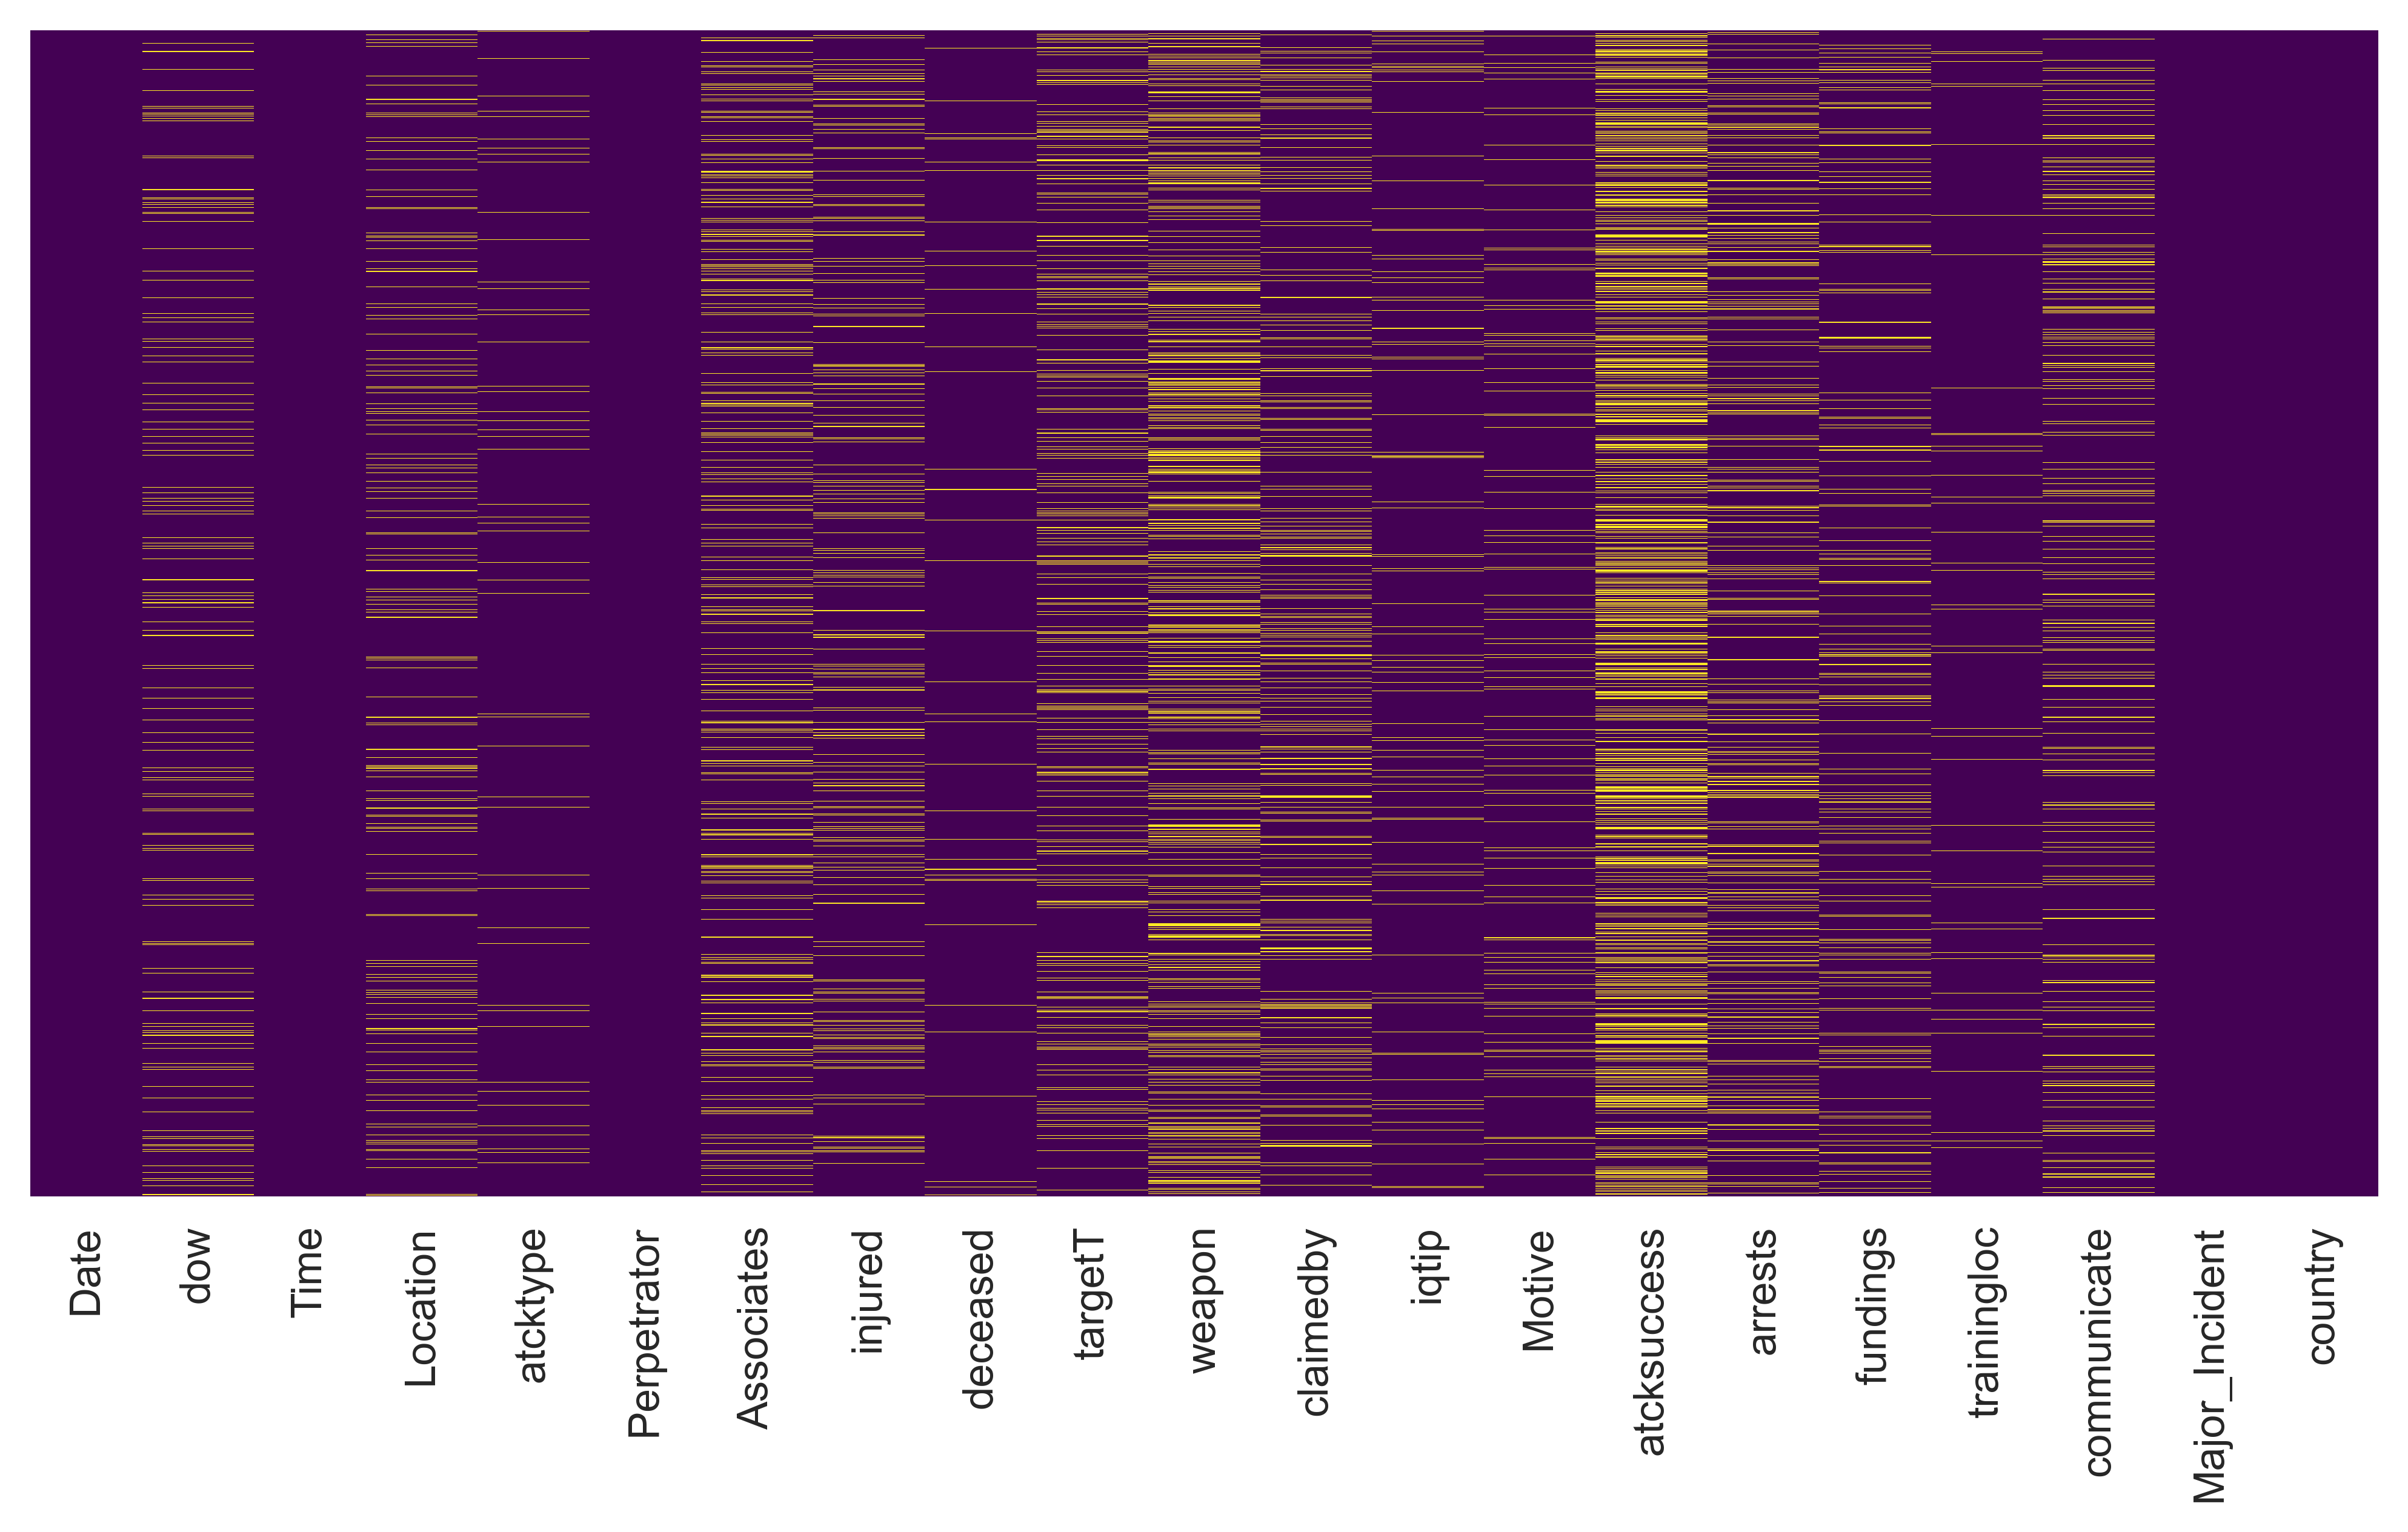

In [10]:
sns.heatmap(atck.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<h2 style="color:black; font-family: Arial;">Missing value imputation</h2>

In [11]:
#calculating percentage of missing values for each columns
for i,j in zip(atck.isna().sum().index,atck.isna().sum()):
    print(f'Missing values in {i}:{(j/len(atck))*100}')

Missing values in Date:0.0
Missing values in dow:7.99
Missing values in Time:0.0
Missing values in Location:8.056000000000001
Missing values in atcktype:2.73
Missing values in Perpetrator:0.0
Missing values in Associates:12.482
Missing values in injured:10.356
Missing values in deceased:1.662
Missing values in targetT:12.08
Missing values in weapon:22.096
Missing values in claimedby:11.976
Missing values in iqtip:4.886
Missing values in Motive:5.2620000000000005
Missing values in atcksuccess:32.034
Missing values in arrests:13.86
Missing values in fundings:8.19
Missing values in trainingloc:2.04
Missing values in communicate:11.994
Missing values in Major_Incident:0.0
Missing values in country:0.0


<h3 style="color:black; font-family: Arial;">Drop cells of column containing 1-5% of missing values</h3>

*columns > 'atcktype', 'deceased', 'trainingloc '*

In [12]:
atck.shape

(50000, 21)

In [13]:
atck.dropna(subset=['deceased'],inplace=True) #For deceased = 1.662
atck.dropna(subset=['trainingloc'],inplace=True) #For trainingloc = 2.04

In [14]:
atck.shape

(48169, 21)

In [15]:
atck.isnull().sum()

Date                  0
dow                3852
Time                  0
Location           3873
atcktype           1251
Perpetrator           0
Associates         5992
injured            5050
deceased              0
targetT            5796
weapon            10497
claimedby          5749
iqtip              2345
Motive             2541
atcksuccess       15436
arrests            6668
fundings           3945
trainingloc           0
communicate        5766
Major_Incident        0
country               0
dtype: int64

<h3 style="color:black; font-family: Arial;">filling missing values between 5% - 50%, each individual columns</h3>

In [16]:
atck.select_dtypes(include=['object', 'category']).columns.tolist() #categorical columns

['Date',
 'dow',
 'Time',
 'Location',
 'atcktype',
 'Perpetrator',
 'targetT',
 'weapon',
 'claimedby',
 'iqtip',
 'Motive',
 'atcksuccess',
 'fundings',
 'trainingloc',
 'communicate',
 'country']

In [17]:
unique_values = atck['Date'].unique()
pd.DataFrame(unique_values, columns=['uni_Date'])

uni_Date
0      2013-08-26
1      2021-05-25
2      1998-12-19
3      2001-09-02
4      2003-08-13
...           ...
16961  1993-07-07
16962  2012-04-13
16963  1982-08-09
16964  1981-10-06
16965  1993-10-24

[16966 rows x 1 columns]

<span style="color:blue; font-family: Arial;">Observation: We haven't got any clear insight, we should try extracting year from date column </span>

_<h2 style="color:black; font-family: Arial;">Extract year from date column  </h2>_

In [18]:
import datetime


In [19]:
def extract_year(date_str):
    return pd.to_datetime(date_str).year

In [20]:
atck["Year"] = atck["Date"].apply(extract_year)

In [21]:
atck.drop("Date", axis=1, inplace=True)

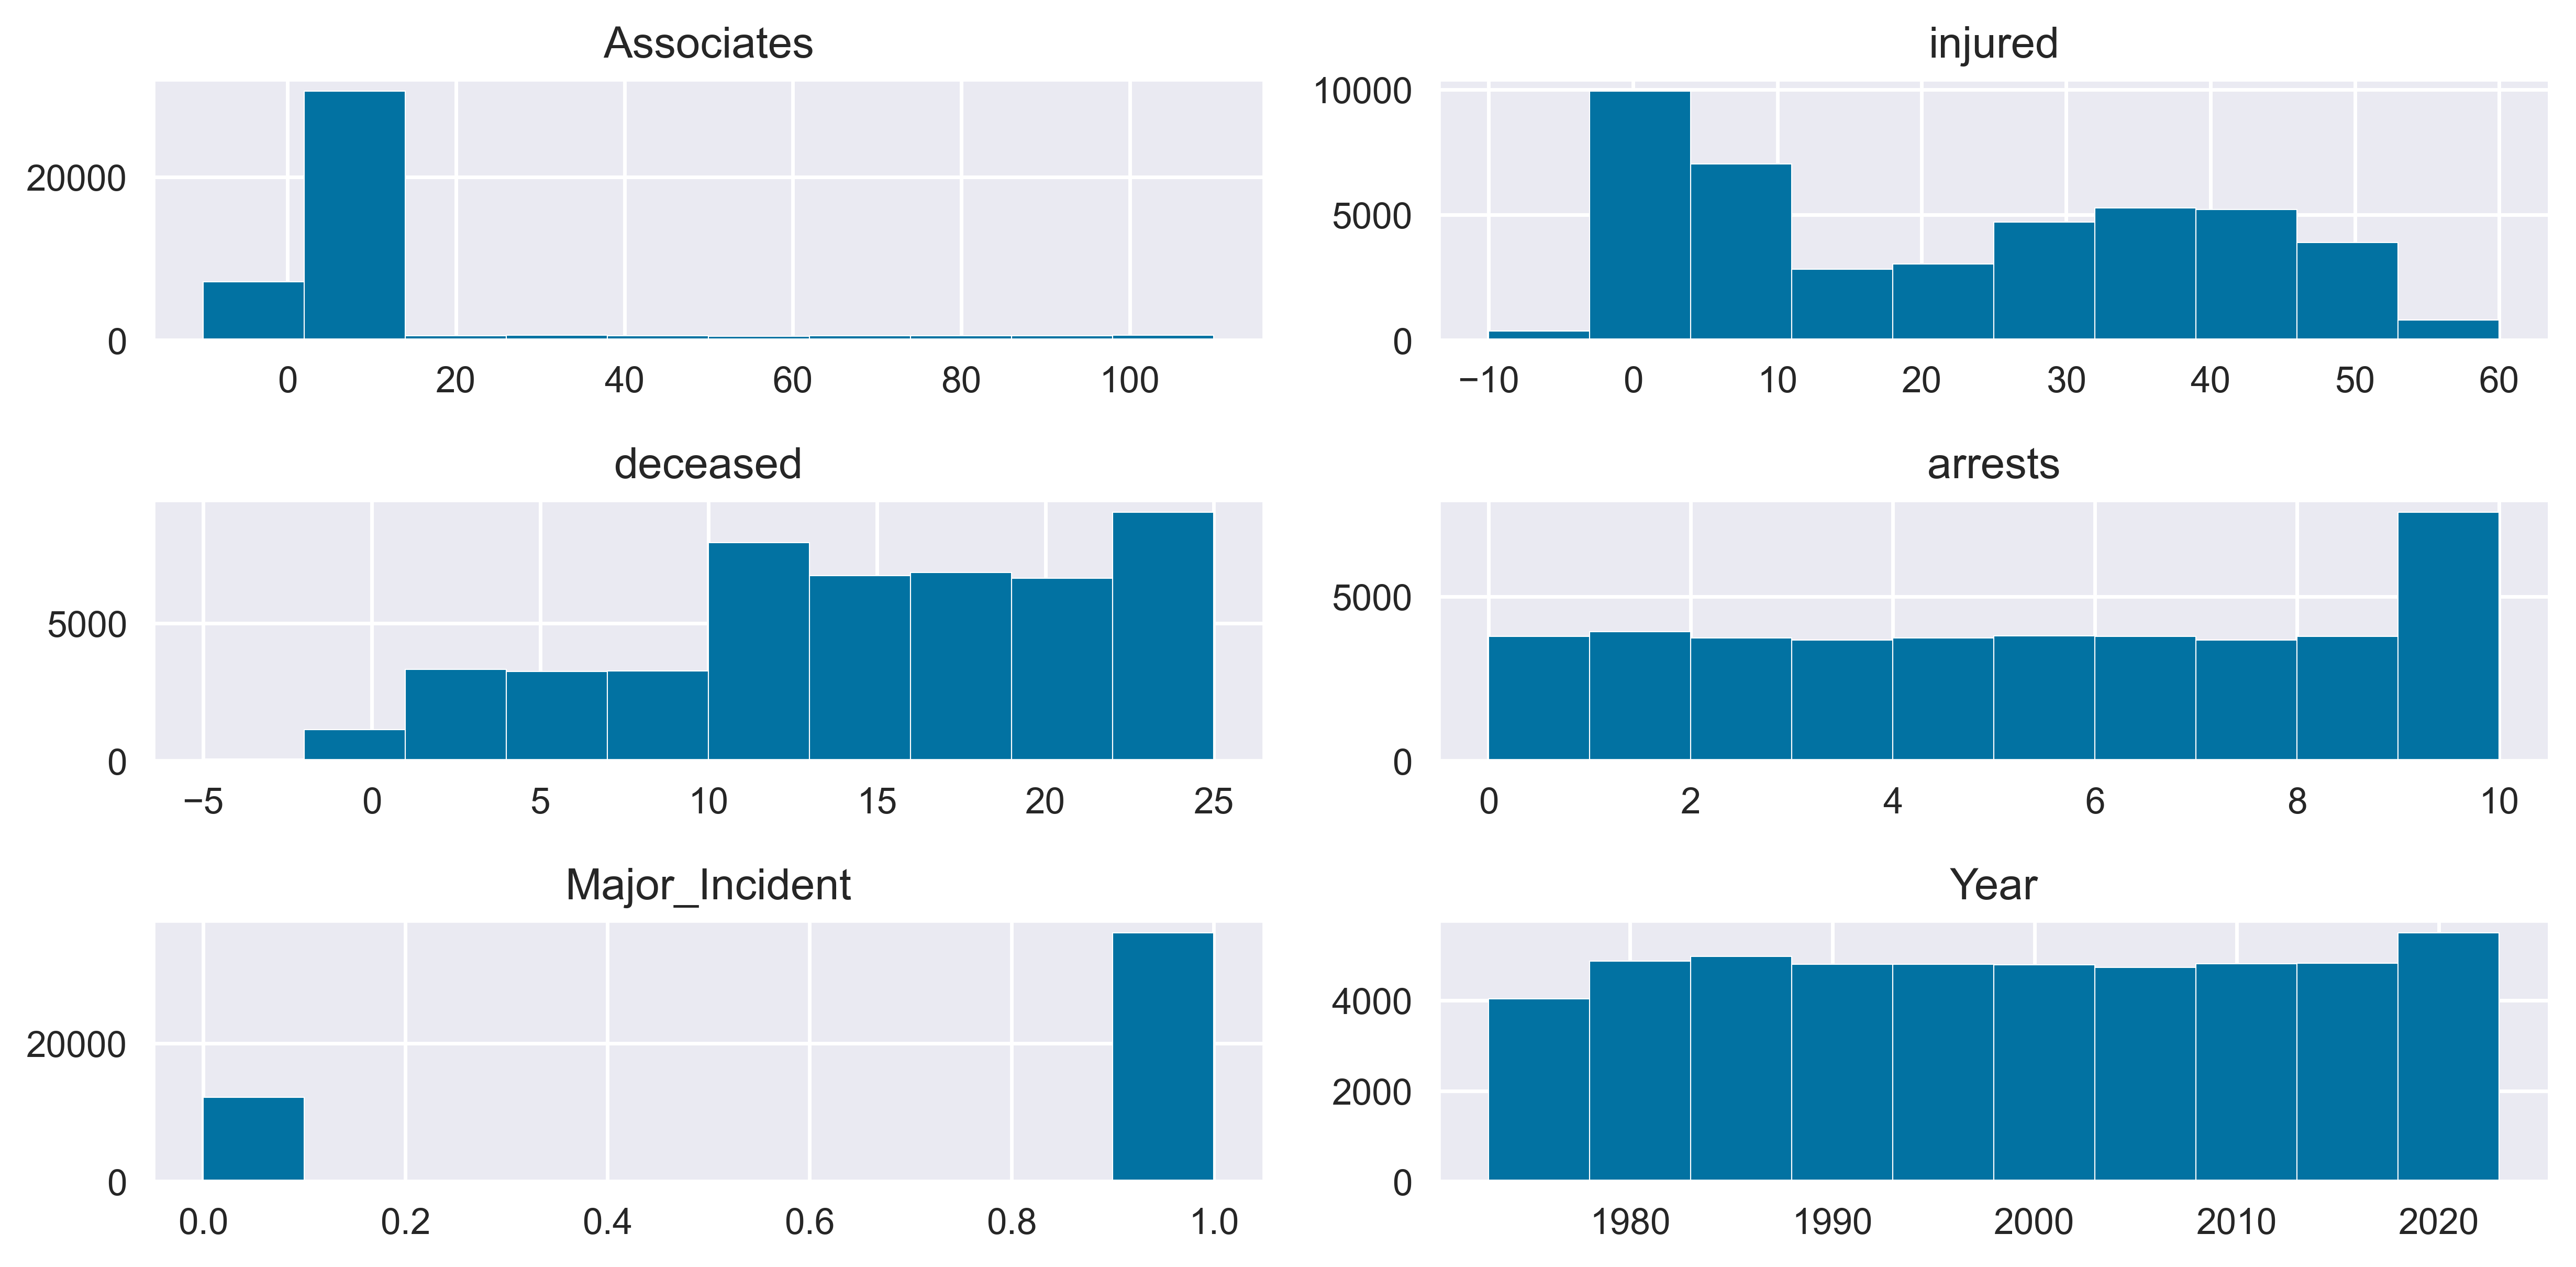

In [22]:
atck.hist()
plt.tight_layout()

<span style="color:blue; font-family: Arial;">Observation: </span>

<span style="color:blue; font-family: Arial;">1) Our data is data is highly skewed & imbalanced  </span>

<span style="color:blue; font-family: Arial;">             2) Date column has been converted into Year, now contains 'int' type</span>


In [23]:
#For numeric columns
atck['Associates'].fillna(atck['Associates'].median(),inplace=True)
atck['injured'].fillna(atck['injured'].median(),inplace=True)
atck['arrests'].fillna(atck['arrests'].median(),inplace=True)

In [24]:
# For categorical columns
atck['Location'].fillna(atck['Location'].mode()[0],inplace=True)
atck['atcktype'].fillna(atck['atcktype'].mode()[0],inplace=True)
atck['Perpetrator'].fillna(atck['Perpetrator'].mode()[0],inplace=True)
atck['targetT'].fillna(atck['targetT'].mode()[0],inplace=True)
atck['weapon'].fillna(atck['weapon'].mode()[0],inplace=True)
atck['claimedby'].fillna(atck['claimedby'].mode()[0],inplace=True)
atck['iqtip'].fillna(atck['iqtip'].mode()[0],inplace=True)
atck['Motive'].fillna(atck['Motive'].mode()[0],inplace=True)
atck['atcksuccess'].fillna(atck['atcksuccess'].mode()[0],inplace=True)
atck['fundings'].fillna(atck['fundings'].mode()[0],inplace=True)
atck['communicate'].fillna(atck['communicate'].mode()[0],inplace=True)
atck['dow'].fillna(atck['dow'].mode()[0],inplace=True)

In [25]:
atck.isnull().sum()

dow               0
Time              0
Location          0
atcktype          0
Perpetrator       0
Associates        0
injured           0
deceased          0
targetT           0
weapon            0
claimedby         0
iqtip             0
Motive            0
atcksuccess       0
arrests           0
fundings          0
trainingloc       0
communicate       0
Major_Incident    0
country           0
Year              0
dtype: int64

In [26]:
atck.shape

(48169, 21)

<h2 style="color:black; font-family: Arial;">Correlation</h2>

In [27]:
 atck.corr( numeric_only= True)

Associates   injured  deceased   arrests  Major_Incident  \
Associates        1.000000  0.003358 -0.001688  0.001944       -0.000131   
injured           0.003358  1.000000  0.514643 -0.006056        0.656535   
deceased         -0.001688  0.514643  1.000000 -0.000351        0.785414   
arrests           0.001944 -0.006056 -0.000351  1.000000        0.001091   
Major_Incident   -0.000131  0.656535  0.785414  0.001091        1.000000   
Year             -0.010833  0.008880  0.002172  0.002197        0.004691   

                    Year  
Associates     -0.010833  
injured         0.008880  
deceased        0.002172  
arrests         0.002197  
Major_Incident  0.004691  
Year            1.000000

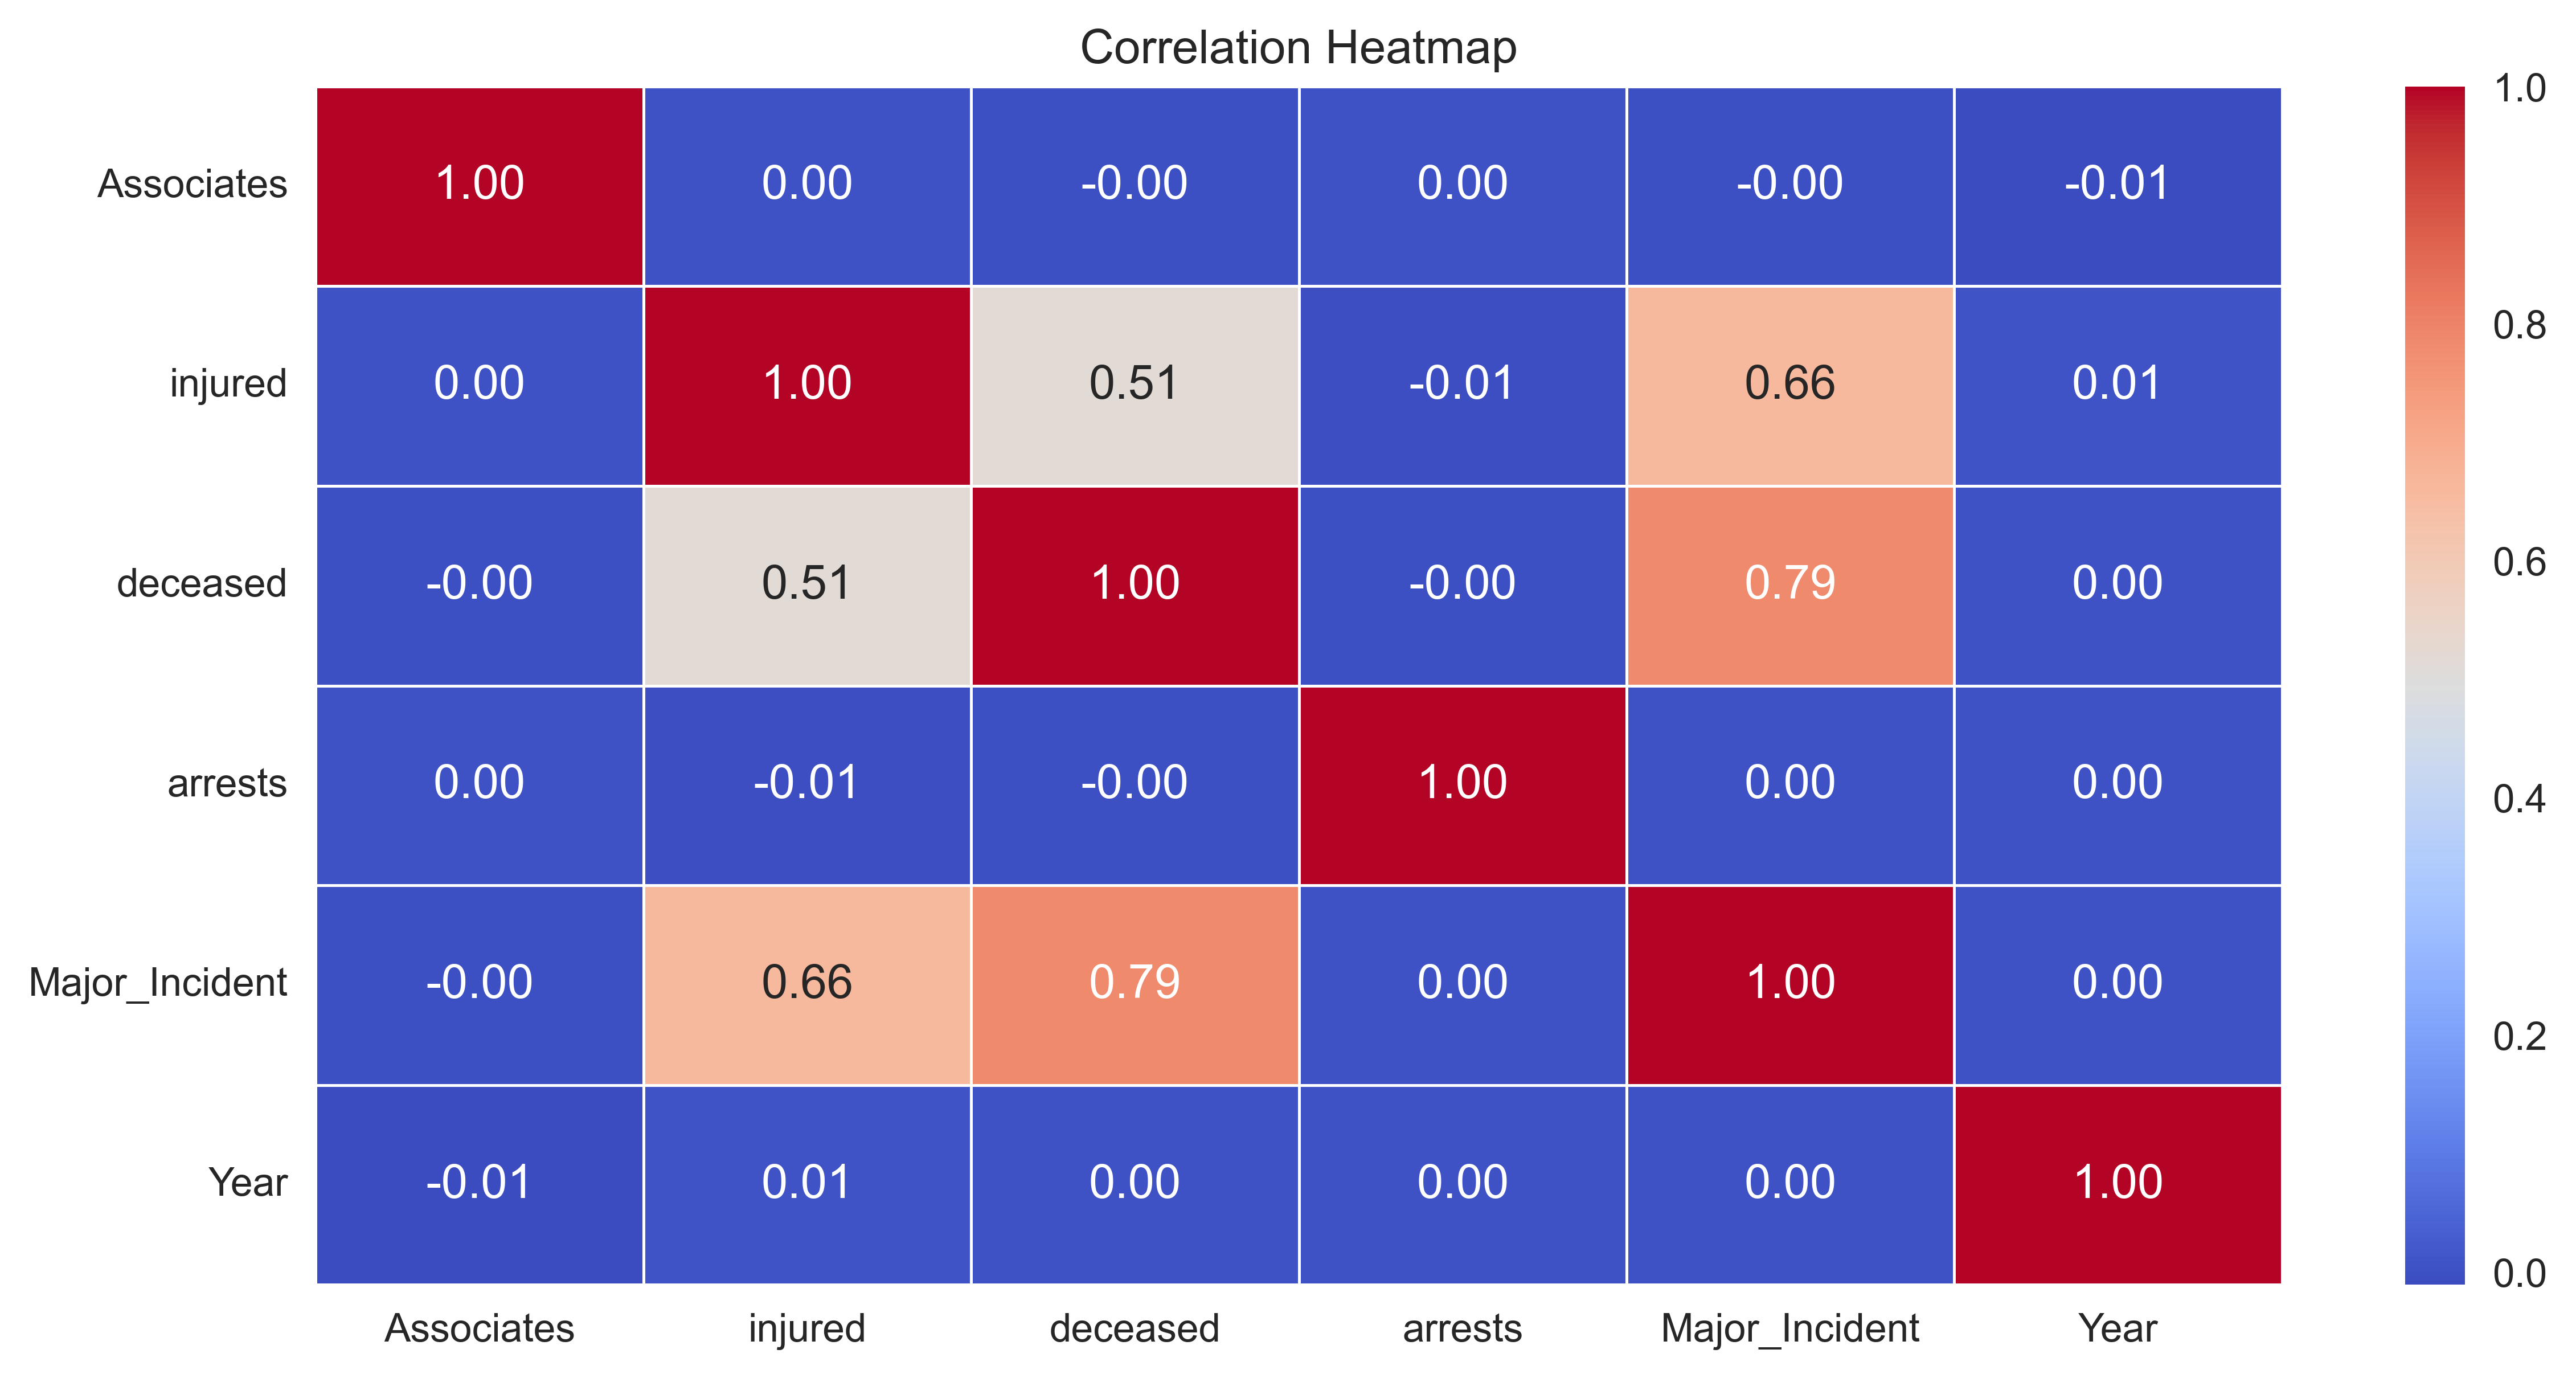

In [28]:
sns.heatmap(atck.corr( numeric_only= True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


plt.title('Correlation Heatmap')
plt.tight_layout()


plt.show()

<h2 style="color:blue; font-family: Arial;">Observation:</h2>

<h3 style="color:blue; font-family: Arial;">'injured' & 'deceased' have moderately positive relation with target columnn</h3>

<h2 style="color:black; font-family: Arial;">Outliers</h2>

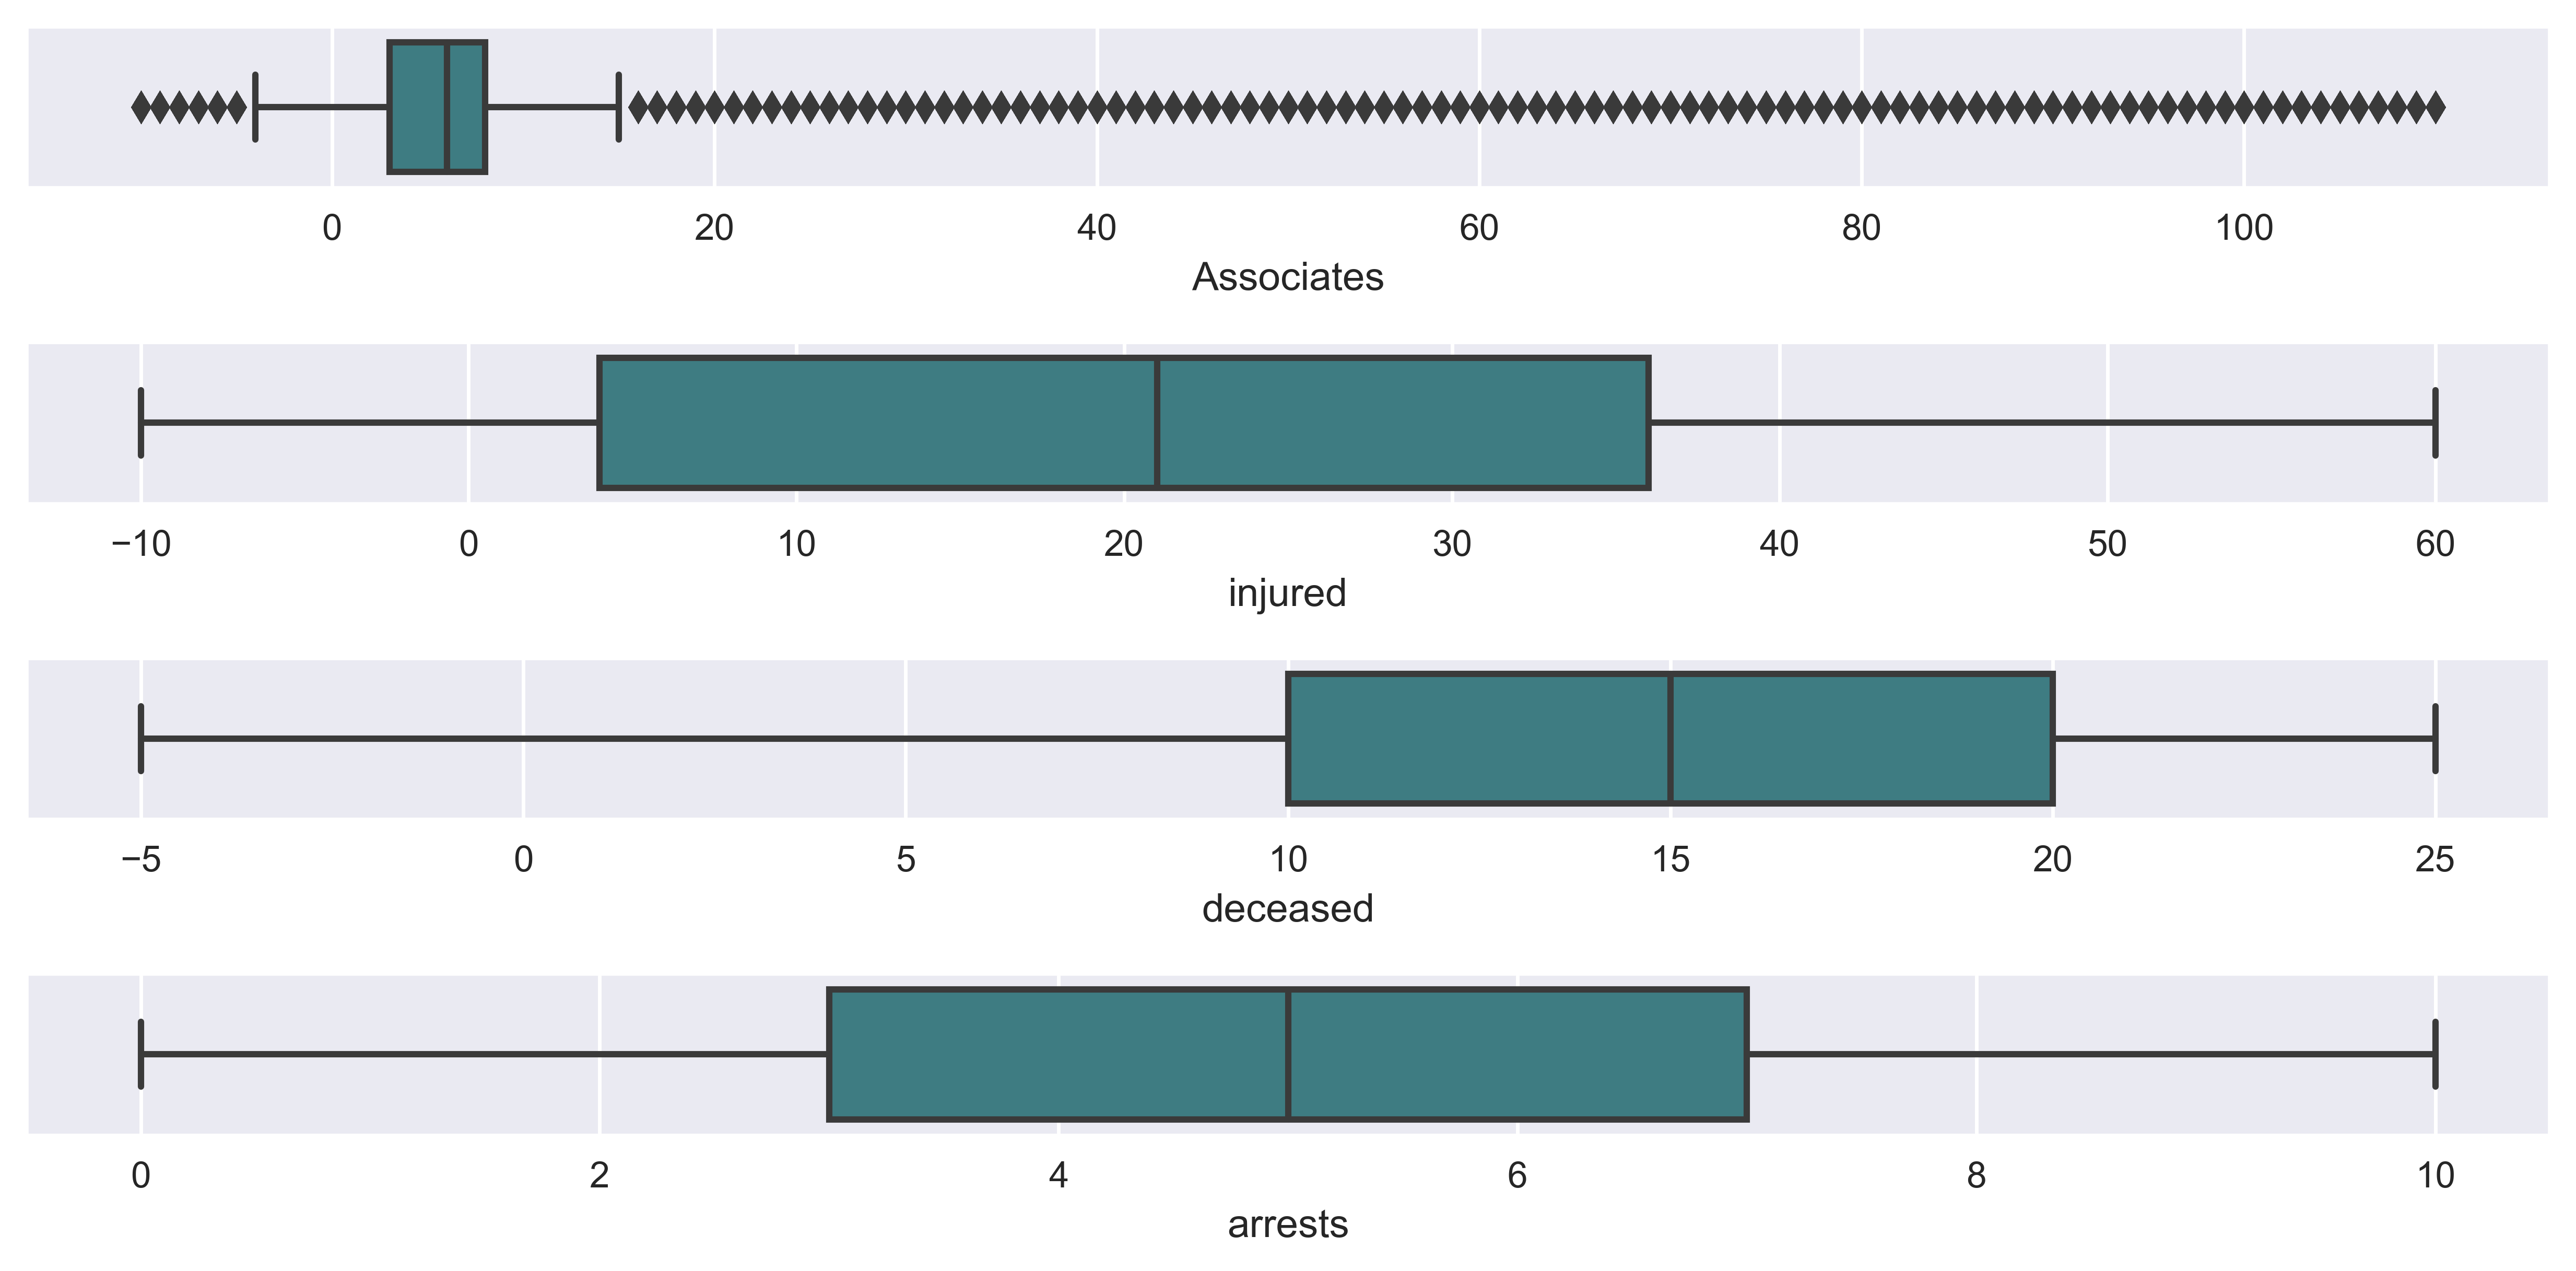

In [29]:
fig, axes=plt.subplots(4,1,sharex=False,sharey=False)
sns.boxplot(x='Associates',data=atck,palette='crest',ax=axes[0])
sns.boxplot(x='injured',data=atck,palette='crest',ax=axes[1])
sns.boxplot(x='deceased',data=atck,palette='crest',ax=axes[2])
sns.boxplot(x='arrests',data=atck,palette='crest',ax=axes[3])
plt.tight_layout(pad=1.0)

<span style="color:blue; font-family: Arial;">Observation: Outliers present in "Associates" column</span>

In [30]:
#outlier detection function
def outlier_det(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return lower, upper

In [31]:
outlier_det(atck,'Associates')

(-4.5, 15.5)

<h2 style="color:black; font-family: Arial;">Remove Outliers: capping method</h2>

In [32]:
atck[atck['Associates']>15.5]

dow   Time        Location    atcktype Perpetrator  Associates  \
13      saturday   0:43  rio de janeiro  kidnapping     group b        31.0   
14      saturday   9:53        new york    shooting     group c        88.0   
16      saturday  15:47          mumbai       arson     group b        29.0   
19      thursday   3:44          berlin     bombing     group c        57.0   
32     wednesday   8:44         jakarta     bombing     group b        33.0   
...          ...    ...             ...         ...         ...         ...   
49950     sunday  11:26        istanbul    shooting     group c        32.0   
49956     sunday   8:44           cairo     bombing     group c        67.0   
49958   thursday   15:2     mexico city     bombing     group c        37.0   
49959     sunday  23:38           seoul    shooting     group c        25.0   
49983     monday  10:56           paris    stabbing     group c        65.0   

       injured  deceased               targetT          weapon  ...    iqtip  \
13        32.0      22.0                police      incendiary  ...  unknown   
14       -10.0      25.0                police        chemical  ...      yes   
16         3.0       7.0             civilians        chemical  ...       no   
19        24.0      23.0             civilians  bladed weapons  ...      yes   
32        44.0      10.0        infrastructure      explosives  ...       no   
...        ...       ...                   ...             ...  ...      ...   
49950      2.0      23.0  government officials        chemical  ...  unknown   
49956     36.0      19.0              tourists      incendiary  ...       no   
49958     46.0      16.0             civilians      incendiary  ...       no   
49959     21.0      19.0             civilians        chemical  ...       no   
49983     29.0      20.0             civilians      incendiary  ...      yes   

            Motive atcksuccess arrests       fundings trainingloc communicate  \
13         unknown         yes     9.0          local      abroad    internet   
14     retaliation          no     7.0          local    domestic  cellphones   
16         unknown     unknown     5.0        unknown    domestic    couriers   
19     retaliation          no     4.0  international    domestic    internet   
32     retaliation         yes     2.0  international    domestic    couriers   
...            ...         ...     ...            ...         ...         ...   
49950    political         yes     8.0          local    domestic  cellphones   
49956    religious         yes    10.0        unknown    domestic    internet   
49958      unknown         yes     7.0          local    domestic    couriers   
49959      unknown     unknown     2.0          local    domestic    couriers   
49983    political         yes     1.0        unknown    domestic    internet   

      Major_Incident      country  Year  
13                 1       brazil  2004  
14                 1          usa  2002  
16                 0    australia  2021  
19                 1      germany  1986  
32                 1    indonesia  2015  
...              ...          ...   ...  
49950              1       turkey  1975  
49956              1        egypt  2018  
49958              1       mexico  2010  
49959              1  south korea  2001  
49983              1       france  2020  

[4470 rows x 21 columns]

In [33]:
atck[atck['Associates']<-4.5]

dow   Time        Location    atcktype Perpetrator  Associates  \
91      thursday   4:52    buenos aires    shooting     group b        -9.0   
108     saturday   16:7          mumbai     bombing     group b        -7.0   
308       monday  22:39           tokyo  kidnapping     group c        -6.0   
671     saturday    9:0           seoul     bombing     group c        -7.0   
802     thursday   16:9           dubai     bombing     group c        -9.0   
...          ...    ...             ...         ...         ...         ...   
49668   saturday   4:29  rio de janeiro    shooting     group c       -10.0   
49756     monday  12:53           dubai  kidnapping     group a        -7.0   
49893     friday   10:7          madrid     bombing     group c        -8.0   
49968  wednesday    2:4         beijing     bombing     group c        -7.0   
49979   saturday  18:29     mexico city    shooting     group c        -9.0   

       injured  deceased               targetT          weapon  ...    iqtip  \
91         3.0       0.0        infrastructure        firearms  ...      yes   
108        4.0       1.0  government officials        chemical  ...      yes   
308        5.0      23.0             civilians      explosives  ...      yes   
671       36.0      20.0              tourists  bladed weapons  ...      yes   
802       21.0      20.0                police      explosives  ...      yes   
...        ...       ...                   ...             ...  ...      ...   
49668     21.0      18.0        infrastructure        firearms  ...  unknown   
49756      2.0       4.0        infrastructure        chemical  ...       no   
49893     23.0      17.0  government officials        chemical  ...      yes   
49968      2.0      18.0  government officials        chemical  ...       no   
49979     37.0      13.0        infrastructure  bladed weapons  ...       no   

            Motive atcksuccess arrests       fundings trainingloc communicate  \
91     retaliation         yes     5.0          local      abroad    internet   
108      religious     unknown     0.0  international    domestic    couriers   
308      political         yes     9.0  international    domestic    couriers   
671      political         yes     1.0        unknown      abroad    couriers   
802      political         yes     6.0        unknown    domestic    internet   
...            ...         ...     ...            ...         ...         ...   
49668       ethnic          no     5.0        unknown    domestic    couriers   
49756       ethnic          no     7.0          local    domestic  cellphones   
49893  retaliation     unknown     4.0          local      abroad  cellphones   
49968  retaliation         yes     0.0        unknown    domestic  cellphones   
49979       ethnic         yes     0.0          local      abroad    internet   

      Major_Incident      country  Year  
91                 0    argentina  2001  
108                0        kenya  1989  
308                1        japan  2022  
671                1  south korea  2022  
802                1          uae  2020  
...              ...          ...   ...  
49668              1       brazil  2020  
49756              0          uae  1991  
49893              1        spain  1986  
49968              1        china  1981  
49979              1       mexico  2004  

[285 rows x 21 columns]

In [34]:
atck.loc[atck['Associates']>15.5,'Associates']=15.5

In [35]:
atck.loc[atck['Associates']<-4.5,'Associates']=-4.5

<Axes: >

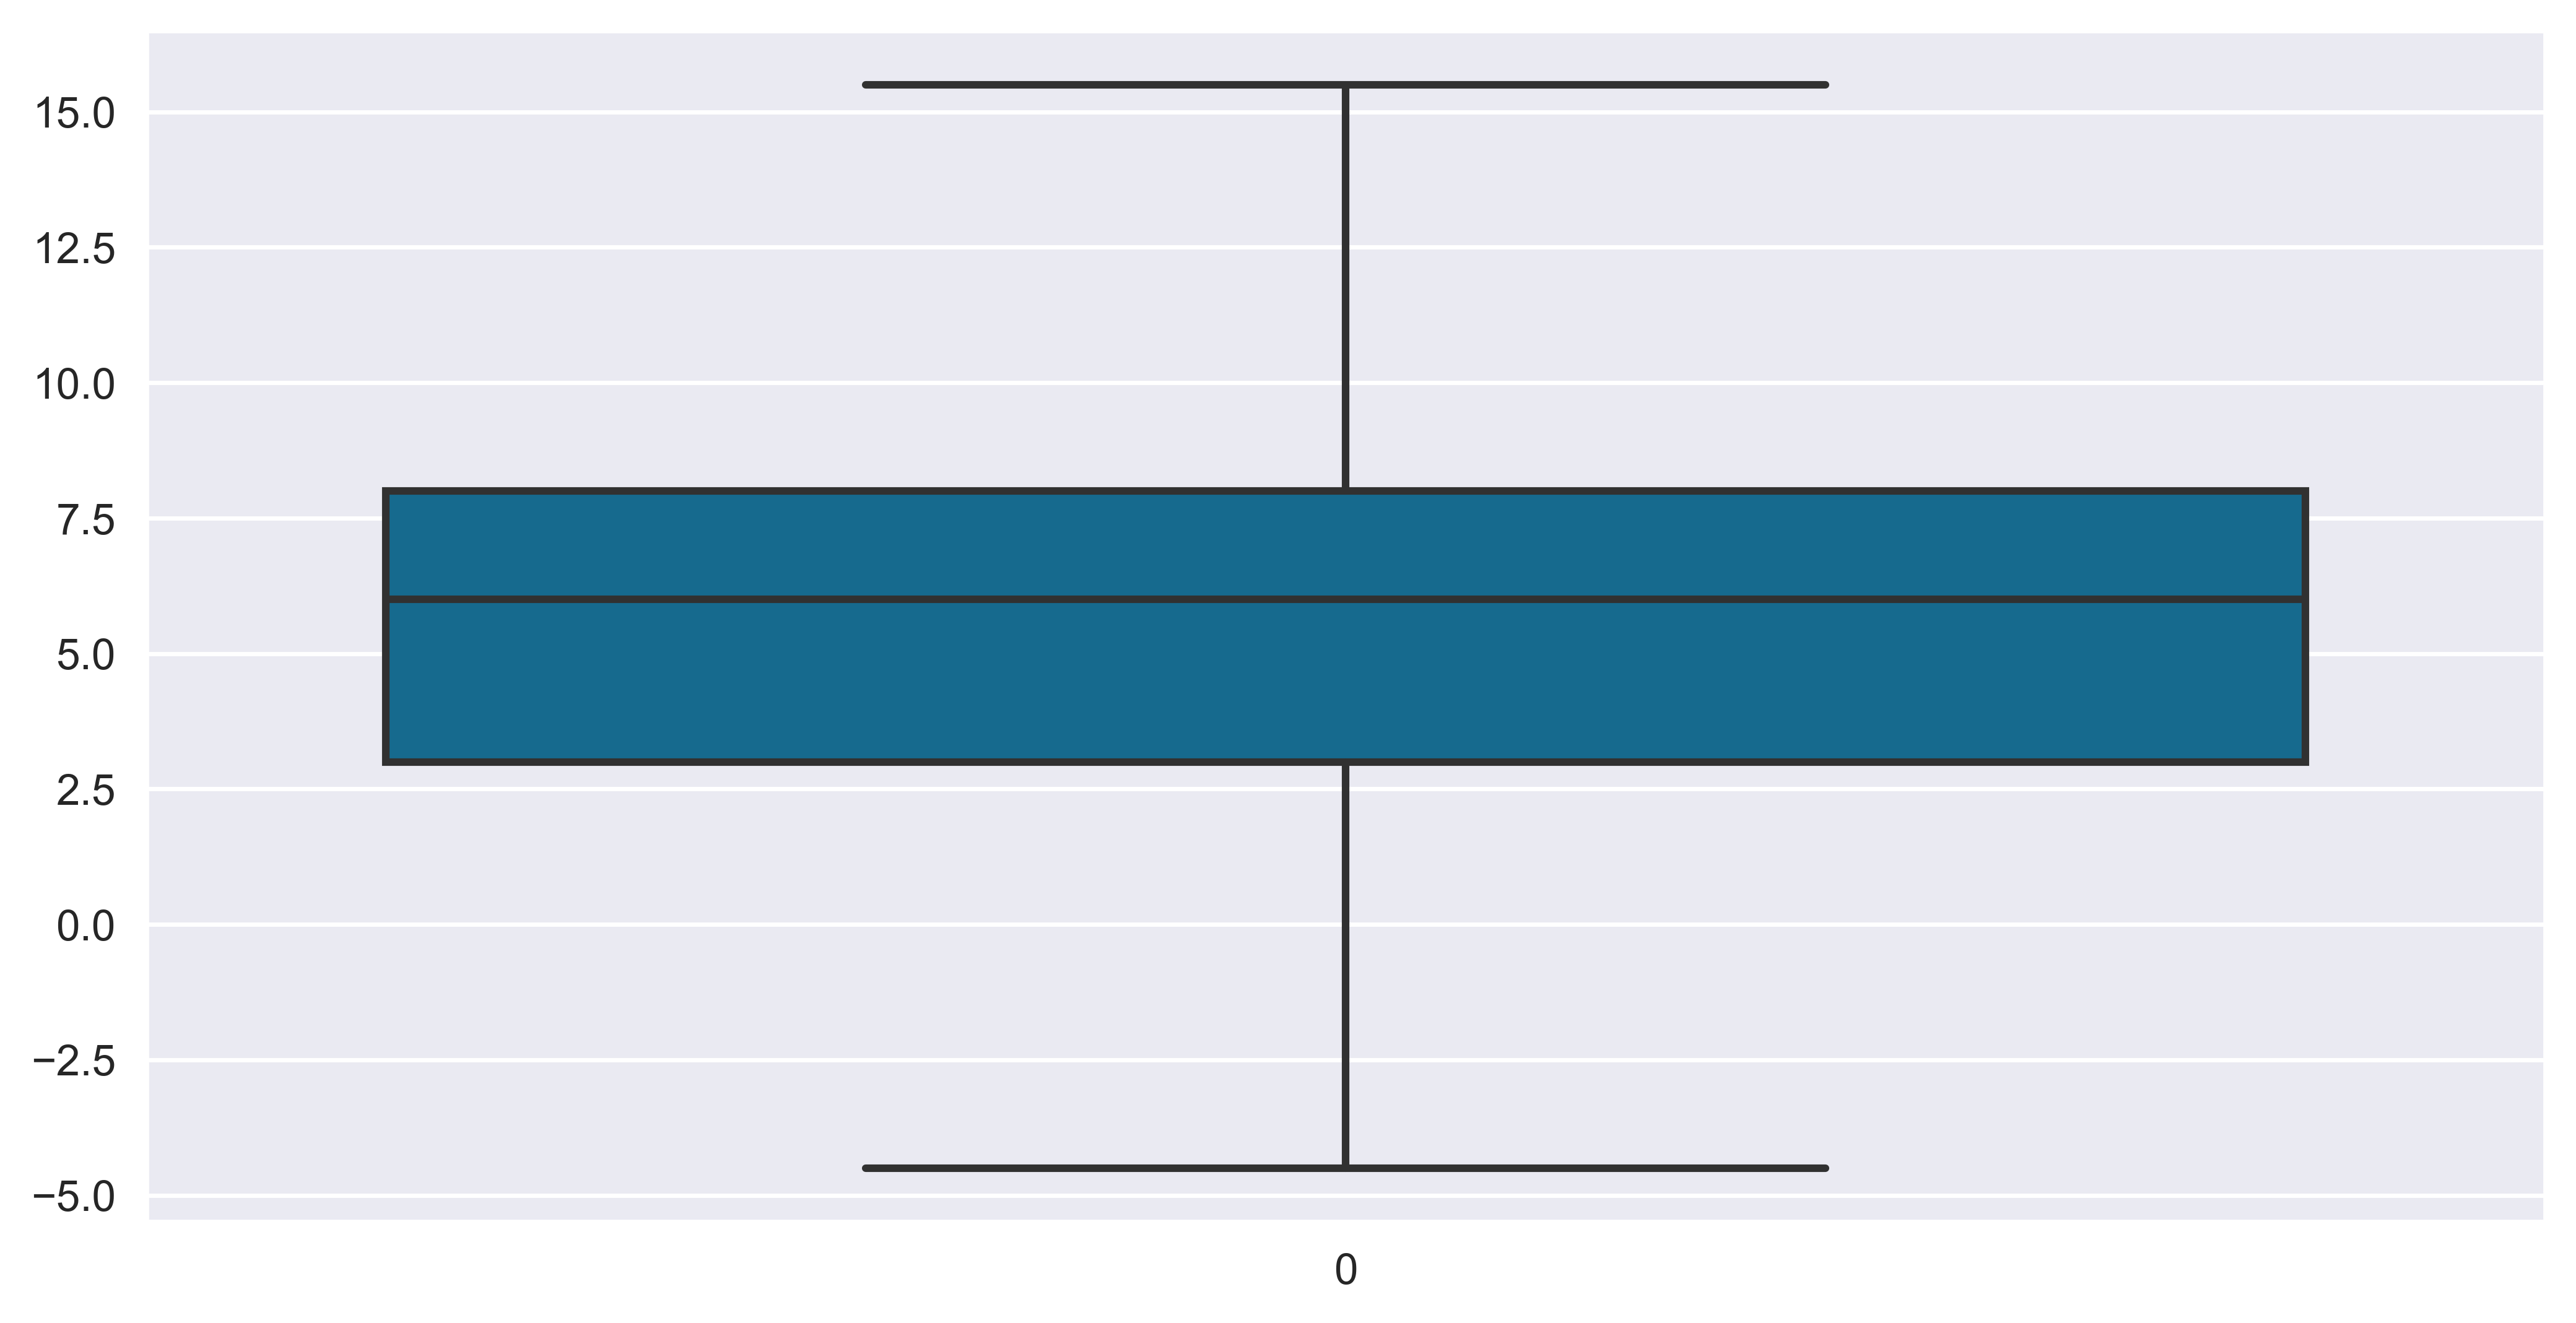

In [36]:
sns.boxplot(atck['Associates'])

# Visualization

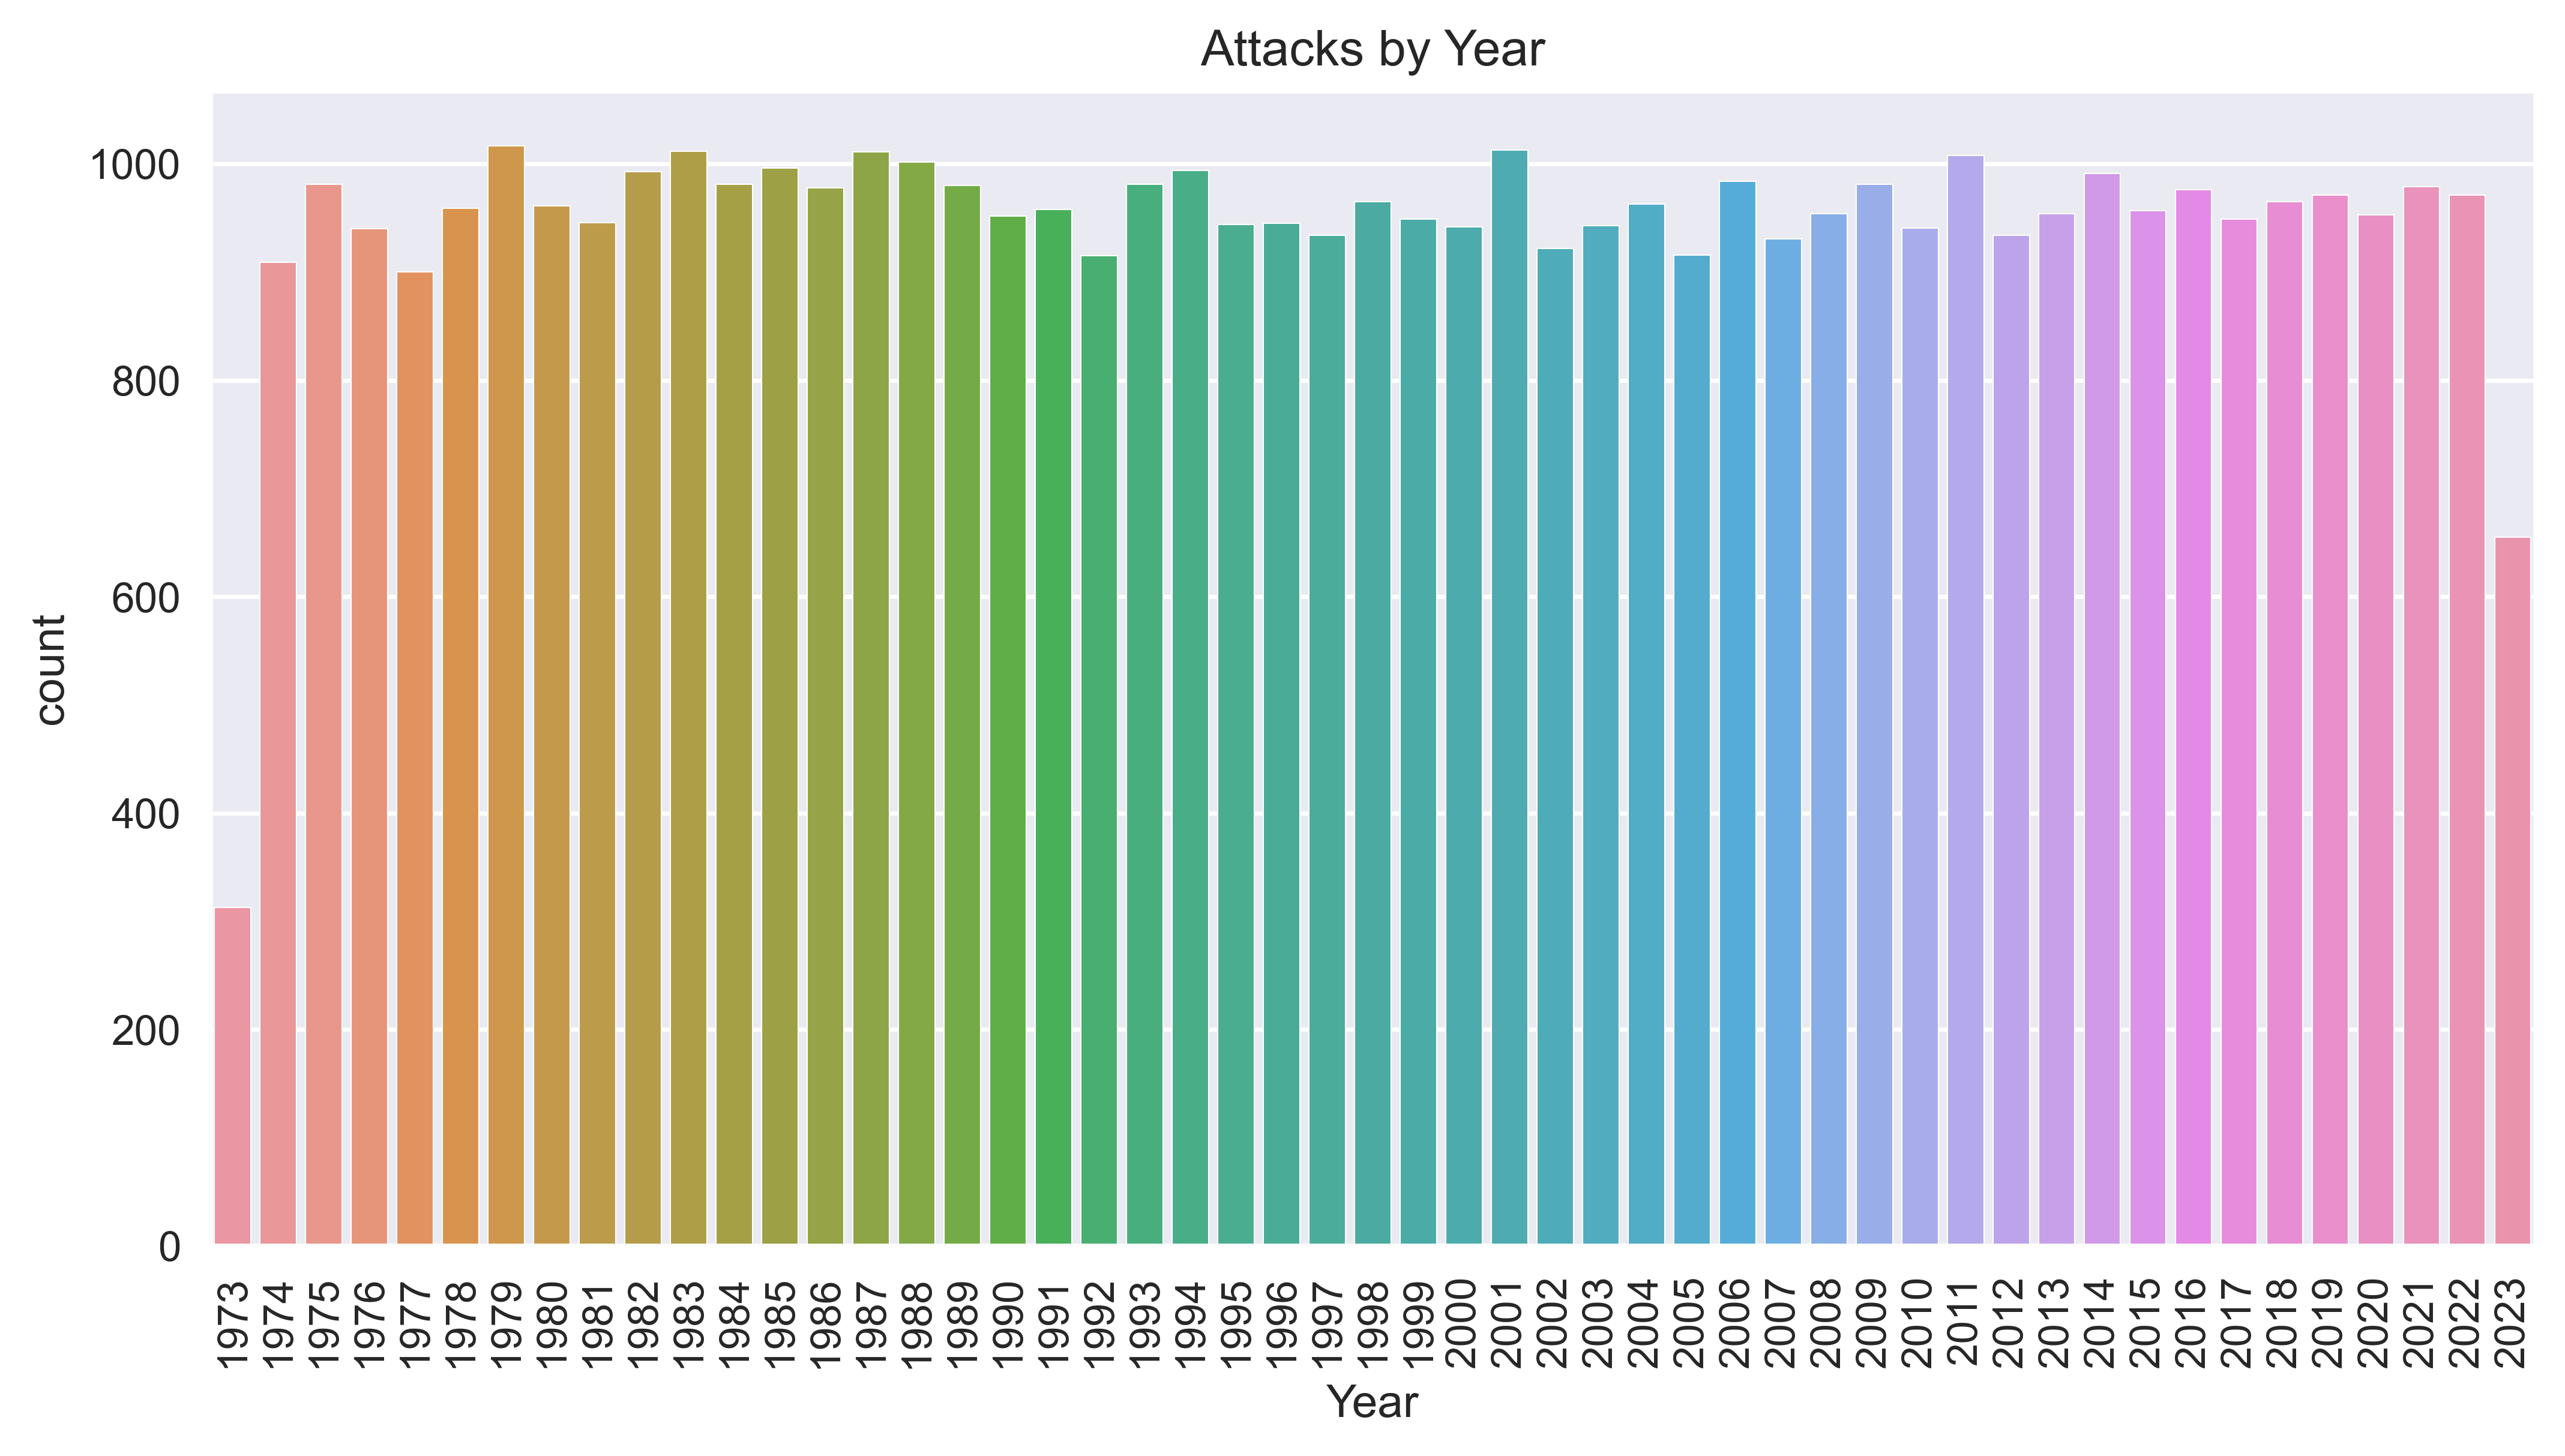

In [37]:
plt.xticks(rotation = 90)
plt.title('Attacks by Year')
sns.countplot(x=atck.Year);

<h2 style="color:blue; font-family: Arial;">Observation:</h2>

<h3 style="color:blue; font-family: Arial;">1) Highest major_incident years are "1979", "2001", "1987", "2011" </h3>

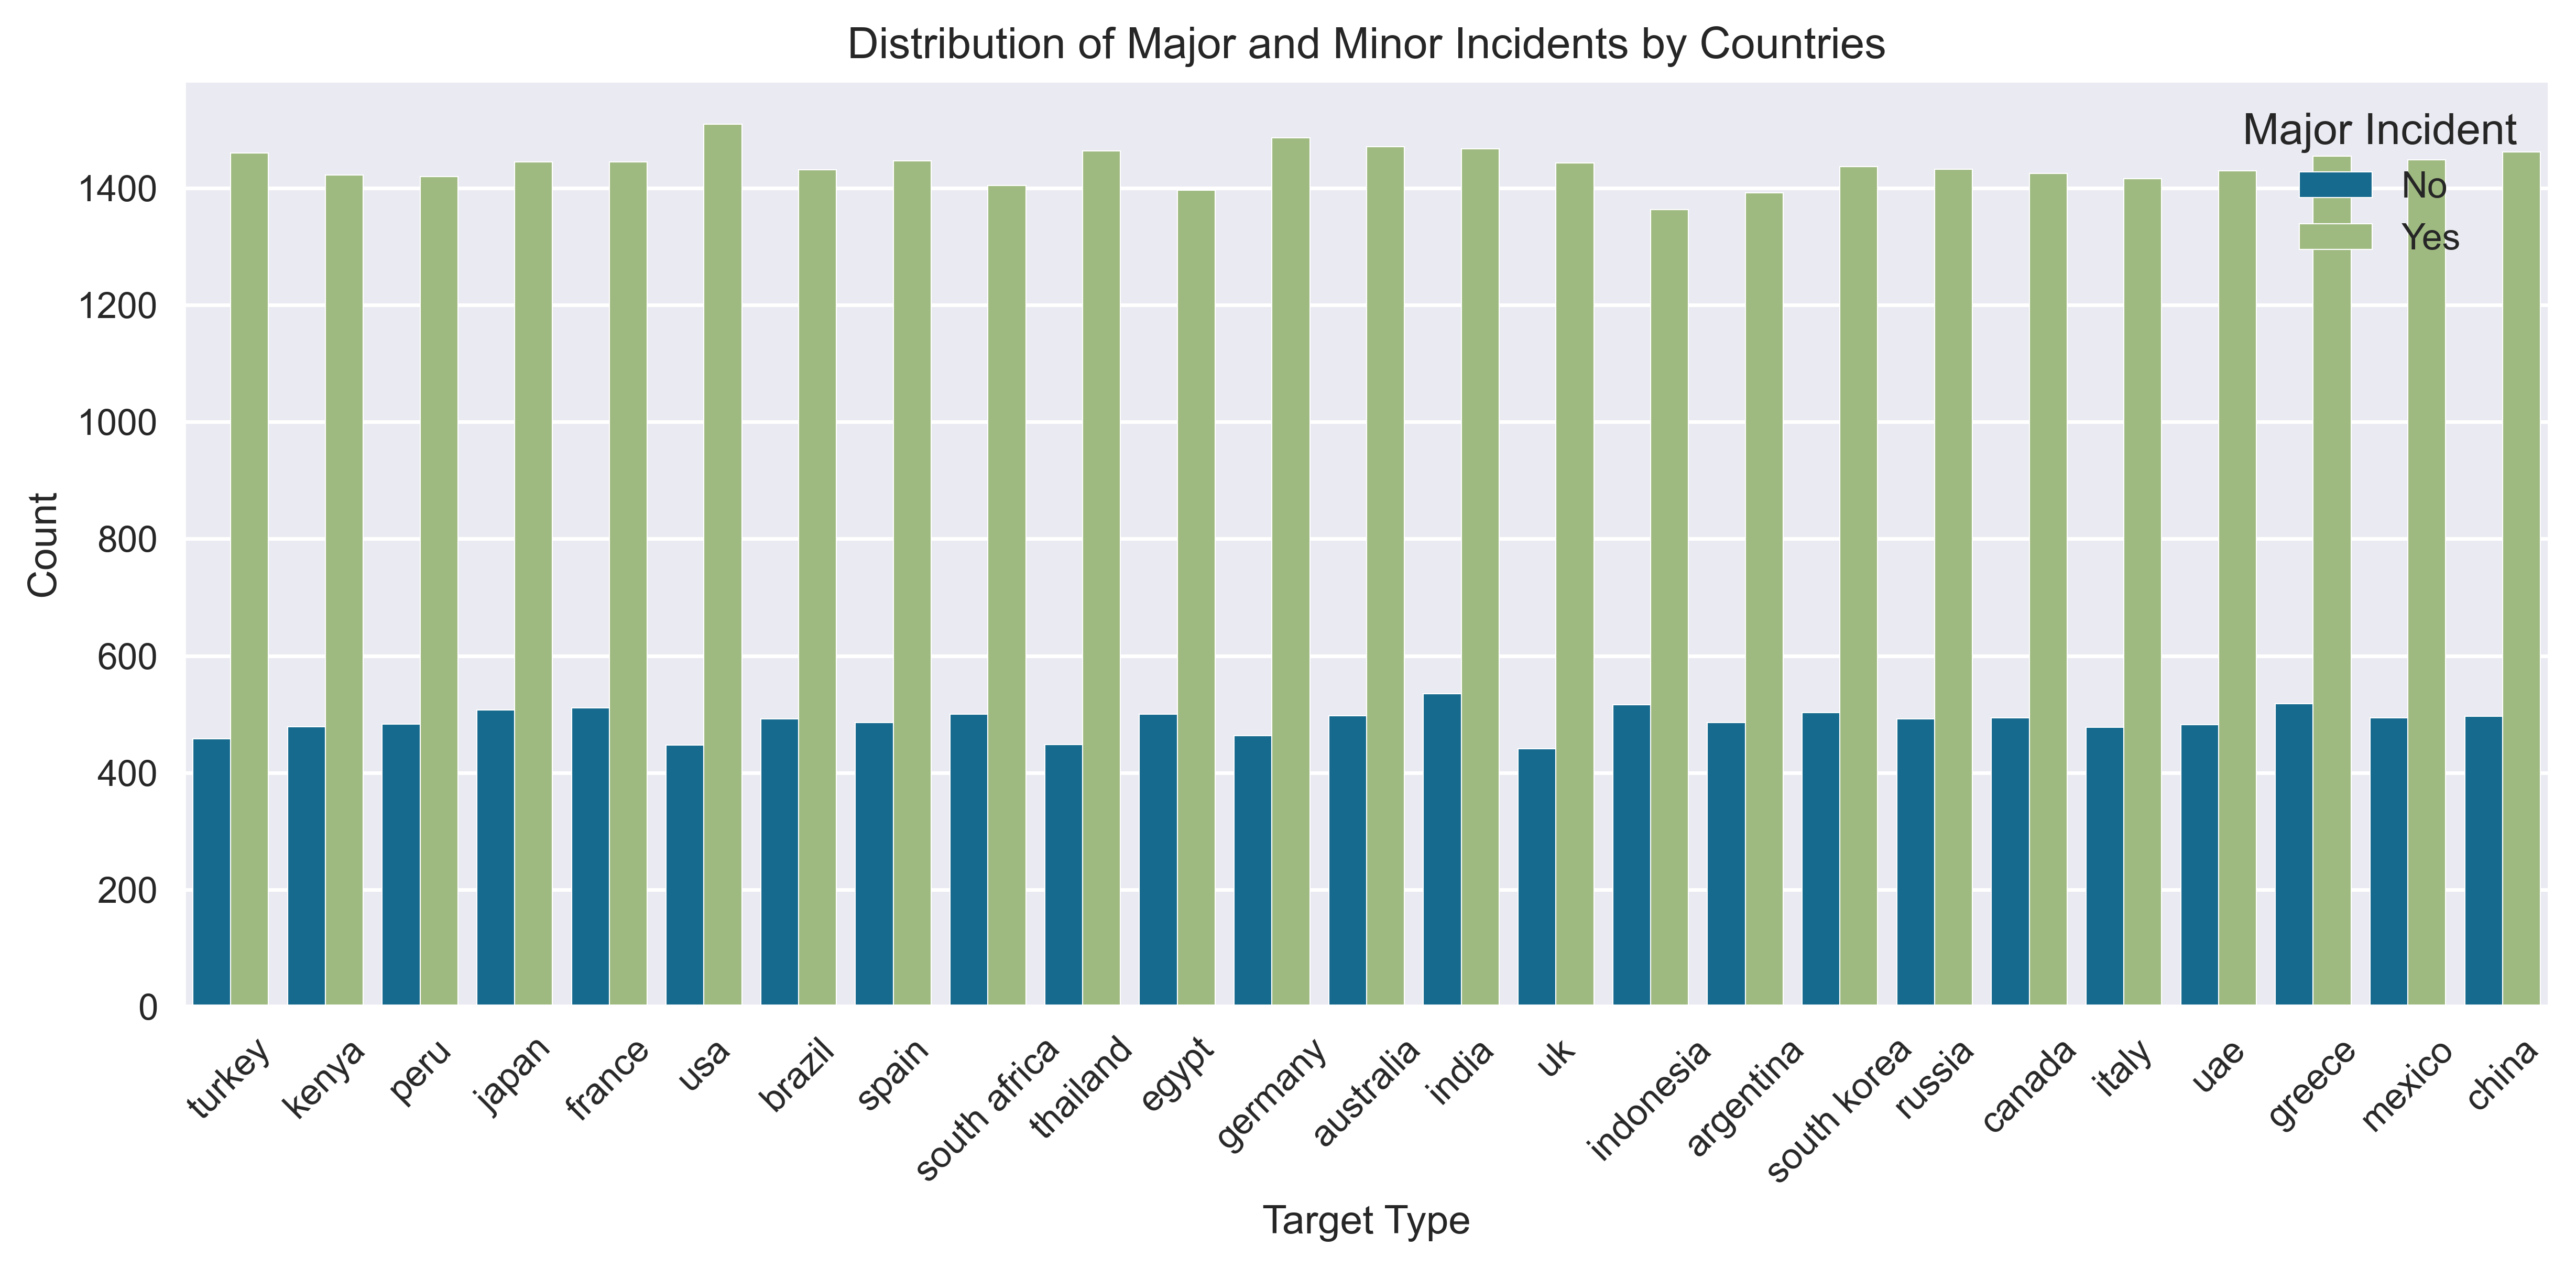

In [38]:
sns.countplot(data=atck, x='country', hue='Major_Incident')

plt.title('Distribution of Major and Minor Incidents by Countries')
plt.xlabel('Target Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.legend(title='Major Incident', loc='upper right', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

<h2 style="color:blue; font-family: Arial;">Observation:</h2>

<h3 style="color:blue; font-family: Arial;">1) Major attacked Countries: 'USA', 'Germany','Greece','Mexico','China'</h3>

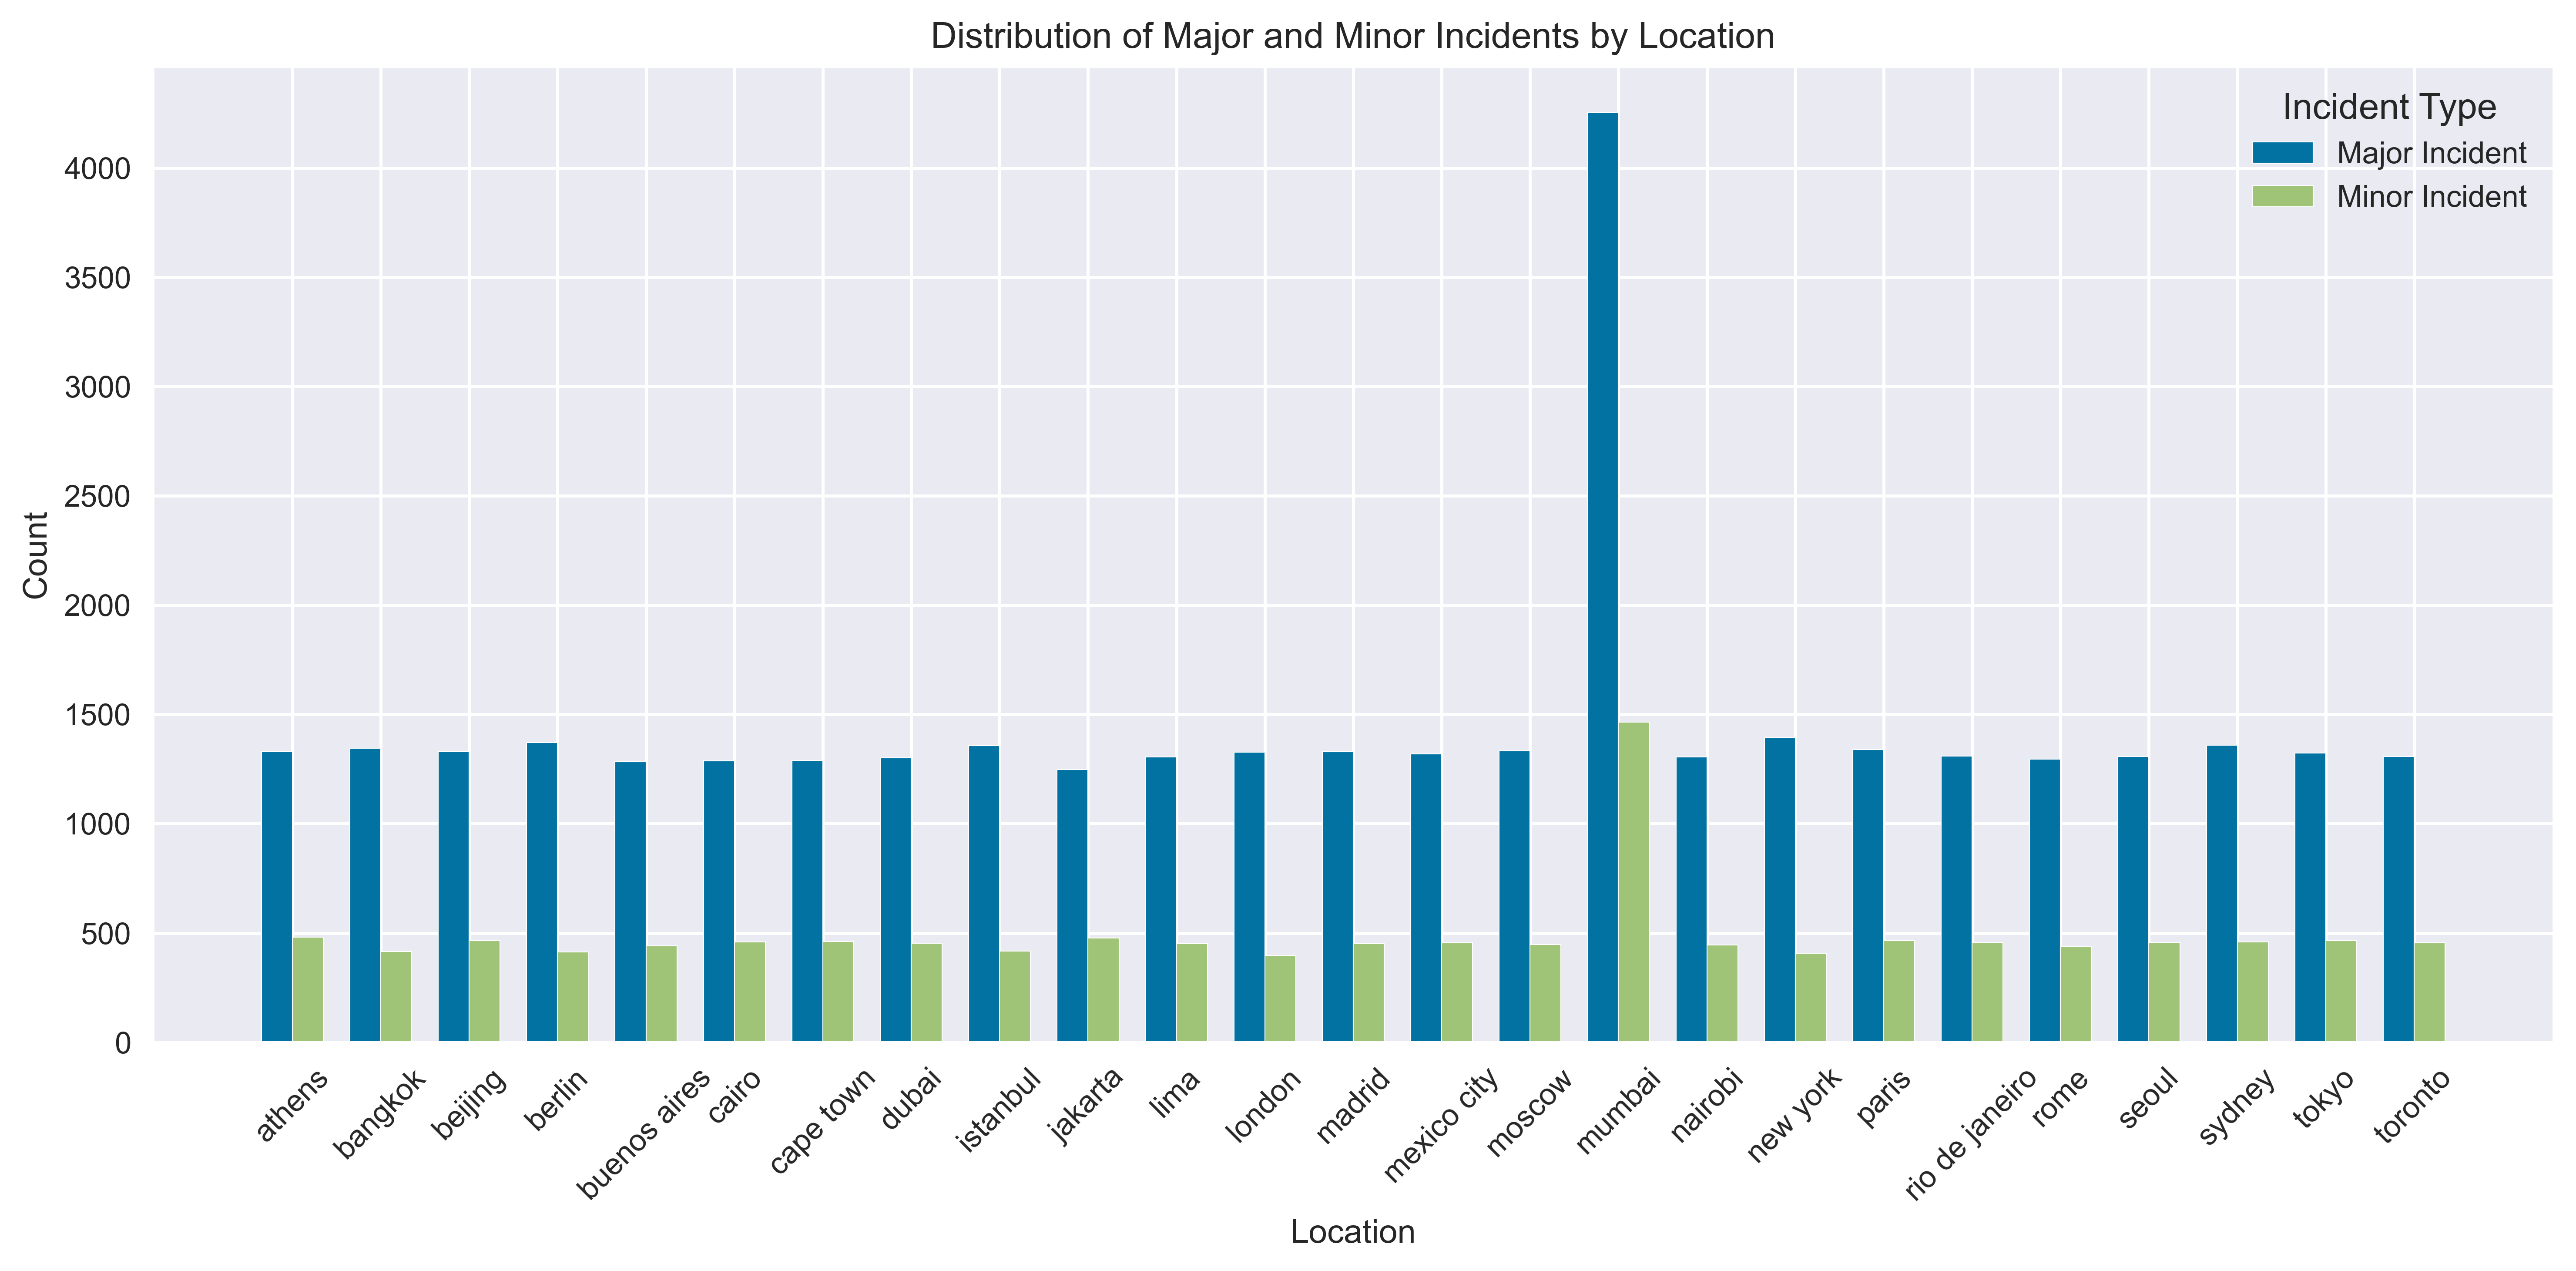

In [39]:
grouped_data = atck.groupby(['Location', 'Major_Incident']).size().unstack(fill_value=0)

locations = grouped_data.index
major_incident_counts = grouped_data[1]  

bar_width = 0.35

x = np.arange(len(locations))

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, major_incident_counts, bar_width, label='Major Incident', color='b')
plt.bar(x + bar_width/2, grouped_data[0], bar_width, label='Minor Incident', color='g')

plt.title('Distribution of Major and Minor Incidents by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(x, locations, rotation=45)
plt.legend(title='Incident Type')

plt.tight_layout()
plt.show()


<h2 style="color:blue; font-family: Arial;">Observation:</h2>

<h3 style="color:blue; font-family: Arial;">1) Majority of major attack took place at Location: 'mumbai'</h3>

<h3 style="color:blue; font-family: Arial;">1) Majority of minor attack took place at Location: 'mumbai'</h3>

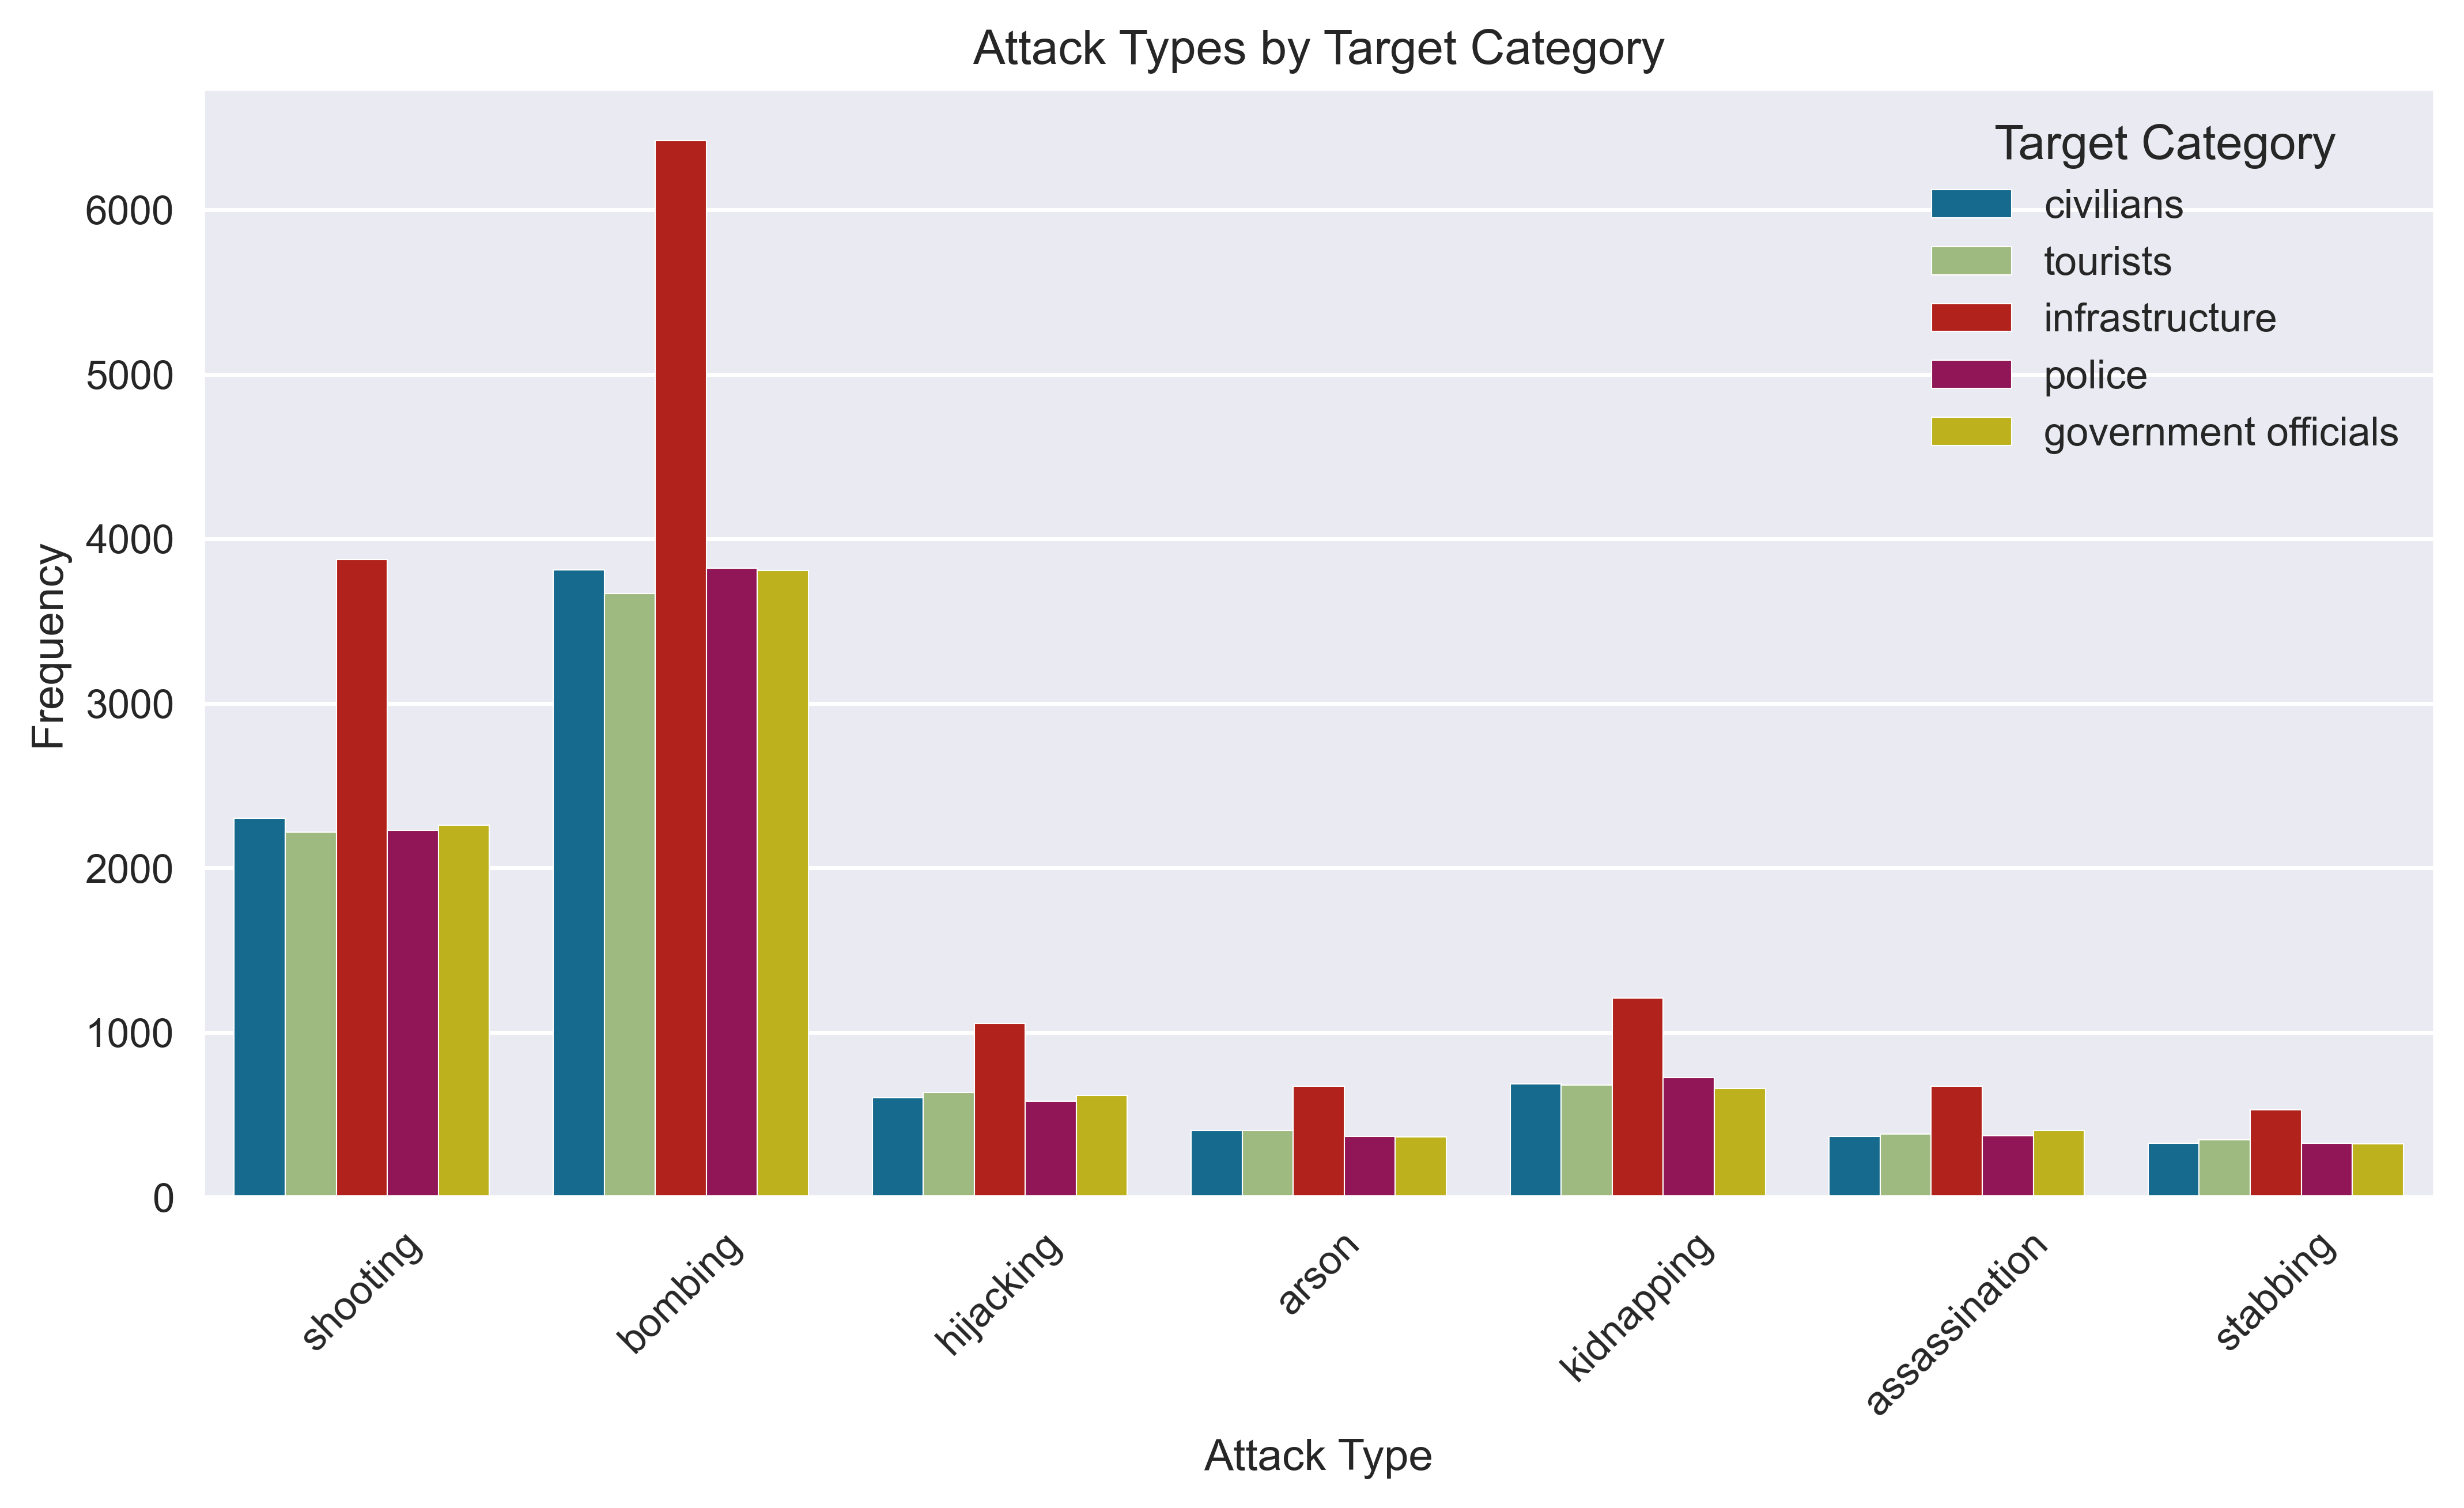

In [40]:
# relationship between 'Attack Type' and 'Target Category'

sns.countplot(data=atck, x='atcktype', hue='targetT')
plt.title('Attack Types by Target Category')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Target Category')
plt.show()

<h2 style="color:blue; font-family: Arial;">Observation:</h2>

<h3 style="color:blue; font-family: Arial;">1) Most of the bombing attack are done on infrastructure</h3>

# Feature Selection

In [41]:
atck.drop("Time", axis=1, inplace=True)

In [42]:
atck.drop("Year", axis=1, inplace=True)

In [43]:
atck2 = atck.copy()

In [44]:
atck2.head()

dow Location   atcktype Perpetrator  Associates  injured  deceased  \
0   saturday   mumbai   shooting     group c         1.0     21.0      19.0   
1   thursday  nairobi    bombing     group a         6.0      5.0      21.0   
2   thursday     lima  hijacking     group c         2.0     49.0      11.0   
3  wednesday    tokyo    bombing     group c         9.0     21.0      14.0   
4    tuesday    paris    bombing     group c         0.0     27.0      24.0   

          targetT          weapon claimedby    iqtip     Motive atcksuccess  \
0       civilians  bladed weapons   unknown  unknown  religious          no   
1        tourists        chemical   group c       no  religious          no   
2  infrastructure        chemical   group d       no     ethnic          no   
3       civilians      explosives   group c  unknown  religious         yes   
4  infrastructure        firearms   unknown       no     ethnic         yes   

   arrests fundings trainingloc communicate  Major_Incident country  
0      4.0    local    domestic  cellphones               1  turkey  
1      5.0  unknown      abroad    internet               1   kenya  
2     10.0    local    domestic    internet               1    peru  
3      5.0    local    domestic  cellphones               1   japan  
4      9.0  unknown    domestic  cellphones               1  france

In [45]:
#label-encoding features 
label_col = ['dow','Location','Perpetrator','claimedby','country']
#One-hot encoding features
ohe_col = ['atcktype','targetT','weapon','iqtip','Motive','atcksuccess','fundings','trainingloc','communicate']

In [46]:
#Encoding values
label_encodings = defaultdict(dict)

for column in label_col:
    label_encodings[column] = {label: encoding for encoding, label in enumerate(atck2[column].unique())}


for feature, encoding_dict in label_encodings.items():
    print(f"Label Encoding for {feature}:")
    for label, encoding in encoding_dict.items():
        print(f"{label} -> {encoding}")
    print("\n")

Label Encoding for dow:
saturday -> 0
thursday -> 1
wednesday -> 2
tuesday -> 3
friday -> 4
monday -> 5
sunday -> 6


Label Encoding for Location:
mumbai -> 0
nairobi -> 1
lima -> 2
tokyo -> 3
paris -> 4
new york -> 5
rio de janeiro -> 6
madrid -> 7
cape town -> 8
bangkok -> 9
cairo -> 10
berlin -> 11
london -> 12
sydney -> 13
istanbul -> 14
jakarta -> 15
buenos aires -> 16
seoul -> 17
moscow -> 18
rome -> 19
dubai -> 20
toronto -> 21
athens -> 22
mexico city -> 23
beijing -> 24


Label Encoding for Perpetrator:
group c -> 0
group a -> 1
group d -> 2
group b -> 3


Label Encoding for claimedby:
unknown -> 0
group c -> 1
group d -> 2
group b -> 3
group a -> 4
group q -> 5
group k -> 6
group m -> 7
group i -> 8
group u -> 9
group p -> 10
group x -> 11
group l -> 12
group w -> 13
group y -> 14
group z -> 15
group o -> 16
group s -> 17
group e -> 18
group g -> 19
group h -> 20
group r -> 21
group n -> 22
group t -> 23
group v -> 24
group f -> 25
group j -> 26


Label Encoding for country:


In [47]:
#label enoding
LE = LabelEncoder()

for column in label_col:
    atck2[column] = LE.fit_transform(atck2[column])

In [48]:
atck2 = pd.get_dummies(data=atck2, columns=ohe_col)

In [49]:
atck2.head().T

0     1     2     3     4
dow                            2.0   4.0   4.0   6.0   5.0
Location                      15.0  16.0  10.0  23.0  18.0
Perpetrator                    2.0   0.0   2.0   2.0   2.0
Associates                     1.0   6.0   2.0   9.0   0.0
injured                       21.0   5.0  49.0  21.0  27.0
deceased                      19.0  21.0  11.0  14.0  24.0
claimedby                     26.0   2.0   3.0   2.0  26.0
arrests                        4.0   5.0  10.0   5.0   9.0
Major_Incident                 1.0   1.0   1.0   1.0   1.0
country                       21.0  13.0  15.0  12.0   6.0
atcktype_arson                 0.0   0.0   0.0   0.0   0.0
atcktype_assassination         0.0   0.0   0.0   0.0   0.0
atcktype_bombing               0.0   1.0   0.0   1.0   1.0
atcktype_hijacking             0.0   0.0   1.0   0.0   0.0
atcktype_kidnapping            0.0   0.0   0.0   0.0   0.0
atcktype_shooting              1.0   0.0   0.0   0.0   0.0
atcktype_stabbing              0.0   0.0   0.0   0.0   0.0
targetT_civilians              1.0   0.0   0.0   1.0   0.0
targetT_government officials   0.0   0.0   0.0   0.0   0.0
targetT_infrastructure         0.0   0.0   1.0   0.0   1.0
targetT_police                 0.0   0.0   0.0   0.0   0.0
targetT_tourists               0.0   1.0   0.0   0.0   0.0
weapon_bladed weapons          1.0   0.0   0.0   0.0   0.0
weapon_chemical                0.0   1.0   1.0   0.0   0.0
weapon_explosives              0.0   0.0   0.0   1.0   0.0
weapon_firearms                0.0   0.0   0.0   0.0   1.0
weapon_incendiary              0.0   0.0   0.0   0.0   0.0
weapon_melee                   0.0   0.0   0.0   0.0   0.0
iqtip_no                       0.0   1.0   1.0   0.0   1.0
iqtip_unknown                  1.0   0.0   0.0   1.0   0.0
iqtip_yes                      0.0   0.0   0.0   0.0   0.0
Motive_ethnic                  0.0   0.0   1.0   0.0   1.0
Motive_political               0.0   0.0   0.0   0.0   0.0
Motive_religious               1.0   1.0   0.0   1.0   0.0
Motive_retaliation             0.0   0.0   0.0   0.0   0.0
Motive_unknown                 0.0   0.0   0.0   0.0   0.0
atcksuccess_no                 1.0   1.0   1.0   0.0   0.0
atcksuccess_unknown            0.0   0.0   0.0   0.0   0.0
atcksuccess_yes                0.0   0.0   0.0   1.0   1.0
fundings_international         0.0   0.0   0.0   0.0   0.0
fundings_local                 1.0   0.0   1.0   1.0   0.0
fundings_unknown               0.0   1.0   0.0   0.0   1.0
trainingloc_abroad             0.0   1.0   0.0   0.0   0.0
trainingloc_domestic           1.0   0.0   1.0   1.0   1.0
communicate_cellphones         1.0   0.0   0.0   1.0   1.0
communicate_couriers           0.0   0.0   0.0   0.0   0.0
communicate_internet           0.0   1.0   1.0   0.0   0.0

In [50]:
atck2.info

<bound method DataFrame.info of        dow  Location  Perpetrator  Associates  injured  deceased  claimedby  \
0        2        15            2         1.0     21.0      19.0         26   
1        4        16            0         6.0      5.0      21.0          2   
2        4        10            2         2.0     49.0      11.0          3   
3        6        23            2         9.0     21.0      14.0          2   
4        5        18            2         0.0     27.0      24.0         26   
...    ...       ...          ...         ...      ...       ...        ...   
49995    1         0            1         6.0     21.0      23.0          2   
49996    5        19            1         3.0      5.0       4.0          0   
49997    4        15            1         7.0      0.0       8.0         26   
49998    2         8            2         7.0     17.0      10.0          0   
49999    6        10            2         0.0     38.0      16.0          2   

       arrests  Maj

In [51]:
X = atck2.drop('Major_Incident',axis=1)
Y = atck2['Major_Incident']

<h2 style="color:black; font-family: Arial;">Recursive Feature Elimination(RFE with Logistic regression)</h2>

In [52]:
rfe = RFE(LogisticRegression())

rfe.fit(X,Y)

RFE(estimator=LogisticRegression())

In [53]:
rfe.ranking_

array([23, 22,  1, 19, 10,  1, 24, 20, 21,  1,  1, 17,  1,  1, 15,  1,  1,
        8,  2,  1, 18,  1,  1,  1,  9,  1,  1,  6,  5,  3,  1,  1, 14, 16,
       13, 11, 12,  1,  1,  7,  1,  1,  4,  1,  1,  1])

In [54]:
rfeL_sel = pd.DataFrame({
    'Ranking':rfe.ranking_,
    'Features':X.columns
})


In [55]:
rfeL_sel[rfeL_sel['Ranking']==1]

Ranking                Features
2         1             Perpetrator
5         1                deceased
9         1          atcktype_arson
10        1  atcktype_assassination
12        1      atcktype_hijacking
13        1     atcktype_kidnapping
15        1       atcktype_stabbing
16        1       targetT_civilians
19        1          targetT_police
21        1   weapon_bladed weapons
22        1         weapon_chemical
23        1       weapon_explosives
25        1       weapon_incendiary
26        1            weapon_melee
30        1           Motive_ethnic
31        1        Motive_political
37        1         atcksuccess_yes
38        1  fundings_international
40        1        fundings_unknown
41        1      trainingloc_abroad
43        1  communicate_cellphones
44        1    communicate_couriers
45        1    communicate_internet

<h2 style="color:black; font-family: Arial;">Recursive Feature Elimination(RFE with DecisionTree)</h2>

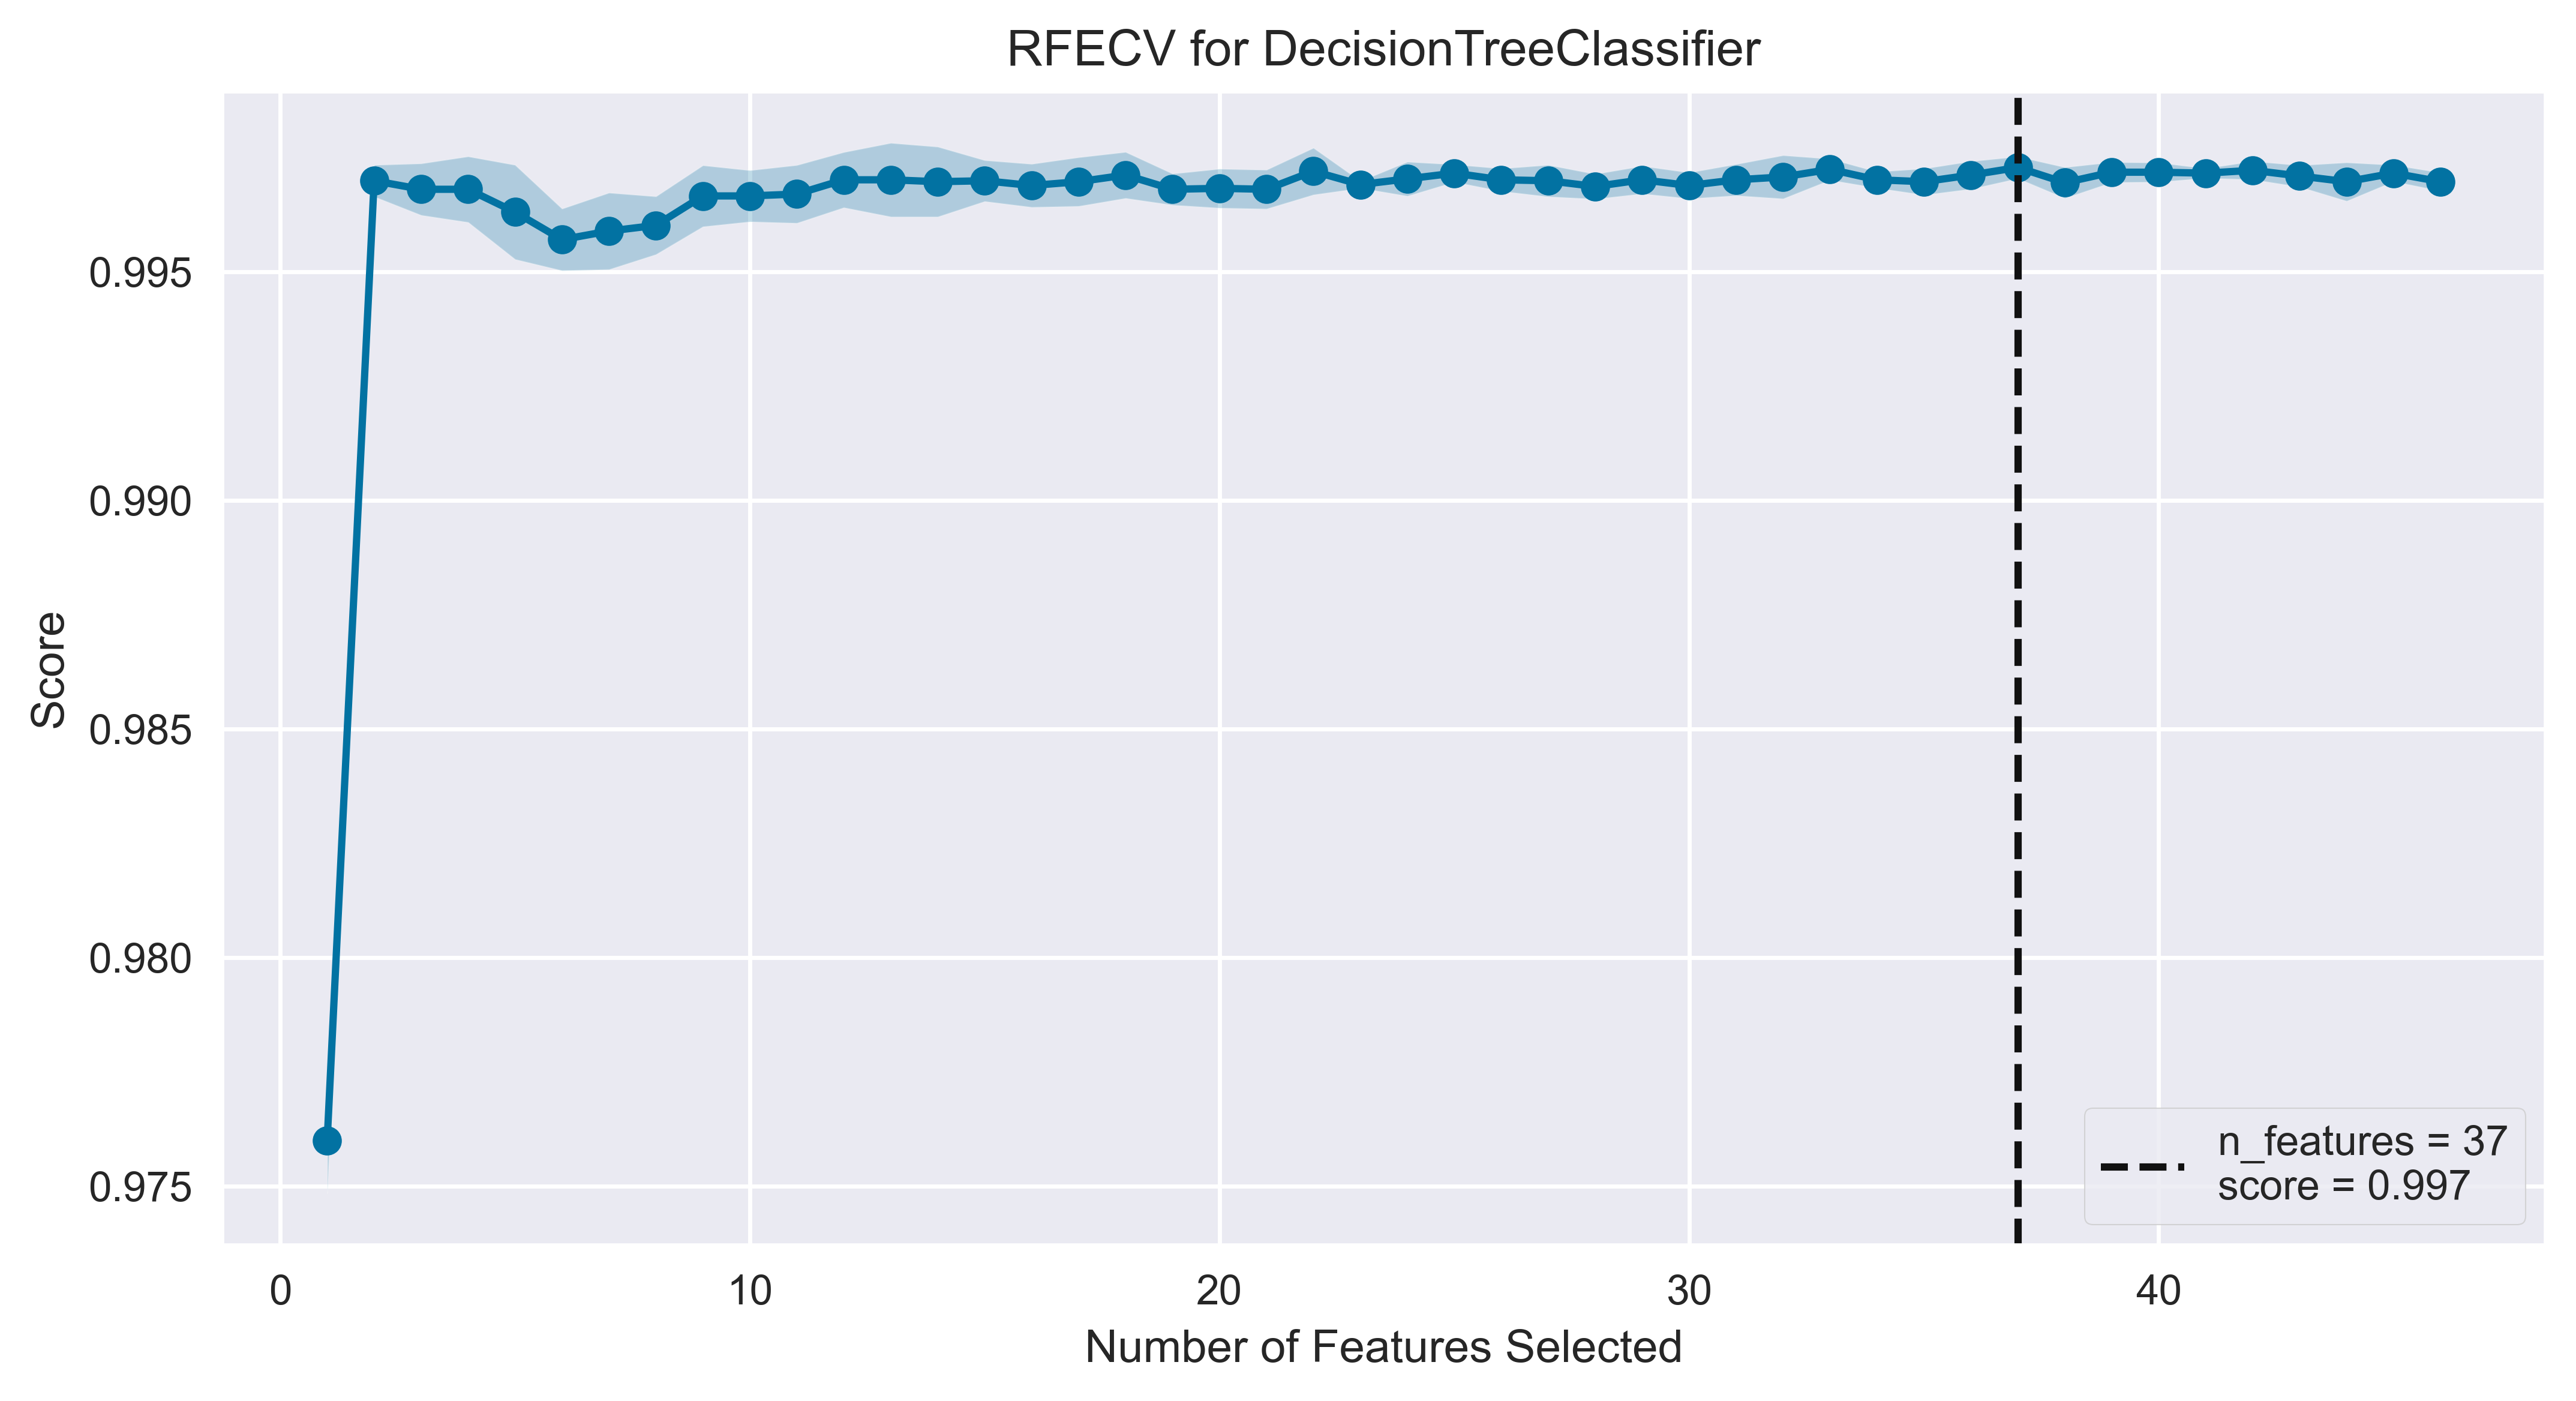

In [56]:
rfed = rfecv(DecisionTreeClassifier(),X,Y)

<h2 style="color:blue; font-family: Arial;">Observation:</h2>
<h3 style="color:blue; font-family: Arial;">Number of features to select: 32</h3> 

In [57]:
rfed.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,
        8,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  9,  1,  1,  7,  1,  4,
       10,  1,  1,  1,  1,  2,  1,  1,  6,  1,  1,  1])

In [58]:
rfe_sel = pd.DataFrame({
    'Ranking':rfed.ranking_,
    'Features':X.columns
})

In [59]:
rfe_sel[rfe_sel['Ranking']==1]

Ranking                Features
0         1                     dow
1         1                Location
2         1             Perpetrator
3         1              Associates
4         1                 injured
5         1                deceased
6         1               claimedby
7         1                 arrests
8         1                 country
9         1          atcktype_arson
10        1  atcktype_assassination
11        1        atcktype_bombing
12        1      atcktype_hijacking
14        1       atcktype_shooting
15        1       atcktype_stabbing
16        1       targetT_civilians
19        1          targetT_police
20        1        targetT_tourists
21        1   weapon_bladed weapons
22        1         weapon_chemical
23        1       weapon_explosives
24        1         weapon_firearms
25        1       weapon_incendiary
26        1            weapon_melee
27        1                iqtip_no
29        1               iqtip_yes
30        1           Motive_ethnic
32        1        Motive_religious
35        1          atcksuccess_no
36        1     atcksuccess_unknown
37        1         atcksuccess_yes
38        1  fundings_international
40        1        fundings_unknown
41        1      trainingloc_abroad
43        1  communicate_cellphones
44        1    communicate_couriers
45        1    communicate_internet

<h2 style="color:black; font-family: Arial;">Tree  based method</h2>

In [60]:
dt = DecisionTreeClassifier()

dt.fit(X,Y)

DecisionTreeClassifier()

In [61]:
dt.feature_importances_

array([2.51648967e-04, 6.08670844e-04, 5.45744223e-03, 2.70485294e-04,
       6.78545447e-02, 9.16520999e-01, 2.36918978e-04, 5.86359332e-04,
       2.30657728e-04, 2.29053713e-04, 2.16559874e-04, 2.42336442e-04,
       1.85169131e-04, 7.31436443e-05, 1.98532749e-04, 8.35927363e-05,
       3.70493316e-04, 0.00000000e+00, 7.31436443e-05, 9.60010331e-05,
       2.86019760e-04, 7.24896736e-04, 9.94130614e-04, 1.64752610e-04,
       2.28715556e-04, 8.10327675e-04, 9.68532468e-04, 3.19877580e-04,
       2.28754738e-04, 1.60916017e-04, 1.04490920e-04, 0.00000000e+00,
       2.14452703e-04, 0.00000000e+00, 0.00000000e+00, 1.93482354e-04,
       4.03373117e-05, 2.48052359e-05, 6.48318665e-05, 0.00000000e+00,
       1.21759737e-04, 1.05797057e-04, 4.26671258e-05, 1.81354499e-05,
       1.32877620e-04, 2.63685787e-04])

In [62]:
ig_sel = pd.DataFrame({
    'IG':dt.feature_importances_,
    'Features':X.columns
})

In [63]:
ig_sel.sort_values(by='IG',ascending=False)

IG                      Features
5   0.916521                      deceased
4   0.067855                       injured
2   0.005457                   Perpetrator
22  0.000994               weapon_chemical
26  0.000969                  weapon_melee
25  0.000810             weapon_incendiary
21  0.000725         weapon_bladed weapons
1   0.000609                      Location
7   0.000586                       arrests
16  0.000370             targetT_civilians
27  0.000320                      iqtip_no
20  0.000286              targetT_tourists
3   0.000270                    Associates
45  0.000264          communicate_internet
0   0.000252                           dow
11  0.000242              atcktype_bombing
6   0.000237                     claimedby
8   0.000231                       country
9   0.000229                atcktype_arson
28  0.000229                 iqtip_unknown
24  0.000229               weapon_firearms
10  0.000217        atcktype_assassination
32  0.000214              Motive_religious
14  0.000199             atcktype_shooting
35  0.000193                atcksuccess_no
12  0.000185            atcktype_hijacking
23  0.000165             weapon_explosives
29  0.000161                     iqtip_yes
44  0.000133          communicate_couriers
40  0.000122              fundings_unknown
41  0.000106            trainingloc_abroad
30  0.000104                 Motive_ethnic
19  0.000096                targetT_police
15  0.000084             atcktype_stabbing
13  0.000073           atcktype_kidnapping
18  0.000073        targetT_infrastructure
38  0.000065        fundings_international
42  0.000043          trainingloc_domestic
36  0.000040           atcksuccess_unknown
37  0.000025               atcksuccess_yes
43  0.000018        communicate_cellphones
31  0.000000              Motive_political
33  0.000000            Motive_retaliation
34  0.000000                Motive_unknown
39  0.000000                fundings_local
17  0.000000  targetT_government officials

# Model building

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# Using 30 most Common columns
x = atck2[['Associates','injured','deceased','arrests','atcktype_arson','atcktype_assassination','atcktype_bombing','atcktype_hijacking','atcktype_shooting','atcktype_stabbing','targetT_civilians','targetT_infrastructure','targetT_police','targetT_tourists','targetT_government officials','weapon_bladed weapons','weapon_chemical','weapon_explosives','weapon_firearms','weapon_incendiary','weapon_melee','iqtip_no','iqtip_unknown','iqtip_yes','Motive_ethnic','Motive_religious','Motive_political','fundings_international','fundings_local','fundings_unknown']]
y = atck2['Major_Incident']

In [66]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [67]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (38535, 30)
X_test shape: (9634, 30)
y_train shape: (38535,)
y_test shape: (9634,)


<h2 style="color:black; font-family: Arial;">Logistic regression </h2>

In [68]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()


In [69]:
LR.fit(X_train, y_train)

LogisticRegression()

In [70]:
y_pred = LR.predict(X_test)

In [71]:
print(y_test[:25].values)
print(y_pred[:25])

[1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
[1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [72]:
# Calculate accuracy
accuracy_train = LR.score(X_train, y_train)
accuracy_test = LR.score(X_test, y_test)

print("Training Accuracy for random-forest:", accuracy_train)
print("Testing Accuracy for  random-forest:", accuracy_test)

Training Accuracy for random-forest: 0.9968859478396264
Testing Accuracy for  random-forest: 0.996159435333195


In [73]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [74]:
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)

Accuracy: 0.996159435333195
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2362
           1       1.00      1.00      1.00      7272

    accuracy                           1.00      9634
   macro avg       0.99      1.00      0.99      9634
weighted avg       1.00      1.00      1.00      9634



<h3 style="color:blue; font-family: Arial;">Accuracy: 99.6%</h3>
<h2 style="color:blue; font-family: Arial;">Conclusion from classification report:</h2>
<h3 style="color:blue; font-family: Arial;">1) Precision for Minor Incident is 0.99. This means that when the model predicts a minor incident, it is correct 99% of the time.</h3> 
<h3 style="color:blue; font-family: Arial;">2) Precision for Major Incident is 1.00. This means that when the model predicts a major incident, it is correct 100% of the time.</h3> 

Text(0.5, 134.61111111111106, 'Pred Label')

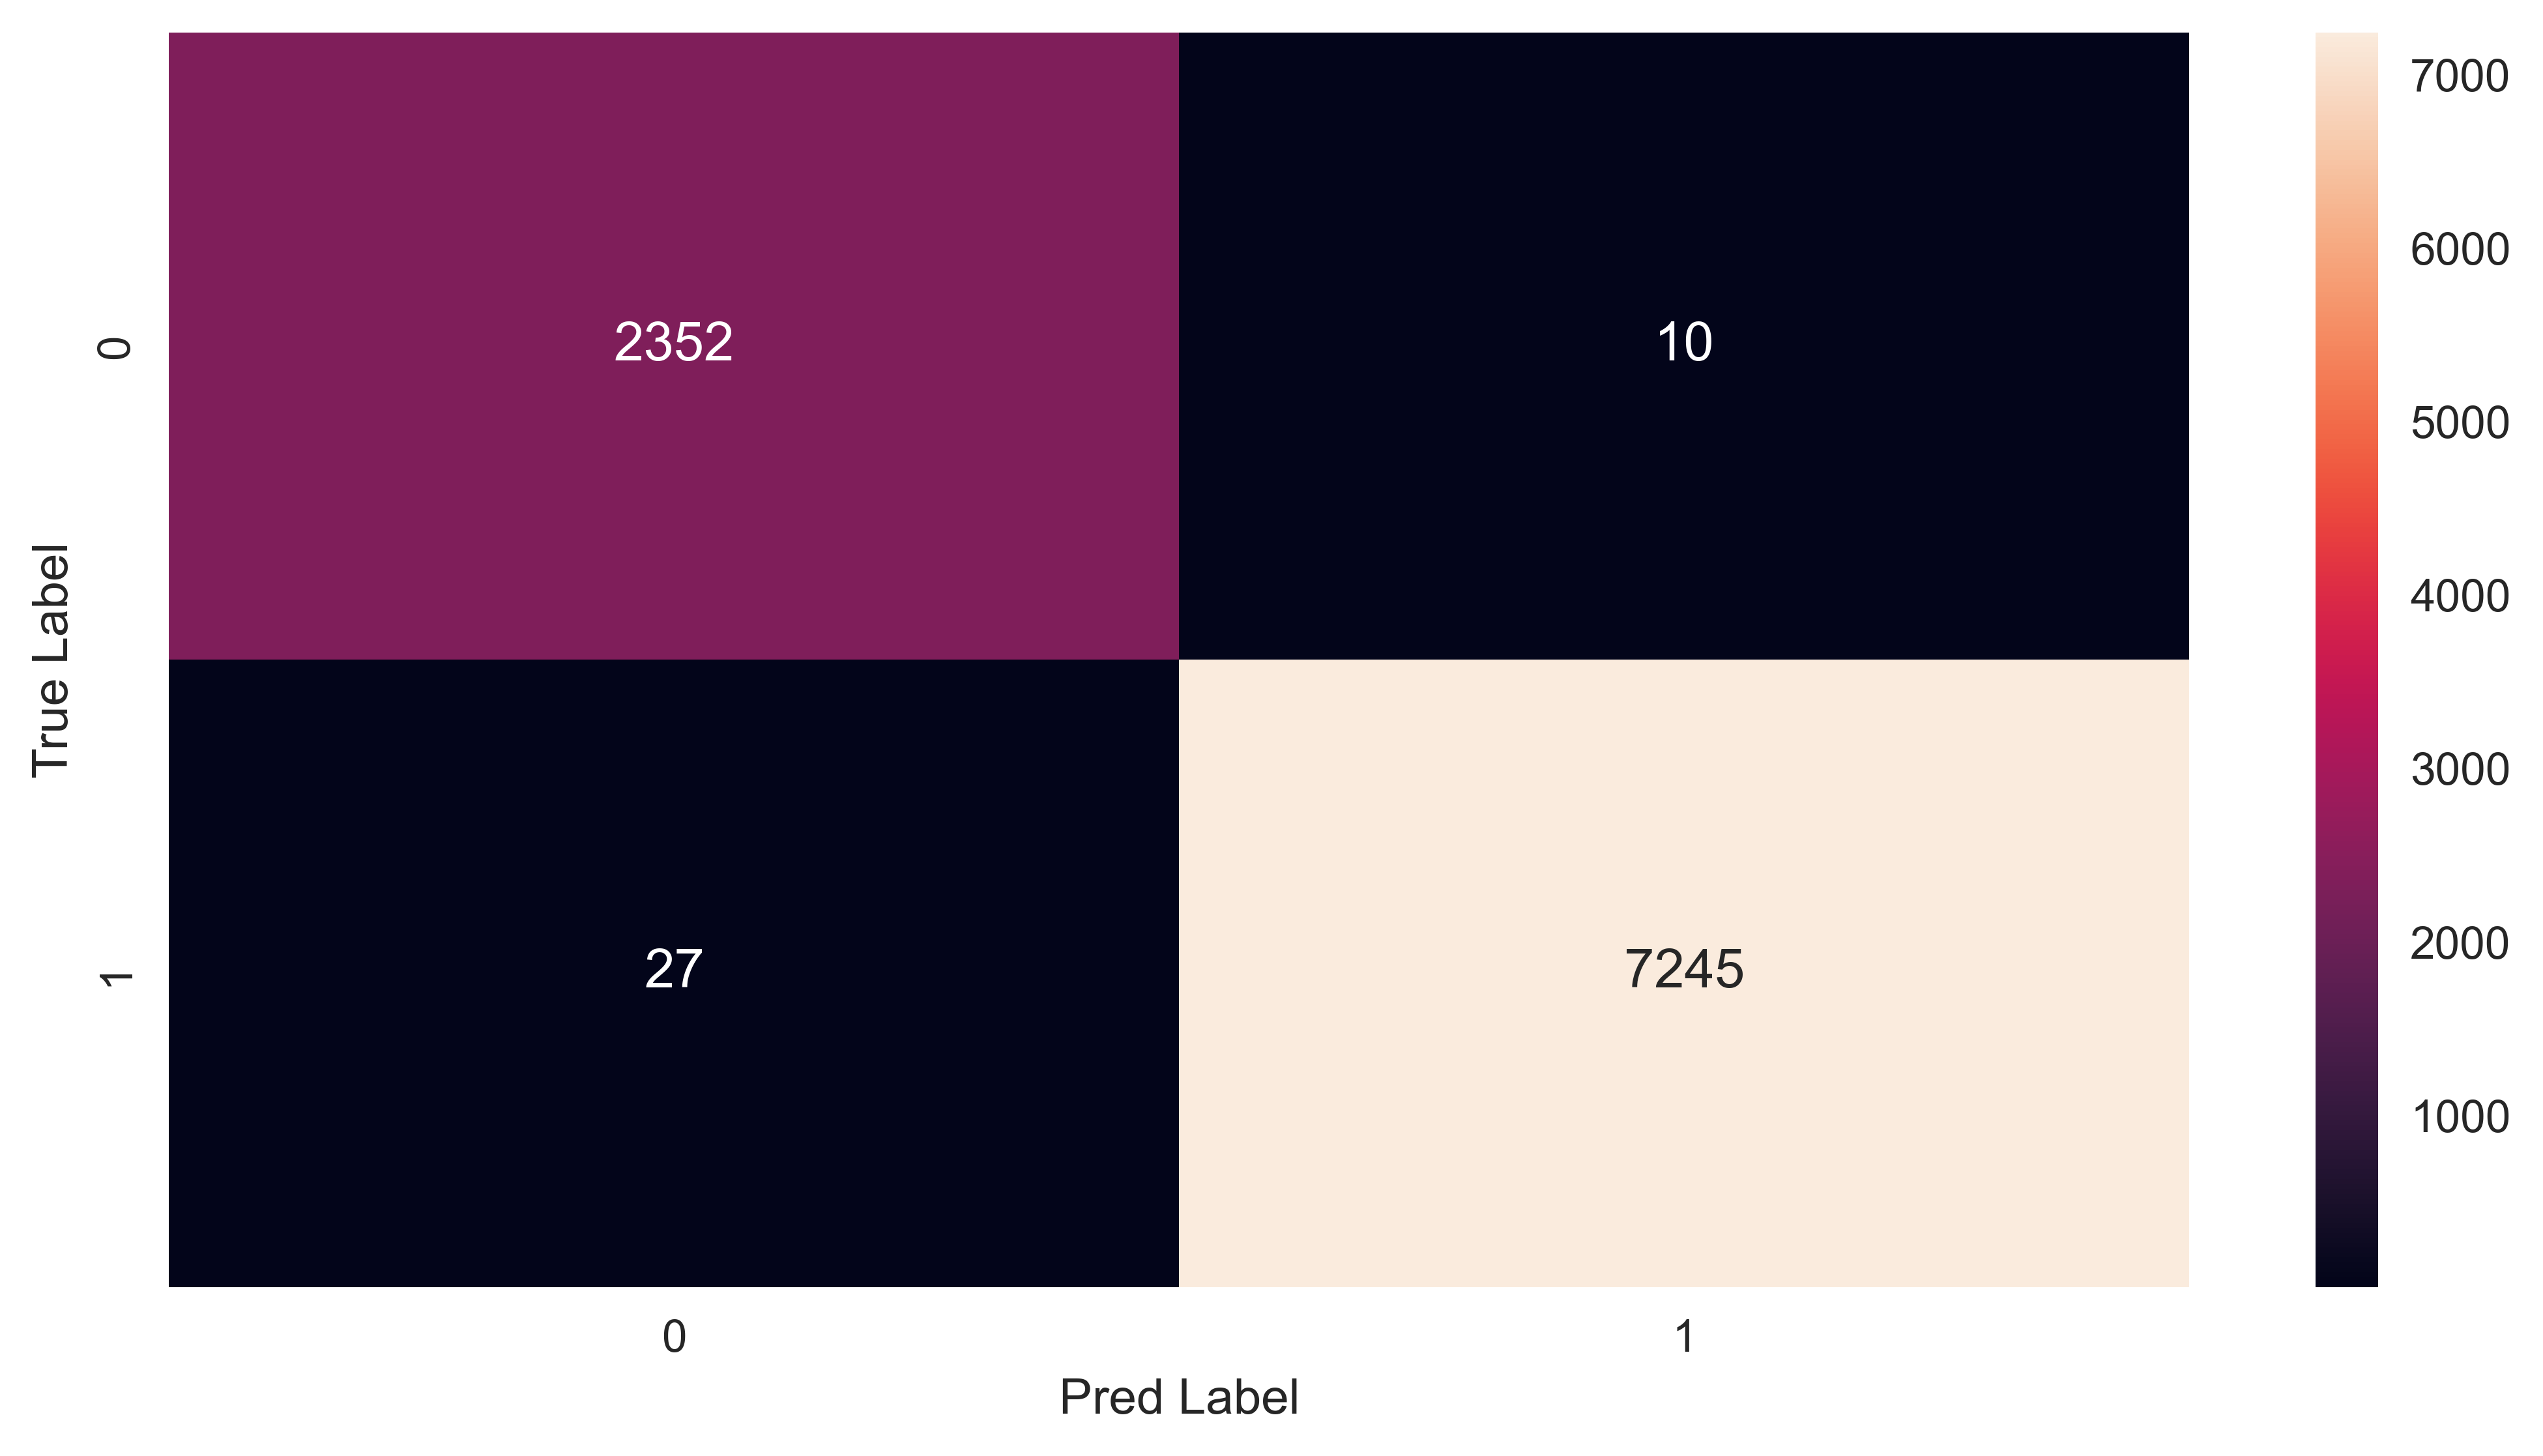

In [75]:
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt='.0f')
plt.ylabel('True Label')
plt.xlabel('Pred Label')

<h2 style="color:blue; font-family: Arial;">Conclusion from matrix:</h2>

<h3 style="color:blue; font-family: Arial;">2) Number of major incident correctly predicted major is 7245</h3>

<h3 style="color:blue; font-family: Arial;">3) Number of not major incident correctly predicted not major is 2352</h3>

<h3 style="color:blue; font-family: Arial;">4) Number of not major incident incorrectly predicted major is 10</h3>

<h3 style="color:blue; font-family: Arial;">5) Number of  major incident incorrectly predicted not major is 27</h3>

<h2 style="color:black; font-family: Arial;">Random Forest </h2>

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [77]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)

In [78]:
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [79]:
y_pred_rf = RF.predict(X_test)

In [80]:
print(y_test[:25].values)
print(y_pred_rf[:25])

[1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
[1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [81]:
# Calculate accuracy
accuracy_train = RF.score(X_train, y_train)
accuracy_test = RF.score(X_test, y_test)

print("Training Accuracy for random-forest:", accuracy_train)
print("Testing Accuracy for  random-forest:", accuracy_test)

Training Accuracy for random-forest: 1.0
Testing Accuracy for  random-forest: 0.9977164210089268


In [82]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)

report_rf =  classification_report(y_test, y_pred_rf)


print("Accuracy (Random Forest):", accuracy_rf)
print("Classification Report (Random Forest):\n",report_rf)


Accuracy (Random Forest): 0.9977164210089268
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2362
           1       1.00      1.00      1.00      7272

    accuracy                           1.00      9634
   macro avg       1.00      1.00      1.00      9634
weighted avg       1.00      1.00      1.00      9634



<h3 style="color:blue; font-family: Arial;">Accuracy: 99.77%</h3>
<h2 style="color:blue; font-family: Arial;">Conclusion from classification report:</h2>
<h3 style="color:blue; font-family: Arial;">1) Precision for Minor Incident is 0.99. This means that when the model predicts a minor incident, it is correct 99% of the time.</h3> 
<h3 style="color:blue; font-family: Arial;">2) Precision for Major Incident is 1.00. This means that when the model predicts a major incident, it is correct 100% of the time.</h3> 

Text(0.5, 134.61111111111106, 'Pred Label')

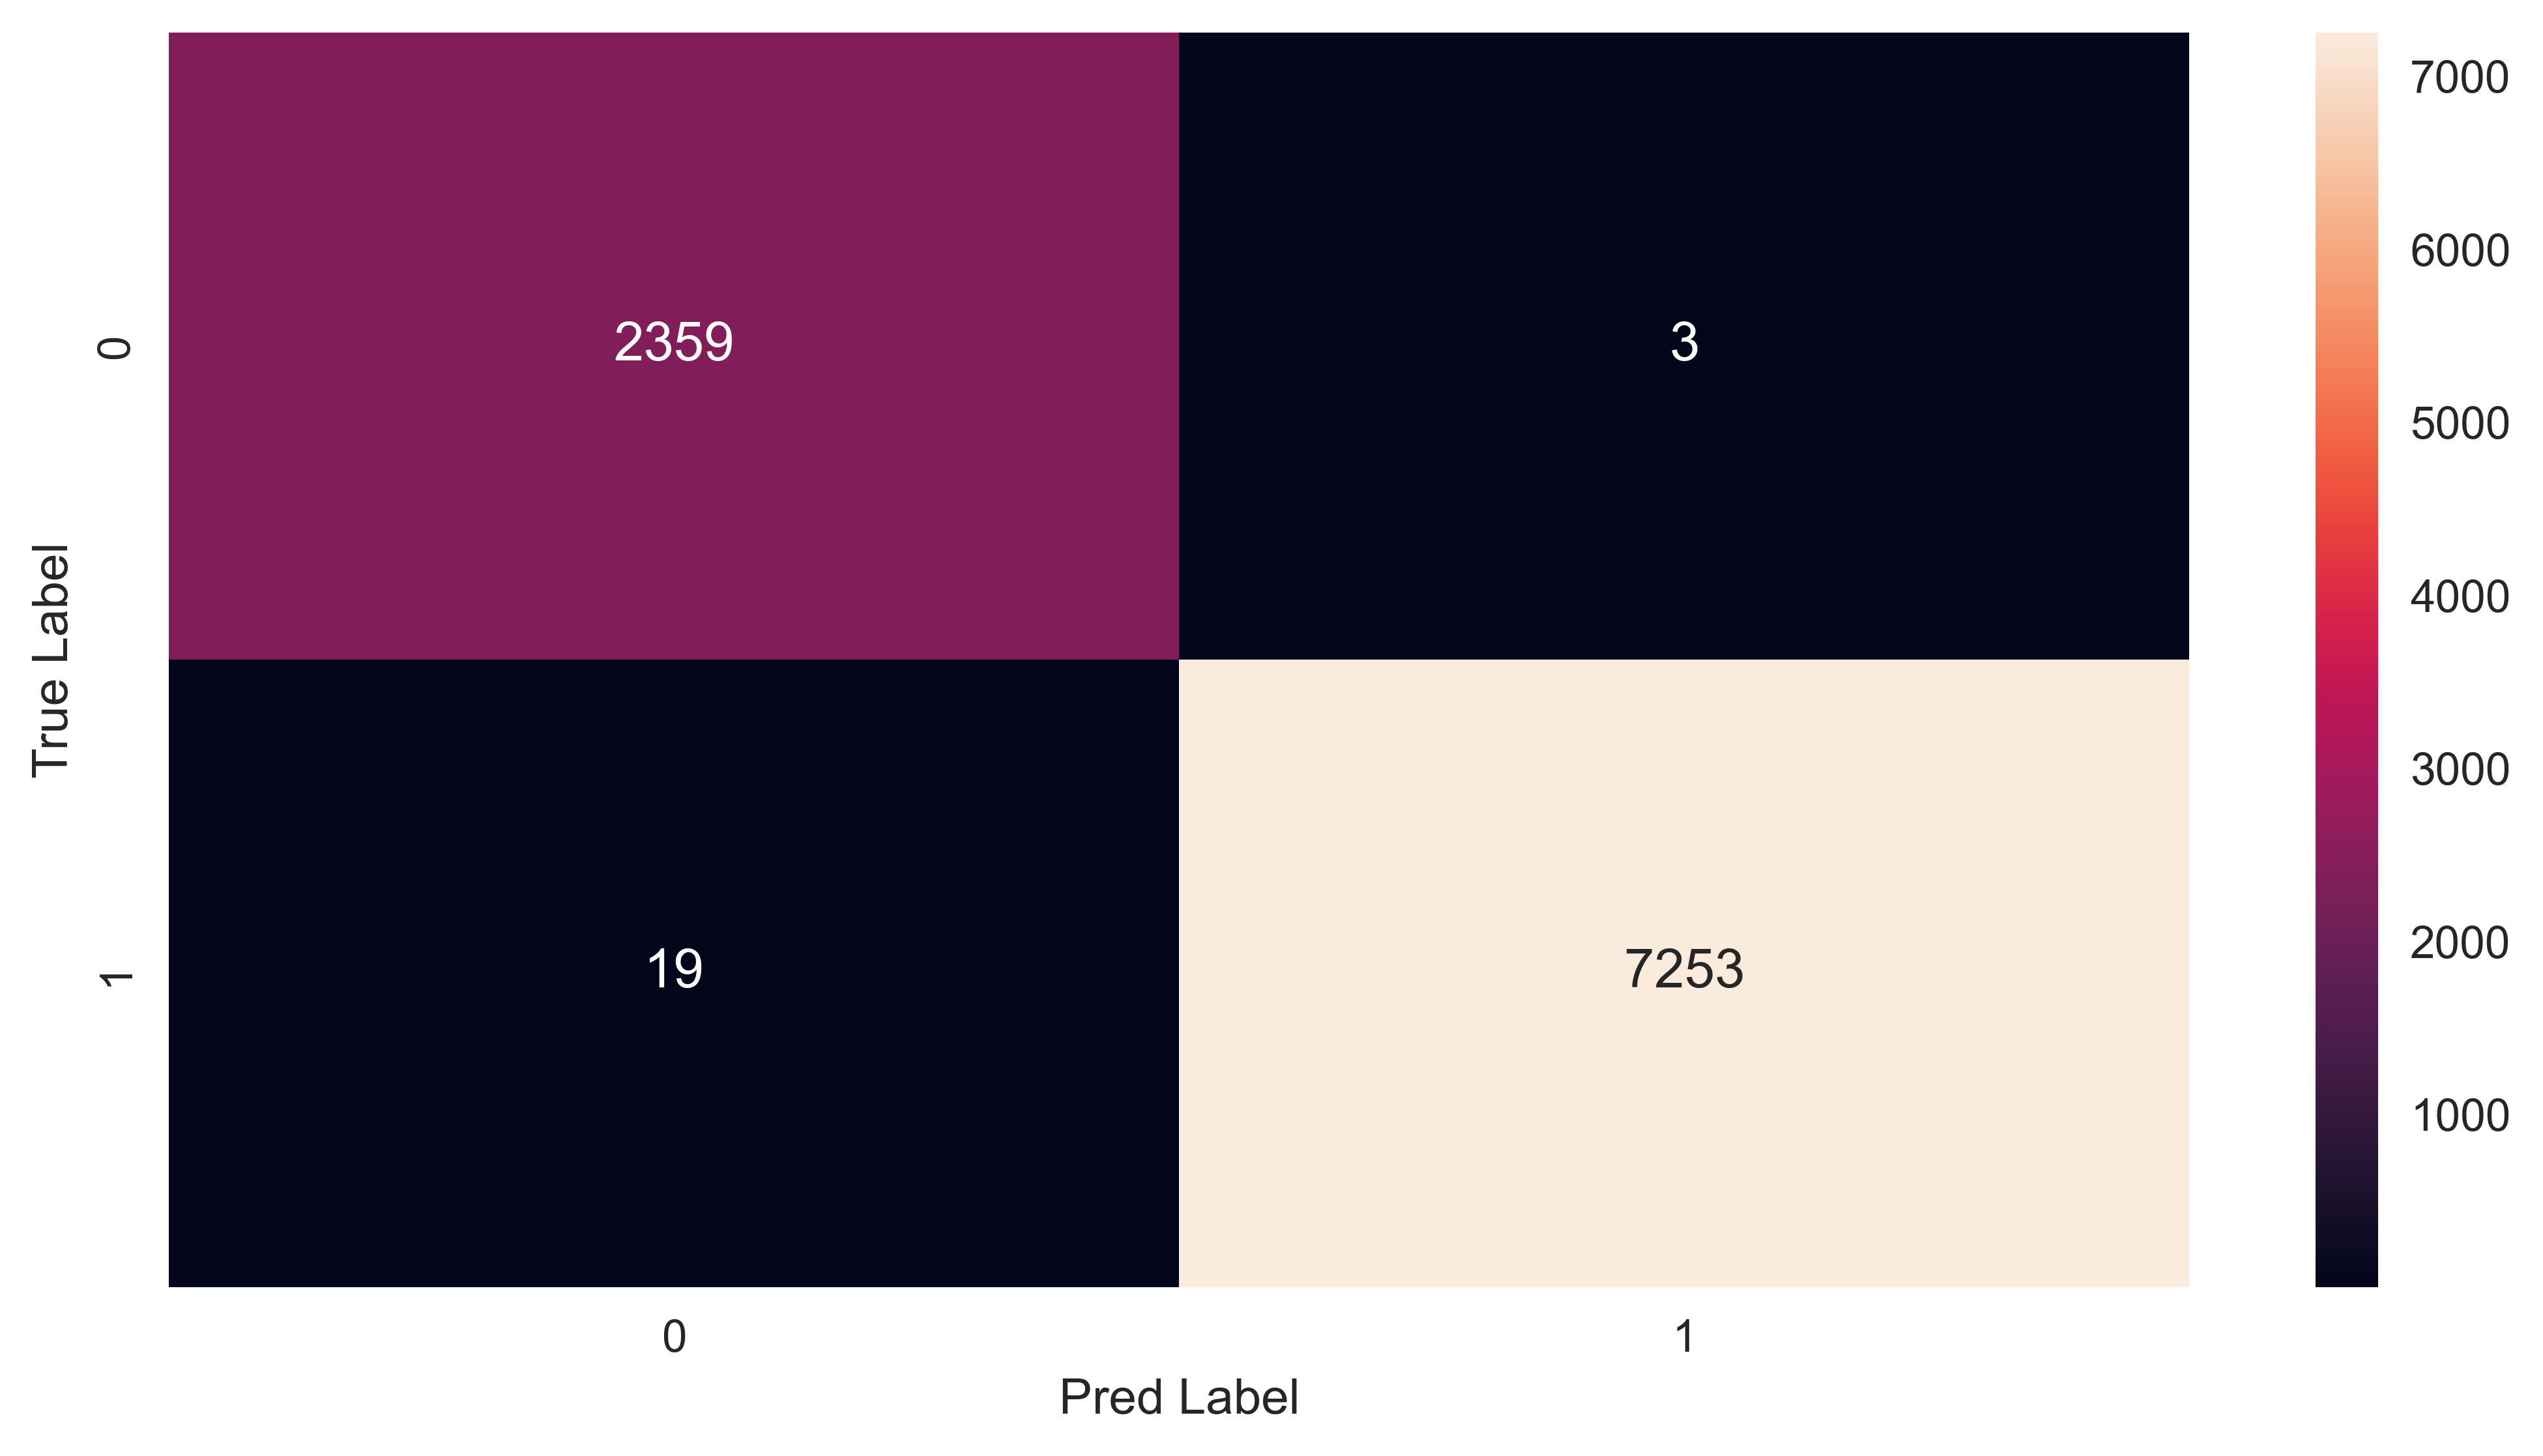

In [83]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(confusion_matrix_rf,annot=True,fmt='.0f')
plt.ylabel('True Label')
plt.xlabel('Pred Label')

<h2 style="color:blue; font-family: Arial;">Conclusion from matrix:</h2>

<h3 style="color:blue; font-family: Arial;">2) number of major incidents correctly predicted as major is 7253</h3>

<h3 style="color:blue; font-family: Arial;">3) number of not major incidents correctly predicted as not major is 2359</h3>

<h3 style="color:blue; font-family: Arial;">4) Number of not major incident incorrectly predicted major is 3</h3>

<h3 style="color:blue; font-family: Arial;">5) Number of  major incident incorrectly predicted not major is 19</h3>

<h2 style="color:black; font-family: Arial;">CATBOOST</h2>

In [84]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [85]:
CB = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, random_seed=42)

In [86]:
train_pool = Pool(X_train, label=y_train)

In [87]:
CB.fit(train_pool)


0:	learn: 0.3621950	total: 189ms	remaining: 3m 9s
1:	learn: 0.2524884	total: 202ms	remaining: 1m 40s
2:	learn: 0.1325520	total: 213ms	remaining: 1m 10s
3:	learn: 0.0750977	total: 222ms	remaining: 55.3s
4:	learn: 0.0446594	total: 232ms	remaining: 46.2s
5:	learn: 0.0294350	total: 241ms	remaining: 40s
6:	learn: 0.0206078	total: 250ms	remaining: 35.5s
7:	learn: 0.0153599	total: 261ms	remaining: 32.3s
8:	learn: 0.0123880	total: 272ms	remaining: 30s
9:	learn: 0.0103981	total: 283ms	remaining: 28s
10:	learn: 0.0091127	total: 293ms	remaining: 26.3s
11:	learn: 0.0082468	total: 303ms	remaining: 24.9s
12:	learn: 0.0076582	total: 313ms	remaining: 23.7s
13:	learn: 0.0071401	total: 322ms	remaining: 22.7s
14:	learn: 0.0067020	total: 332ms	remaining: 21.8s
15:	learn: 0.0064494	total: 340ms	remaining: 20.9s
16:	learn: 0.0062452	total: 349ms	remaining: 20.2s
17:	learn: 0.0060851	total: 357ms	remaining: 19.5s
18:	learn: 0.0058937	total: 365ms	remaining: 18.8s
19:	learn: 0.0056794	total: 373ms	remaining: 

In [88]:
y_pred_catboost = CB.predict(X_test)

In [89]:
print(y_test[:25].values)
print(y_pred_catboost[:25])

[1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
[1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [90]:
# Calculate accuracy
accuracy_train = CB.score(X_train, y_train)
accuracy_test = CB.score(X_test, y_test)

print("Training Accuracy for catbost:", accuracy_train)
print("Testing Accuracy for catboost:", accuracy_test)

Training Accuracy for catbost: 0.9986505773971714
Testing Accuracy for catboost: 0.9978202200539755


In [91]:
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)

report_catboost = classification_report(y_test, y_pred_catboost)


print("Accuracy (CatBoost):", accuracy_catboost)
print("Classification Report (CatBoost):\n", report_catboost)


Accuracy (CatBoost): 0.9978202200539755
Classification Report (CatBoost):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2362
           1       1.00      1.00      1.00      7272

    accuracy                           1.00      9634
   macro avg       1.00      1.00      1.00      9634
weighted avg       1.00      1.00      1.00      9634



<h3 style="color:blue; font-family: Arial;">Accuracy: 99.78%</h3>
<h2 style="color:blue; font-family: Arial;">Conclusion from classification report:</h2>
<h3 style="color:blue; font-family: Arial;">1) Precision for Minor Incident is 0.99. This means that when the model predicts a minor incident, it is correct 99% of the time.</h3> 
<h3 style="color:blue; font-family: Arial;">2) Precision for Major Incident is 1.00. This means that when the model predicts a major incident, it is correct 100% of the time.</h3> 

Text(0.5, 134.61111111111106, 'Pred Label')

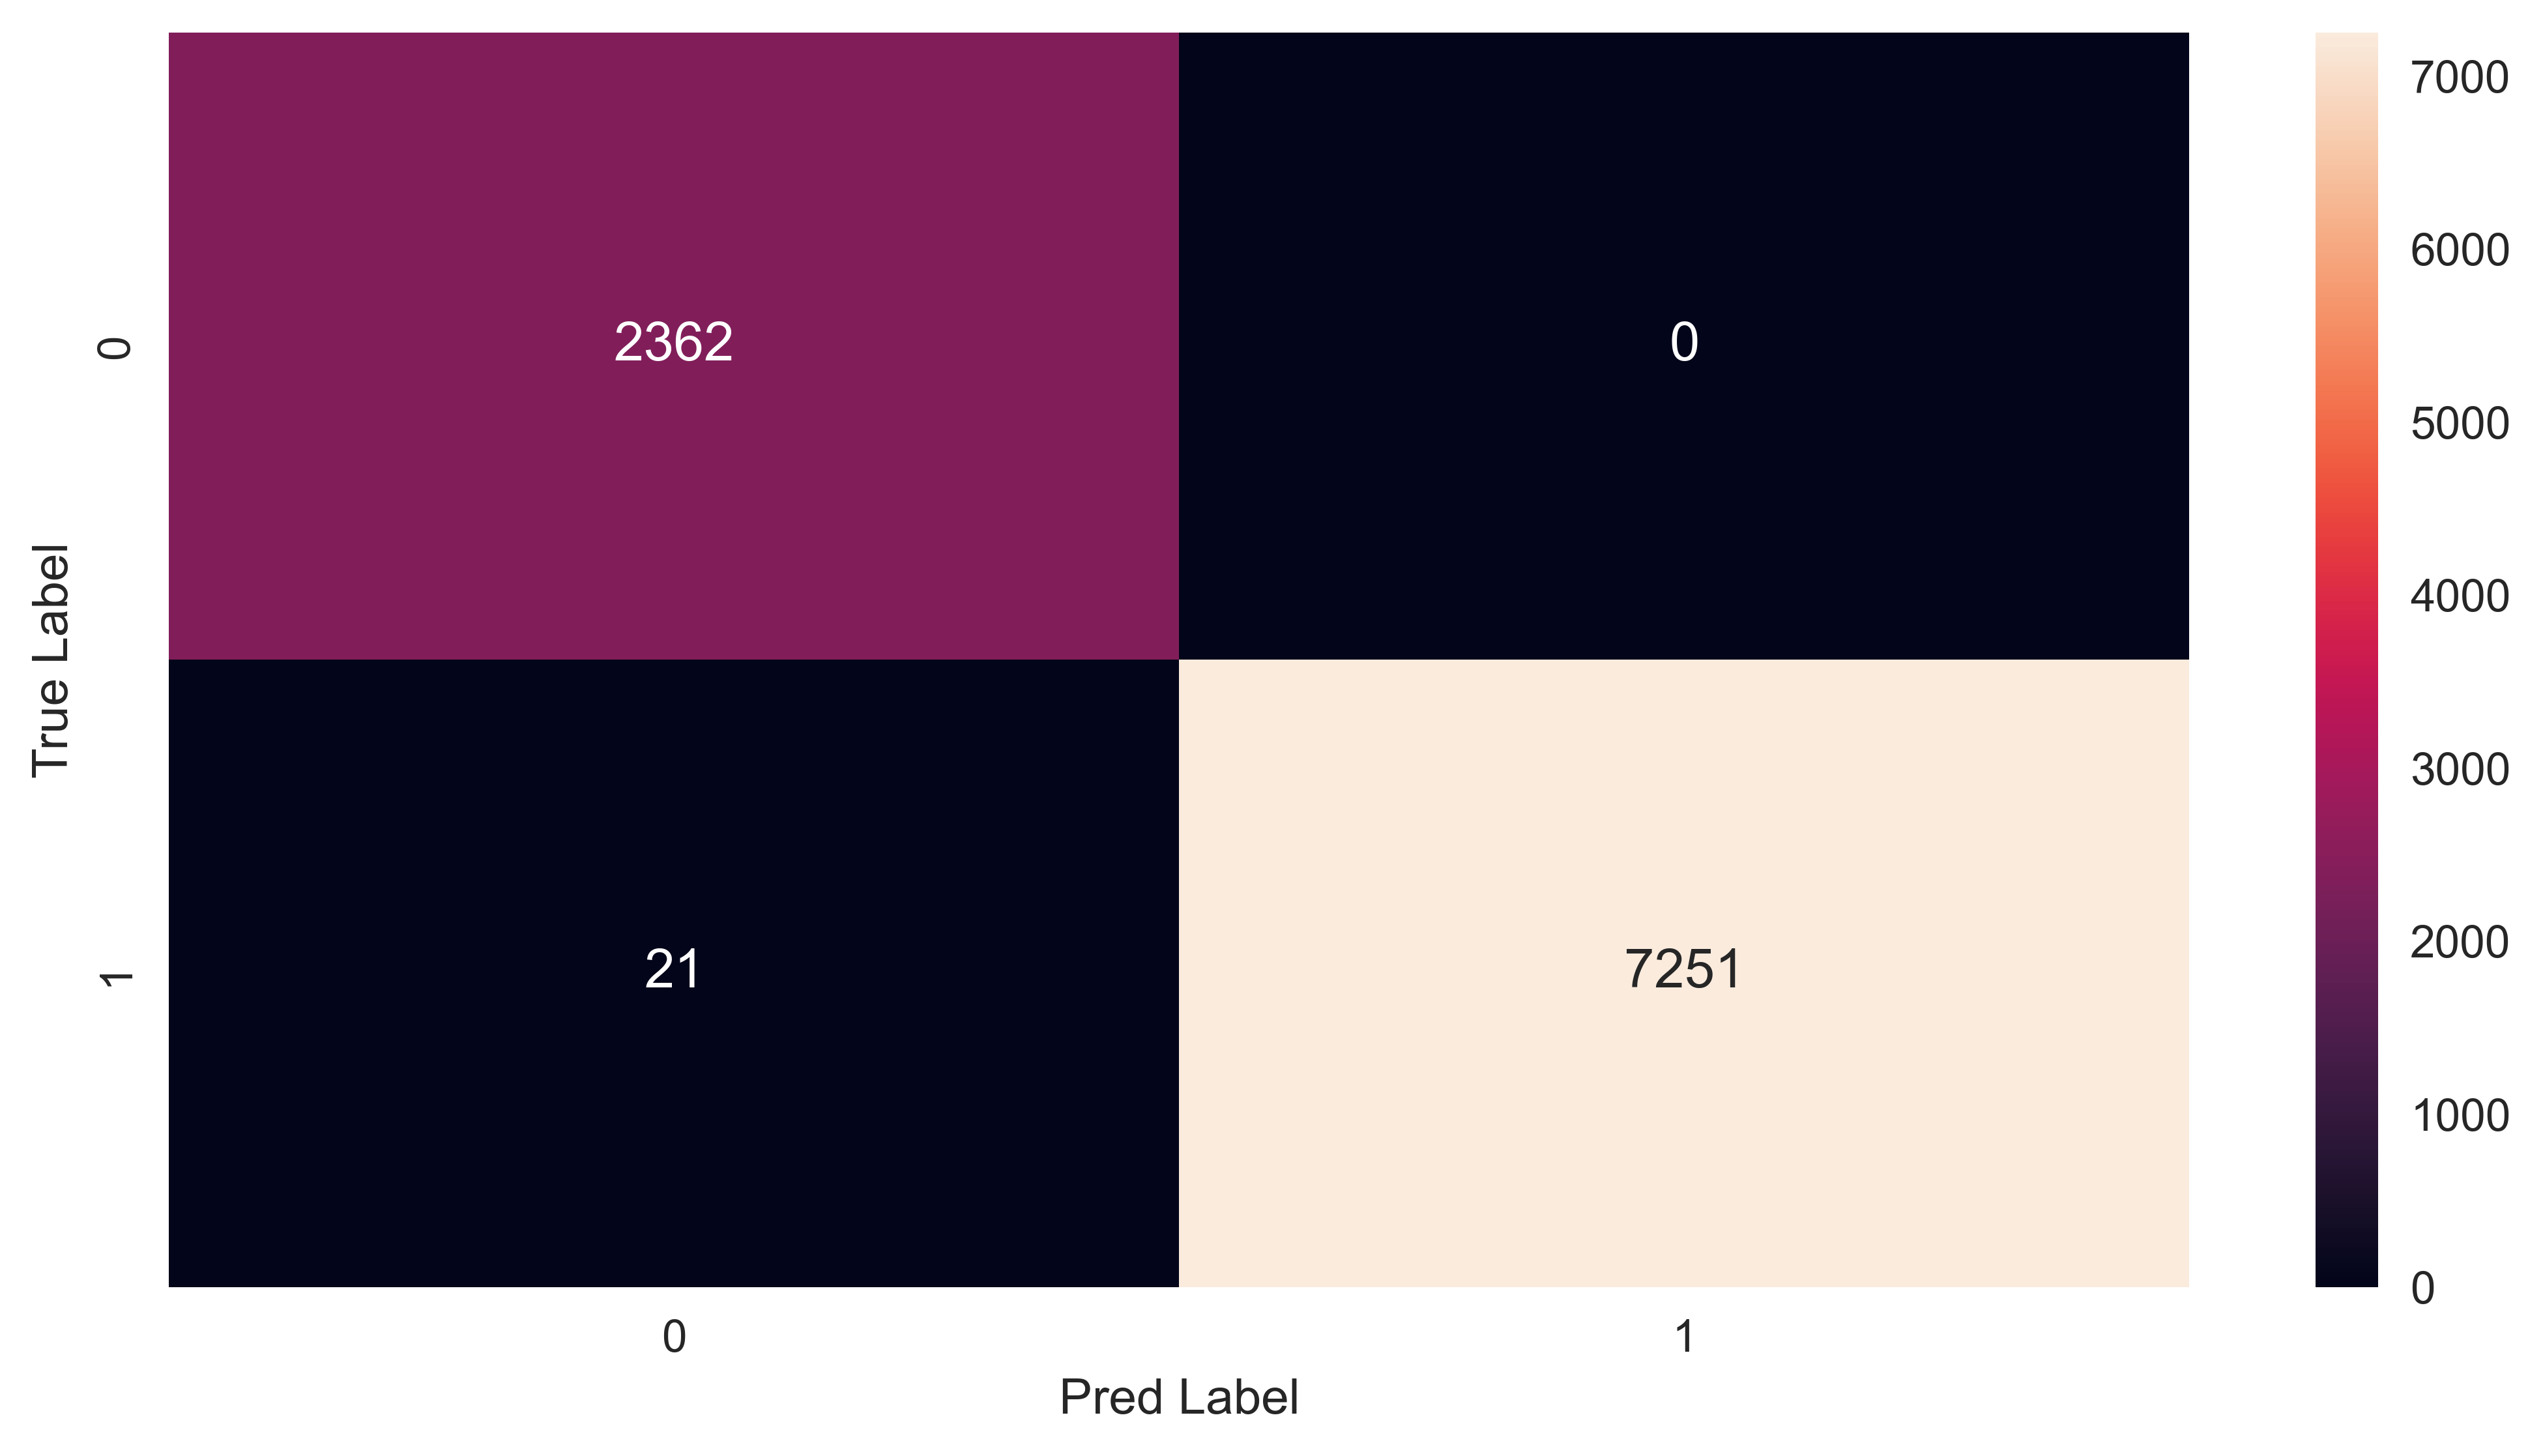

In [92]:
confusion_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)
sns.heatmap(confusion_matrix_catboost,annot=True,fmt='.0f')
plt.ylabel('True Label')
plt.xlabel('Pred Label')

<h2 style="color:blue; font-family: Arial;">Conclusion from matrix:</h2>

<h3 style="color:blue; font-family: Arial;">2) number of major incidents correctly predicted as major is 7251</h3>

<h3 style="color:blue; font-family: Arial;">3) number of not major incidents correctly predicted as not major is 2362</h3>

<h3 style="color:blue; font-family: Arial;">4) Number of not major incident incorrectly predicted major is 0</h3>

<h3 style="color:blue; font-family: Arial;">5) Number of  major incident incorrectly predicted not major is 21</h3>

<h2 style="color:black; font-family: Arial;">Xgboost</h2>

In [93]:
import xgboost as xgb
from xgboost import XGBClassifier  

In [94]:
xgb_model = XGBClassifier(
    objective='binary:logistic',  
    learning_rate=0.1,  
    n_estimators=100,  
    max_depth=3, 
    subsample=0.8, 
    colsample_bytree=0.8, 
)


In [95]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [96]:
y_pred_xgb = xgb_model.predict(X_test)


In [97]:
print(y_test[:25].values)
print(y_pred_xgb[:25])

[1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
[1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [98]:
# Calculate accuracy
accuracy_train = xgb_model.score(X_train, y_train)
accuracy_test = xgb_model.score(X_test, y_test)

print("Training Accuracy for xgb:", accuracy_train)
print("Testing Accuracy for xgb:", accuracy_test)

Training Accuracy for xgb: 0.9984170234851434
Testing Accuracy for xgb: 0.9978202200539755


In [99]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

report_xgb = classification_report(y_test, y_pred_xgb)

print("Accuracy (xgb):", accuracy_xgb)
print("Classification Report (xgb):\n", report_xgb)


Accuracy (xgb): 0.9978202200539755
Classification Report (xgb):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2362
           1       1.00      1.00      1.00      7272

    accuracy                           1.00      9634
   macro avg       1.00      1.00      1.00      9634
weighted avg       1.00      1.00      1.00      9634



<h3 style="color:blue; font-family: Arial;">Accuracy: 99.78%</h3>
<h2 style="color:blue; font-family: Arial;">Conclusion from classification report:</h2>
<h3 style="color:blue; font-family: Arial;">1) Precision for Minor Incident is 0.99. This means that when the model predicts a minor incident, it is correct 99% of the time.</h3> 
<h3 style="color:blue; font-family: Arial;">2) Precision for Major Incident is 1.00. This means that when the model predicts a major incident, it is correct 100% of the time.</h3> 

Text(0.5, 134.61111111111106, 'Pred Label')

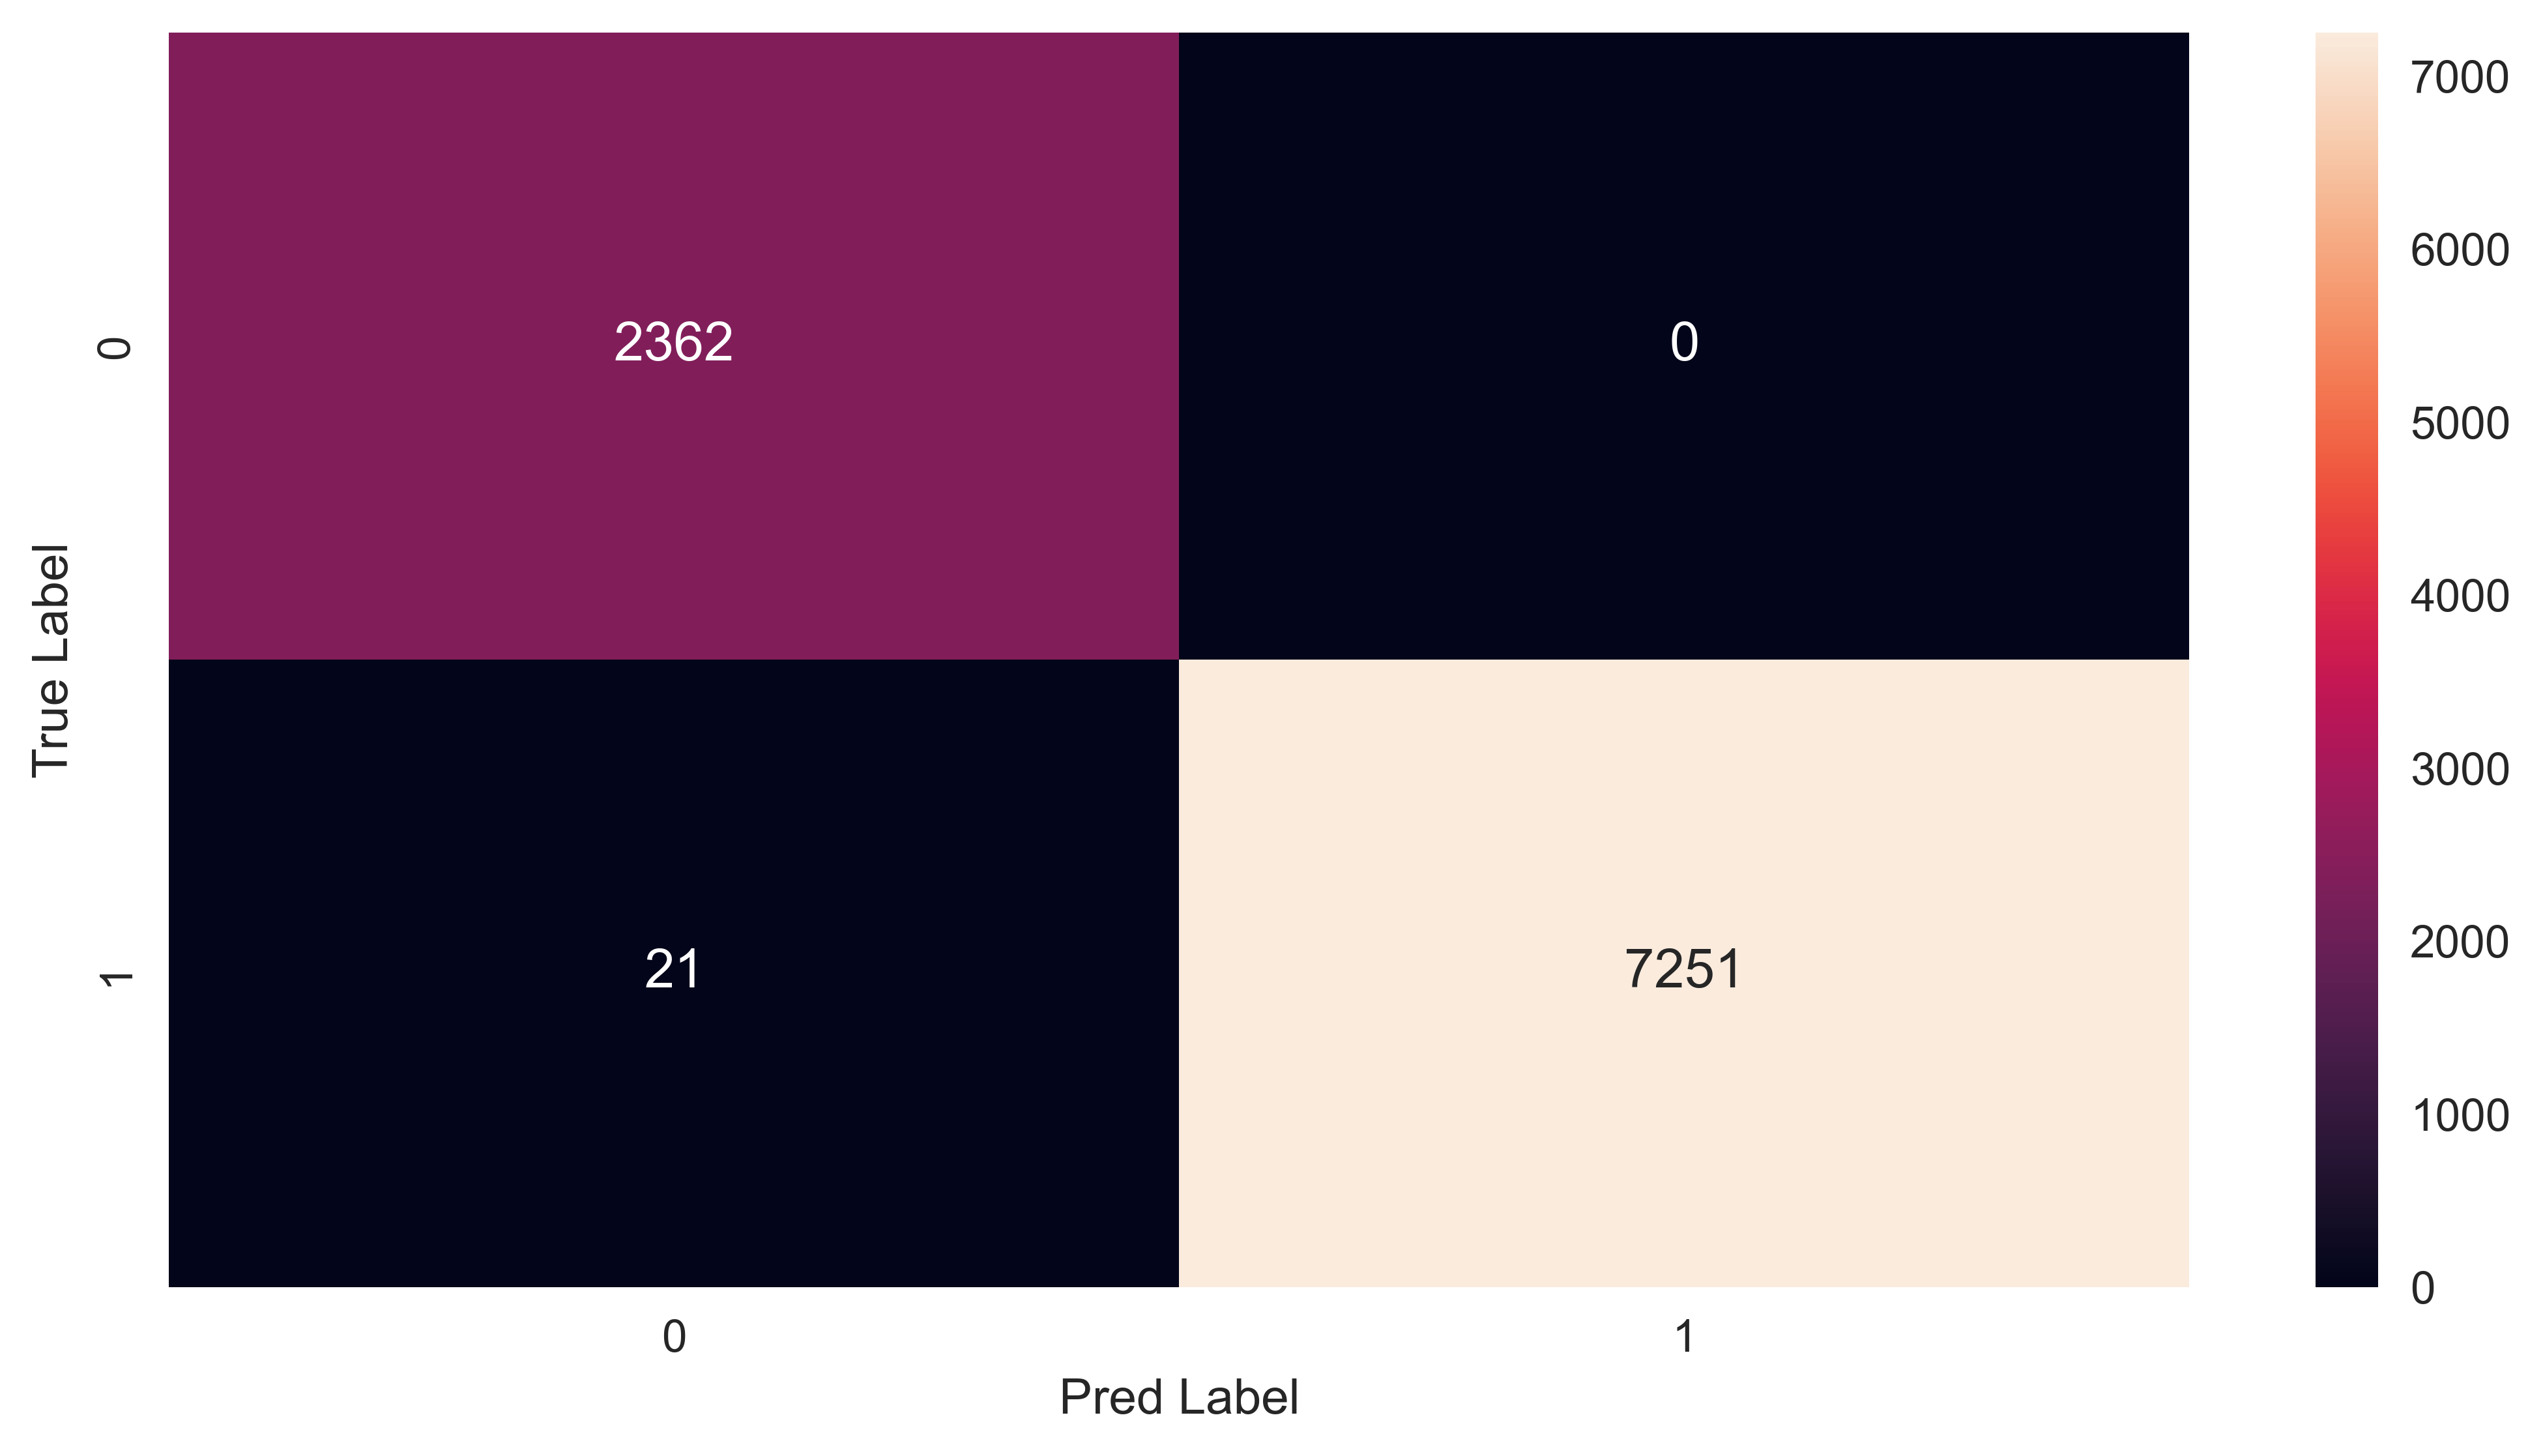

In [100]:
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(confusion_matrix_xgb,annot=True,fmt='.0f')
plt.ylabel('True Label')
plt.xlabel('Pred Label')

<h2 style="color:blue; font-family: Arial;">Conclusion from matrix:</h2>

<h3 style="color:blue; font-family: Arial;">2) number of major incidents correctly predicted as major is 7251</h3>

<h3 style="color:blue; font-family: Arial;">3) number of not major incidents correctly predicted as not major is 2362</h3>

<h3 style="color:blue; font-family: Arial;">4) Number of not major incident incorrectly predicted major is 0</h3>

<h3 style="color:blue; font-family: Arial;">5) Number of  major incident incorrectly predicted not major is 21</h3>

<h2 style="color:black; font-family: Arial;">K-Nearest Neighbors (KNN)</h2>

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
X_test_np = np.array(X_test)

k = 5  
knn= KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test_np)


In [103]:
print(y_test[:25].values)
print(y_pred_knn[:25])

[1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
[1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [104]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

In [105]:
# Calculate accuracy
accuracy_train = knn.score(X_train_np, y_train)
accuracy_test = knn.score(X_test_np, y_test)

print("Training Accuracy for knn:", accuracy_train)
print("Testing Accuracy for knn:", accuracy_test)

Training Accuracy for knn: 0.9954327234981186
Testing Accuracy for knn: 0.9930454639817313


In [106]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)

report_knn = classification_report(y_test, y_pred_knn)

print("Accuracy (knn):", accuracy_knn)
print("Classification Report (knn):\n", report_knn)



Accuracy (knn): 0.9930454639817313
Classification Report (knn):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2362
           1       1.00      0.99      1.00      7272

    accuracy                           0.99      9634
   macro avg       0.99      0.99      0.99      9634
weighted avg       0.99      0.99      0.99      9634



<h3 style="color:blue; font-family: Arial;">Accuracy: 99.3%</h3>
<h2 style="color:blue; font-family: Arial;">Conclusion from classification report:</h2>
<h3 style="color:blue; font-family: Arial;">1) Precision for Minor Incident is 0.97. This means that when the model predicts a minor incident, it is correct 97% of the time.</h3> 
<h3 style="color:blue; font-family: Arial;">2) Precision for Major Incident is 1.00. This means that when the model predicts a major incident, it is correct 100% of the time.</h3> 

Text(0.5, 134.61111111111106, 'Pred Label')

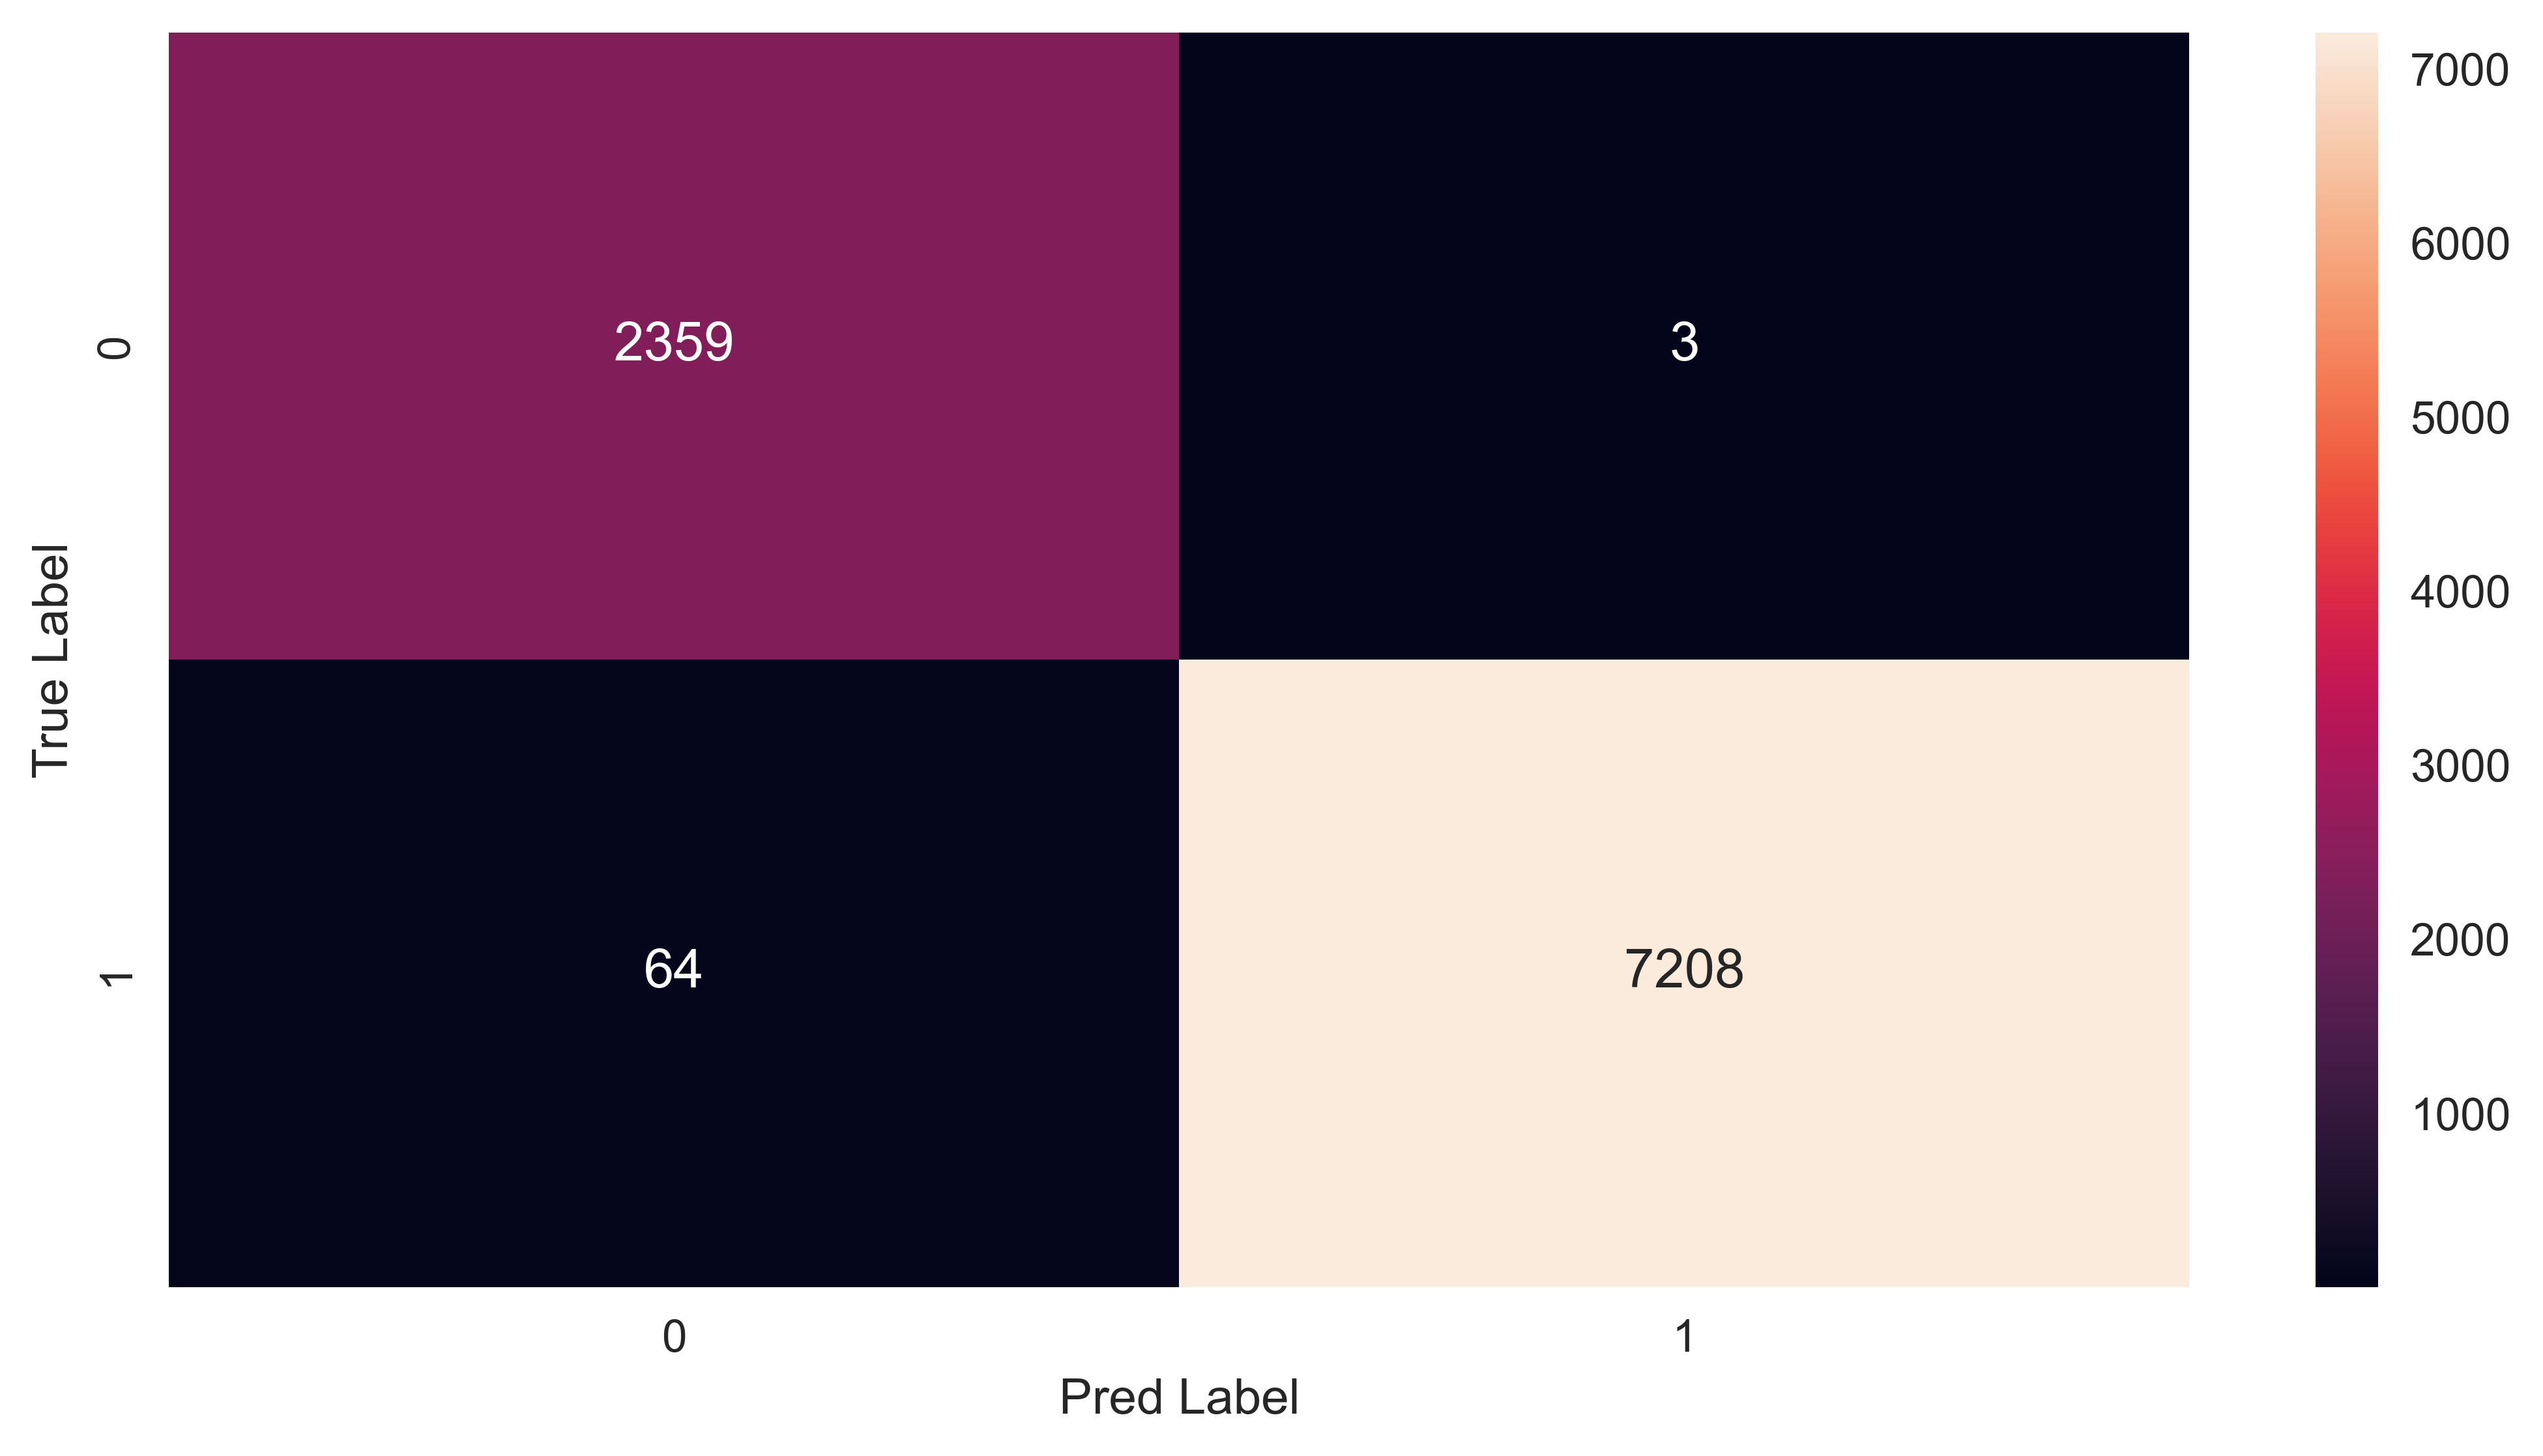

In [107]:
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(confusion_matrix_xgb,annot=True,fmt='.0f')
plt.ylabel('True Label')
plt.xlabel('Pred Label')


<h2 style="color:blue; font-family: Arial;">Conclusion from matrix:</h2>

<h3 style="color:blue; font-family: Arial;">2) number of major incidents correctly predicted as major is 7208</h3>

<h3 style="color:blue; font-family: Arial;">3) number of not major incidents correctly predicted as not major is 2359</h3>

<h3 style="color:blue; font-family: Arial;">4) Number of not major incident incorrectly predicted major is 3</h3>

<h3 style="color:blue; font-family: Arial;">5) Number of  major incident incorrectly predicted not major is 64</h3>

<h2 style="color:black; font-family: Arial;">Comparing scores within models</h2>

In [108]:
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'CatBoost', 'XGBoost', 'KNN'],
    'Accuracy': [99.61, 99.77, 99.78, 99.78, 99.30],
    'precision for minor class': [0.99,0.99,0.99,0.99,0.97],
    'precision for major class': [1.0,1.0,1.0,1.0,1.0]
    }


In [109]:
compare_scores = pd.DataFrame(data)
compare_scores

Model  Accuracy  precision for minor class  \
0  Logistic Regression     99.61                       0.99   
1        Random Forest     99.77                       0.99   
2             CatBoost     99.78                       0.99   
3              XGBoost     99.78                       0.99   
4                  KNN     99.30                       0.97   

   precision for major class  
0                        1.0  
1                        1.0  
2                        1.0  
3                        1.0  
4                        1.0

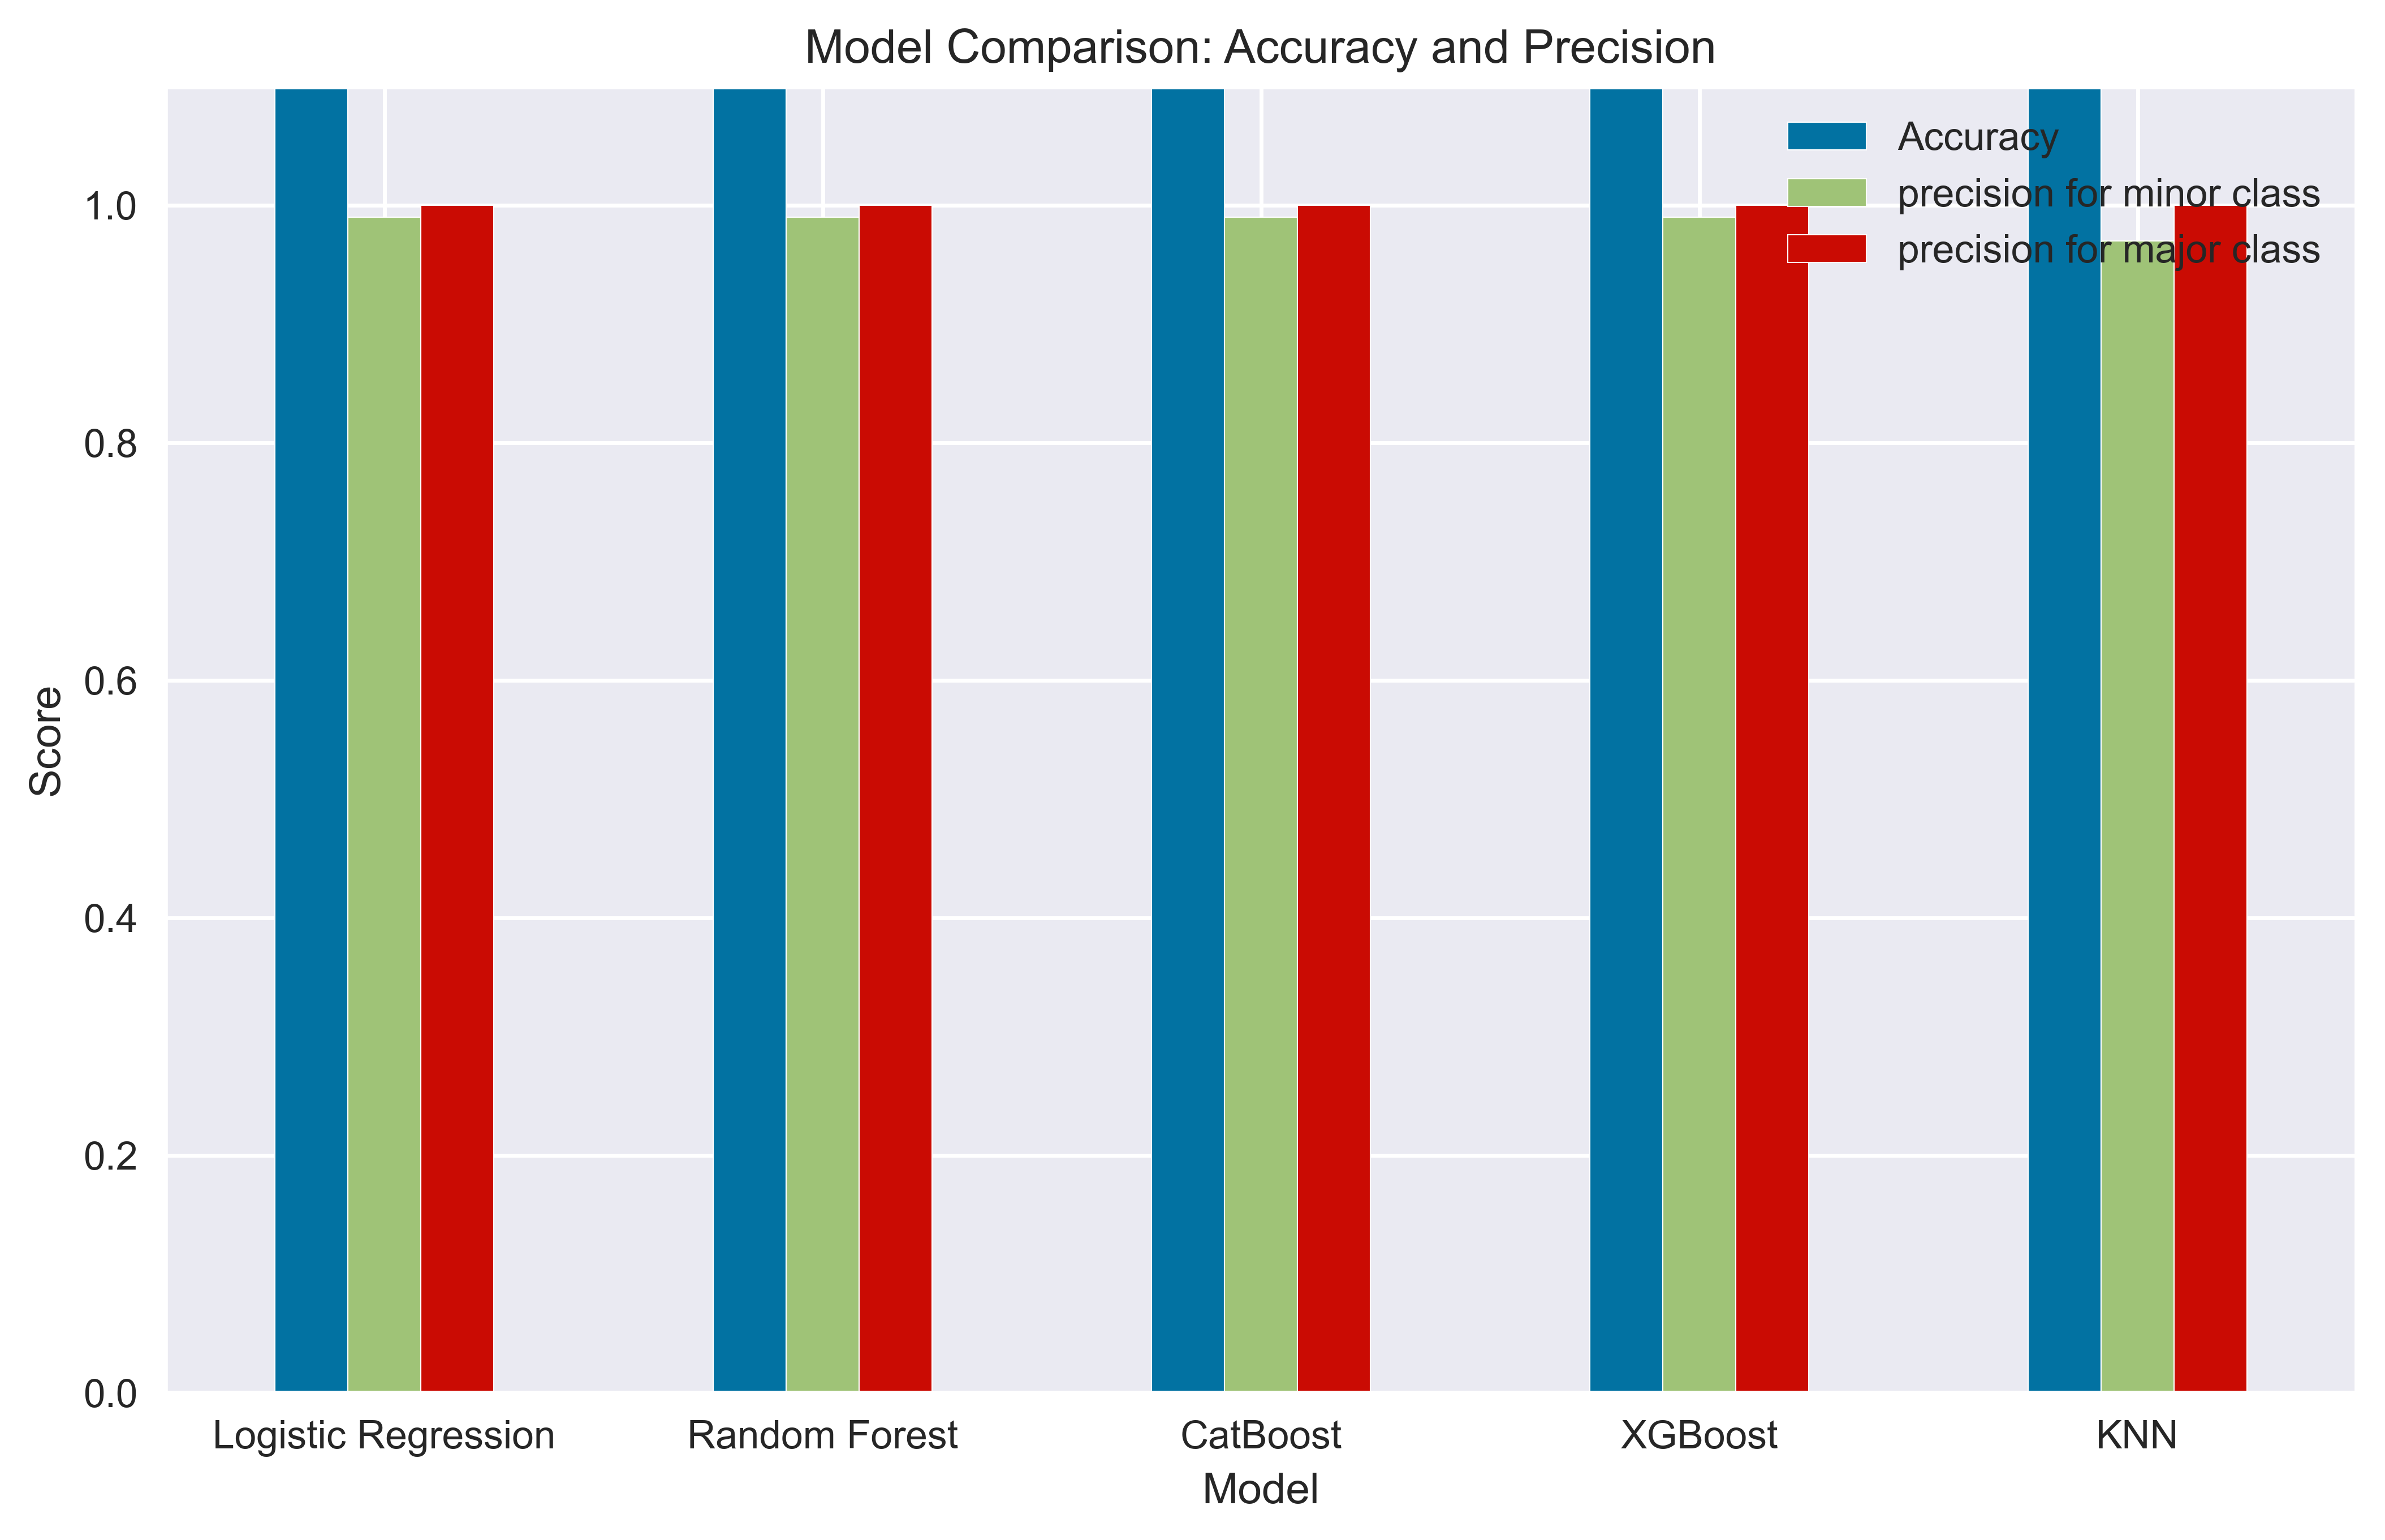

In [110]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
compare_scores.plot(kind='bar', x='Model', y=['Accuracy', 'precision for minor class','precision for major class'], ax=ax, rot=0)
plt.title('Model Comparison: Accuracy and Precision')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.ylim(0, 1.1)


# Show the plot
plt.show()

In [111]:
# Sample input data(9th row)
input_data = (0.0,1.0,7.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make the prediction
prediction = CB.predict(input_data_reshaped)

if prediction[0] == 0:
    print('The attack is predicted to be minor.')
else:
    print('The attack is predicted to be major.')


The attack is predicted to be minor.


In [112]:
y.head(20)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     0
9     0
10    1
12    1
13    1
14    1
15    1
16    0
17    1
18    0
19    1
20    0
Name: Major_Incident, dtype: int64

In [113]:
import pickle

In [117]:
filename = 'trained_model.pkl'
pickle.dump(CB, open(filename, 'wb'))